### TP APRENDIZAJE POR REFUERZO
Alumnos: Emiliano Martino, Juan Pablo Hagata y Lara Rosenberg

El objetivo principal de este trabajo es entrenar a un robot que debe gestionar el riego de un jardín de plantas. A lo largo de varios episodios, el robot aprenderá cómo maximizar la recompensa total al tomar las decisiones correctas para regar o no regar las plantas en un jardín (reducir o no la humedad de las plantas), con el fin de mantenerlas saludables y preservar su energía, utilizando Q learning.

El entorno está basado en un jardín de 5x5 plantas, donde cada planta tiene un nivel de humedad que puede disminuir o aumentar en cada paso, dependiendo de las acciones tomadas por el robot.

Puntualmente, lo que buscamos es que el robot riegue las plantas cuando sea necesario para mantener la humedad por encima de un umbral saludable y que logre moverse de forma eficiente en la cuadrícula para interactuar con las plantas de manera óptima y maximizar la recompensa total.

Restricciones y detalles del entorno:

1. Humedad de las plantas:
La humedad de cada planta se reduce en cada paso (representando que las plantas pierden agua con el tiempo) de forma aleatoria en un porcentaje definido de cuadriculas.
Si la humedad de una planta es demasiado baja (por debajo de un umbral mínimo), el robot recibe un castigo por no haberla regado a tiempo.
Si el robot riega una planta que ya tiene suficiente humedad, recibirá un castigo por gastar agua innecesaria y por ahogarla.

2. Energía limitada:
El robot tiene una cantidad limitada de energía que se consume con cada movimiento y acción de riego. El robot debe gestionar cuidadosamente su energía para no quedarse sin energía antes de completar su tarea.

3. Recompensas y castigos:
- Regar adecuadamente las plantas da una recompensa positiva.
- Regar de más o no regar a tiempo genera castigos.

4. Tarea dinámica:
La humedad de las plantas se inicializa de manera aleatoria al comienzo de cada episodio para simular un entorno dinámico, donde las condiciones cambian en cada episodio. Esto desafía al robot a aprender a adaptarse a diferentes estados iniciales de las plantas y gestionarlas en consecuencia.

5. Acciones disponibles: arriba, abajo, izquierda, derecha, regar

In [1]:
# Importamos las librerias necesarias
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import random
import time
from IPython.display import display, HTML

Primero realizamos un único episodio para evaluar cómo se comporta el robot y que recompensas o penalizaciones recibe paso a paso.

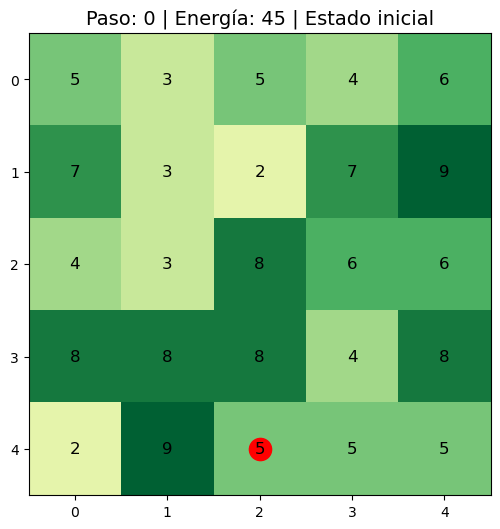


🌱 Comienza el episodio...

Paso 1 | Acción: arriba | Recompensa: -0.5 | Acumulado: -0.5


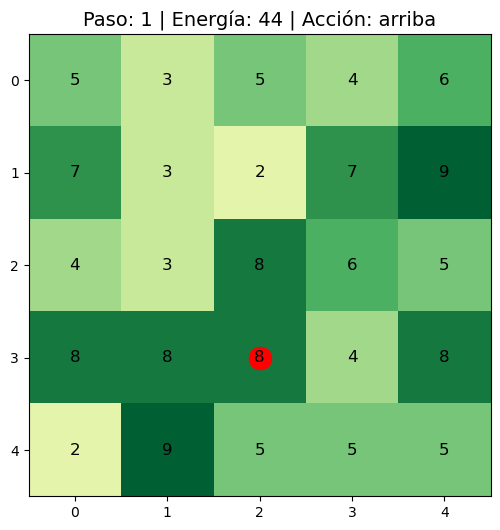

Paso 2 | Acción: arriba | Recompensa: -0.5 | Acumulado: -1.0


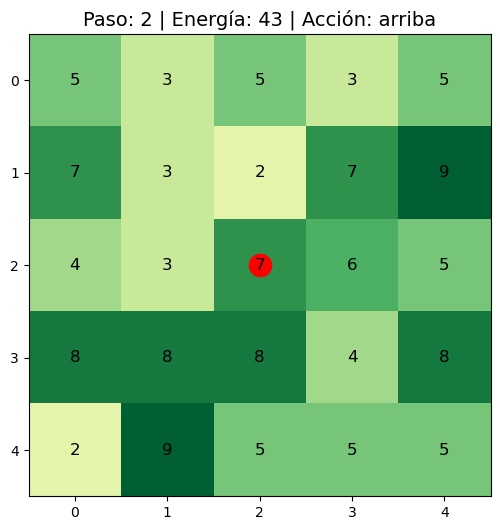

Paso 3 | Acción: arriba | Recompensa: -0.5 | Acumulado: -1.5


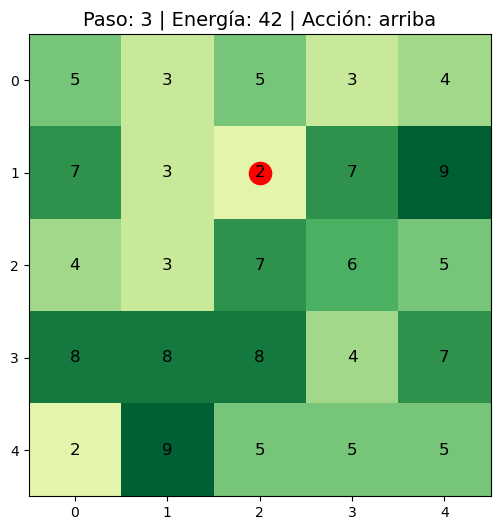

Paso 4 | Acción: arriba | Recompensa: -10.0 | Acumulado: -11.5


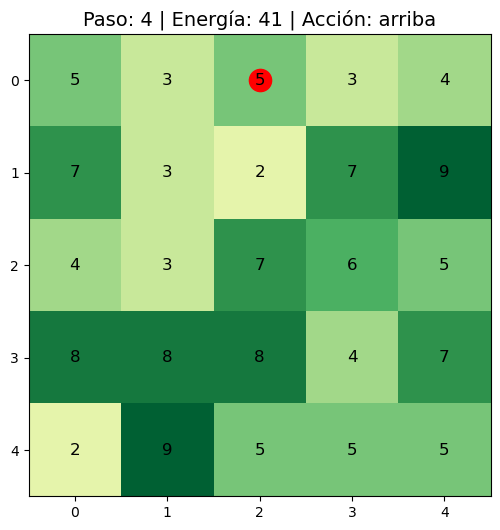

Paso 5 | Acción: arriba | Recompensa: -0.5 | Acumulado: -12.0


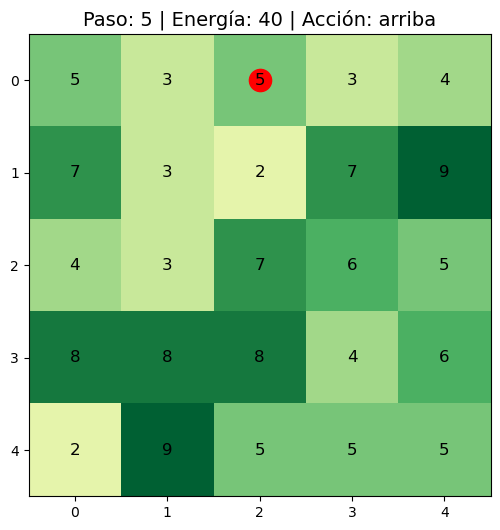

Paso 6 | Acción: abajo | Recompensa: -0.5 | Acumulado: -12.5


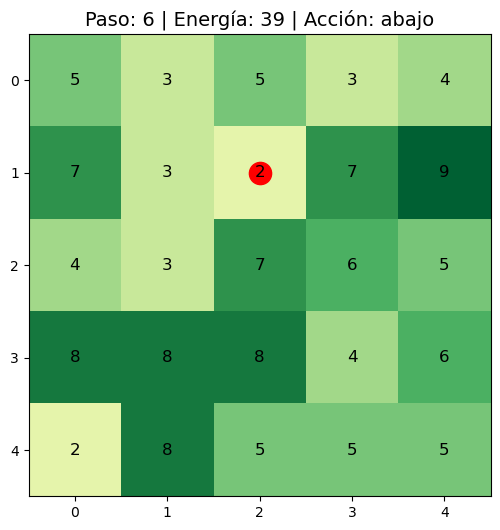

Paso 7 | Acción: abajo | Recompensa: -10.0 | Acumulado: -22.5


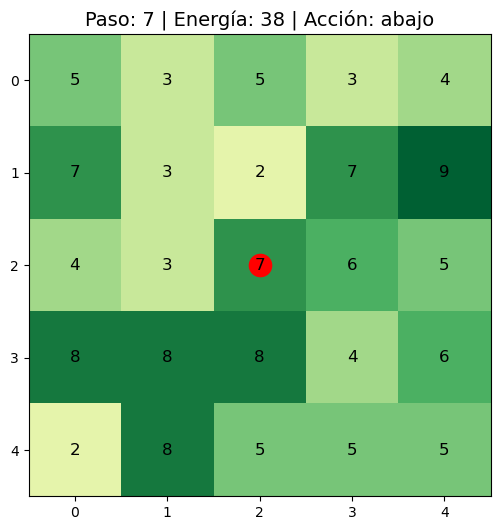

Paso 8 | Acción: abajo | Recompensa: -0.5 | Acumulado: -23.0


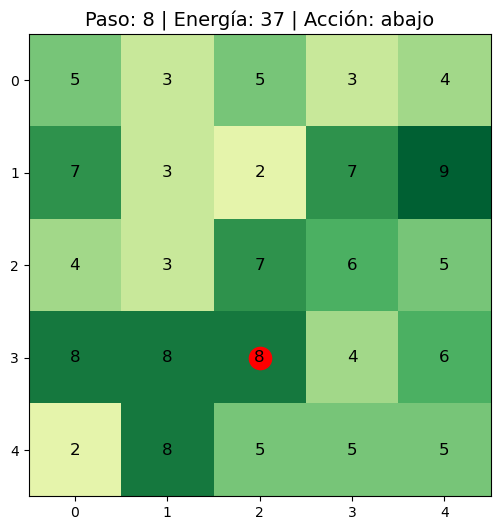

Paso 9 | Acción: abajo | Recompensa: -0.5 | Acumulado: -23.5


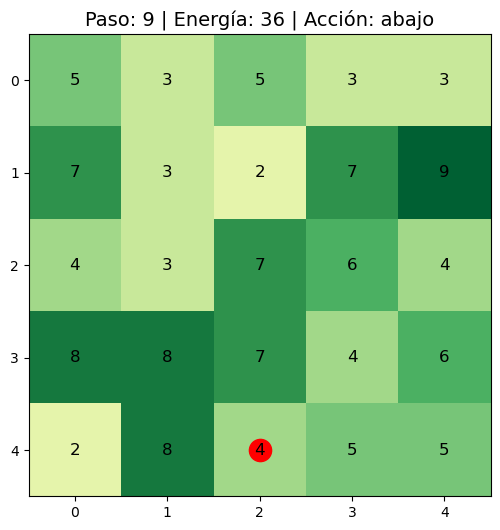

Paso 10 | Acción: abajo | Recompensa: -0.5 | Acumulado: -24.0


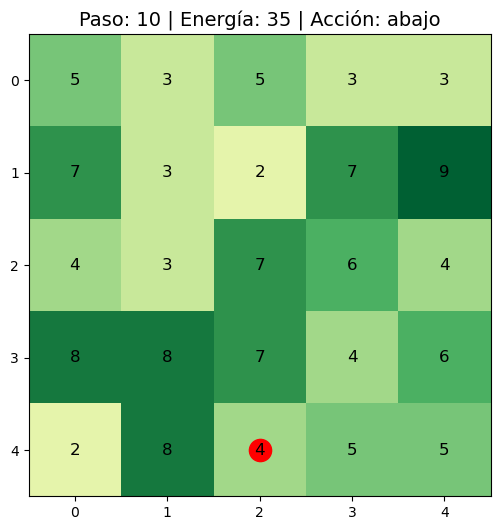

Paso 11 | Acción: izquierda | Recompensa: -0.5 | Acumulado: -24.5


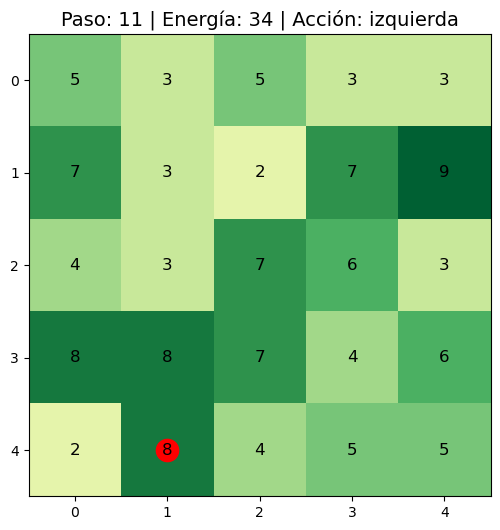

Paso 12 | Acción: arriba | Recompensa: -0.5 | Acumulado: -25.0


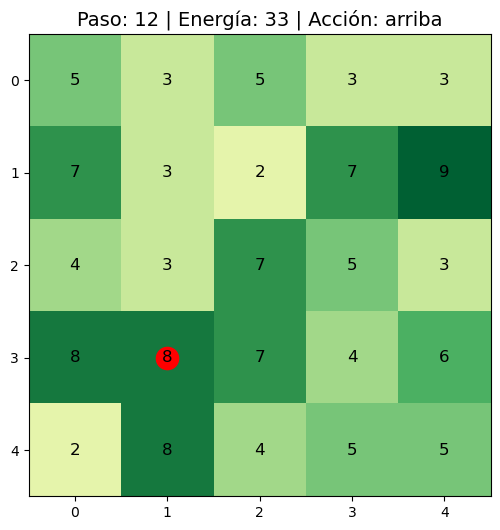

Paso 13 | Acción: arriba | Recompensa: -0.5 | Acumulado: -25.5


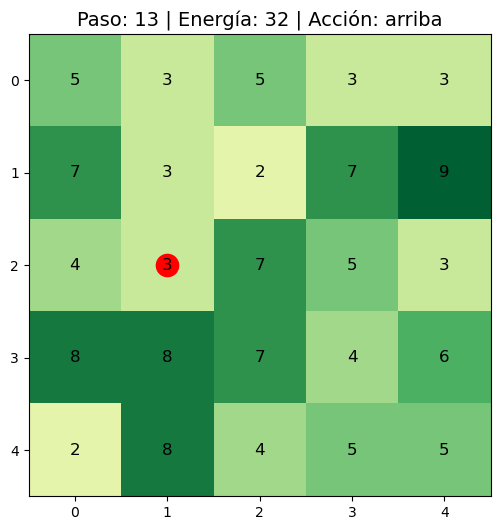

Paso 14 | Acción: arriba | Recompensa: -10.0 | Acumulado: -35.5


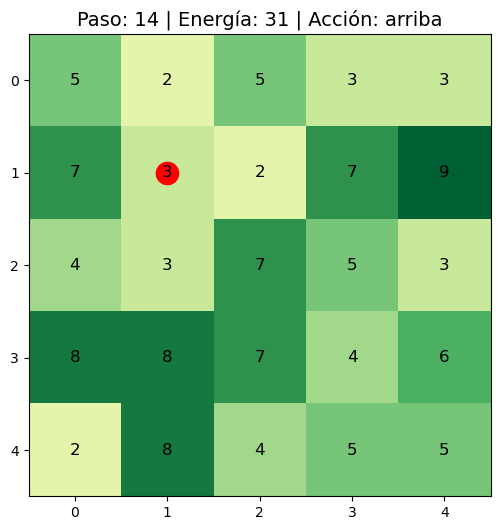

Paso 15 | Acción: arriba | Recompensa: -10.0 | Acumulado: -45.5


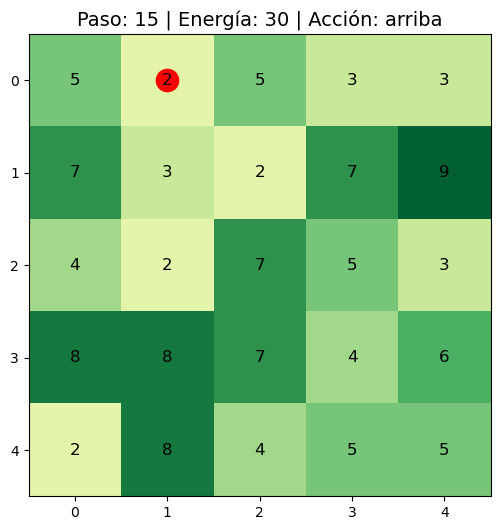

Paso 16 | Acción: arriba | Recompensa: -10.0 | Acumulado: -55.5


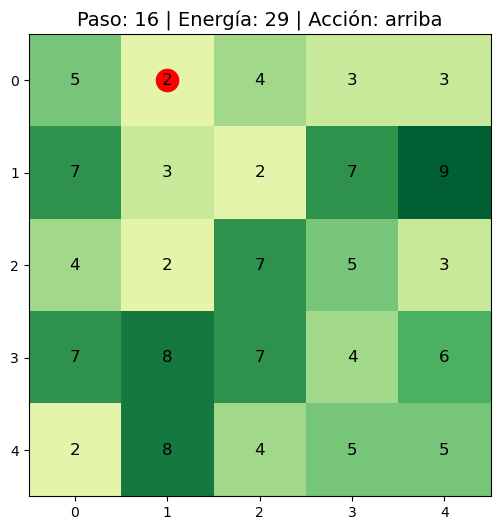

Paso 17 | Acción: abajo | Recompensa: -10.0 | Acumulado: -65.5


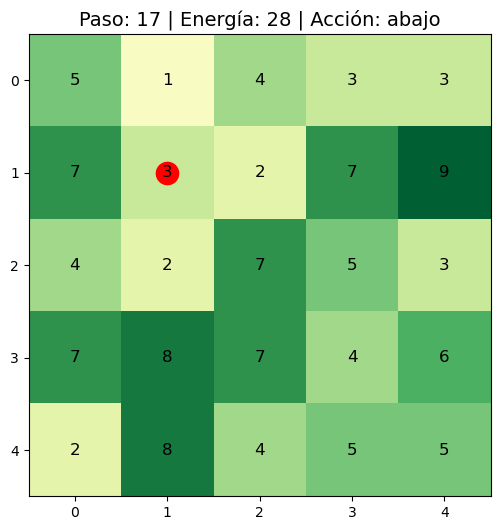

Paso 18 | Acción: abajo | Recompensa: -10.0 | Acumulado: -75.5


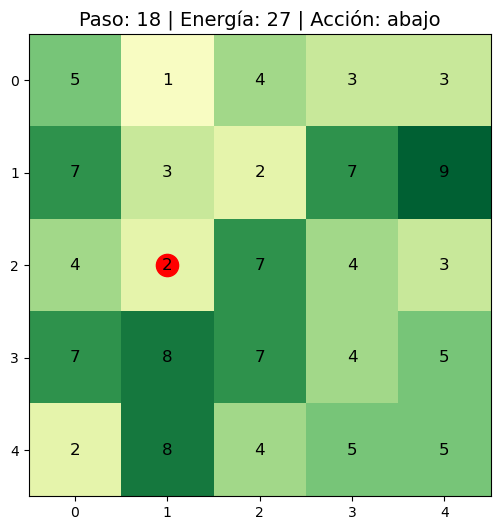

Paso 19 | Acción: abajo | Recompensa: -10.0 | Acumulado: -85.5


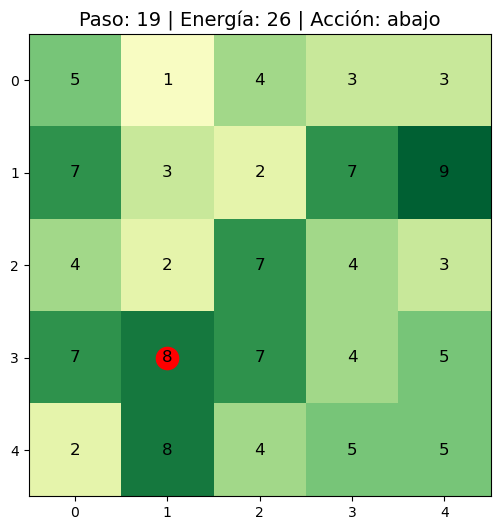

Paso 20 | Acción: abajo | Recompensa: -0.5 | Acumulado: -86.0


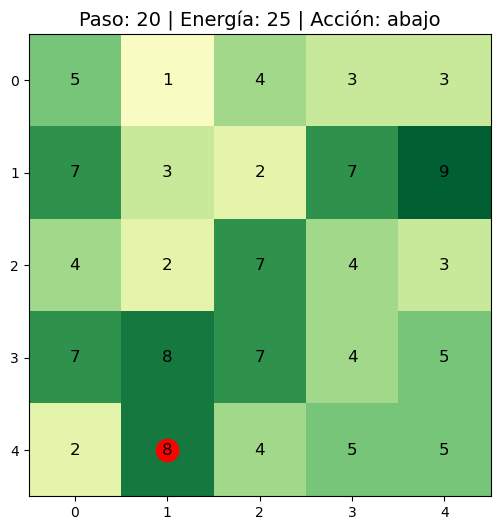

Paso 21 | Acción: abajo | Recompensa: -0.5 | Acumulado: -86.5


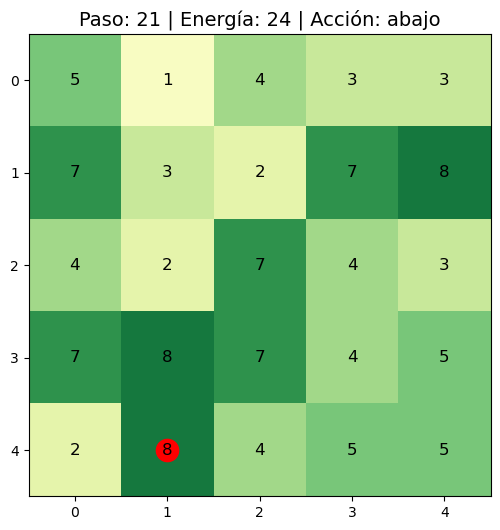

Paso 22 | Acción: izquierda | Recompensa: -0.5 | Acumulado: -87.0


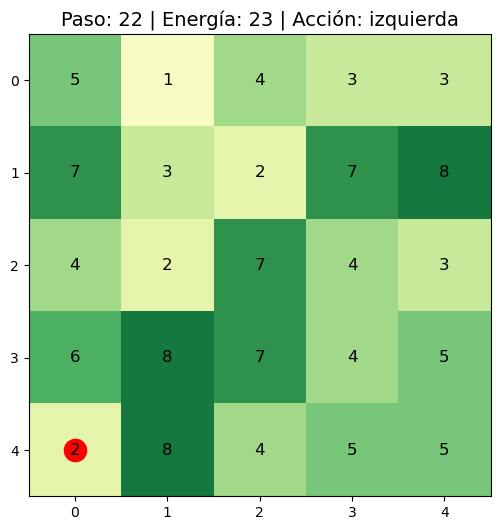

Paso 23 | Acción: arriba | Recompensa: -10.0 | Acumulado: -97.0


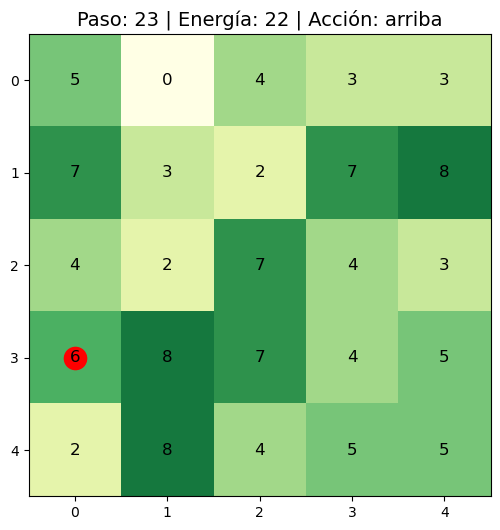

Paso 24 | Acción: arriba | Recompensa: -0.5 | Acumulado: -97.5


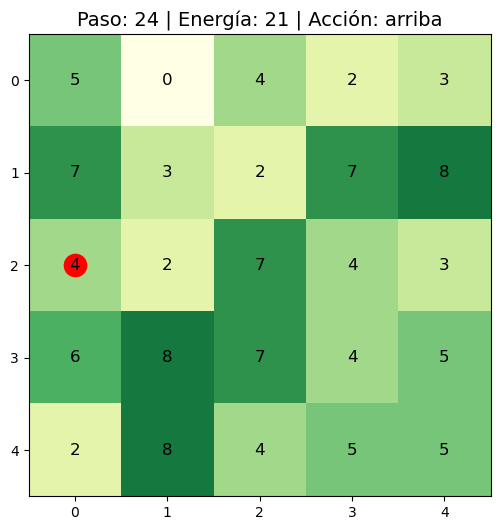

Paso 25 | Acción: arriba | Recompensa: -0.5 | Acumulado: -98.0


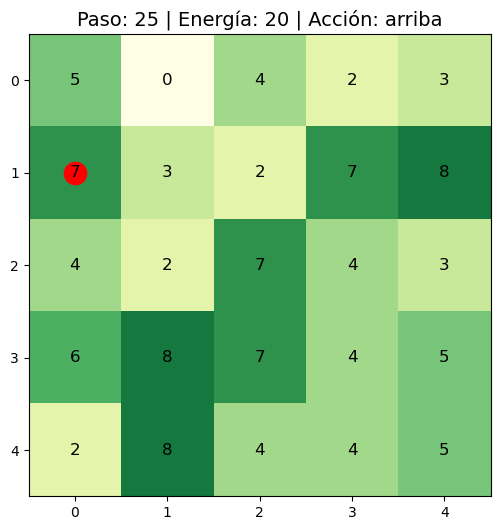

Paso 26 | Acción: arriba | Recompensa: -0.5 | Acumulado: -98.5


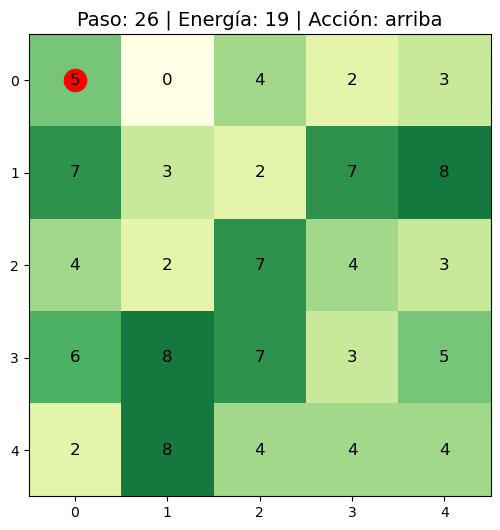

Paso 27 | Acción: arriba | Recompensa: -0.5 | Acumulado: -99.0


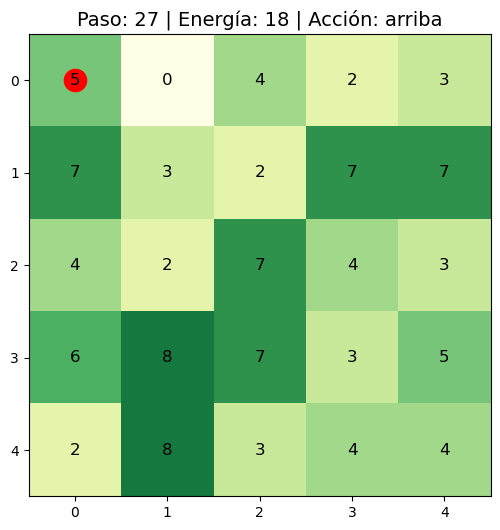

Paso 28 | Acción: abajo | Recompensa: -0.5 | Acumulado: -99.5


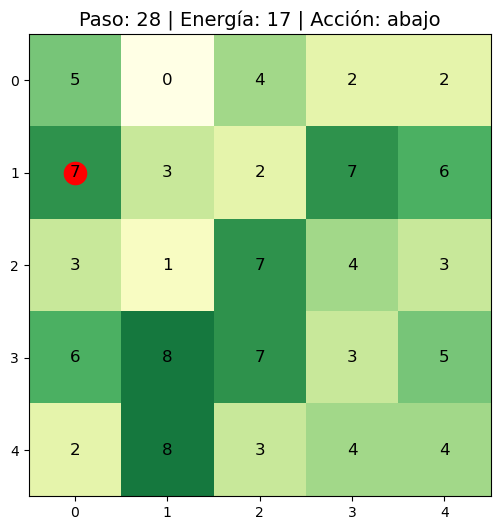

Paso 29 | Acción: abajo | Recompensa: -0.5 | Acumulado: -100.0


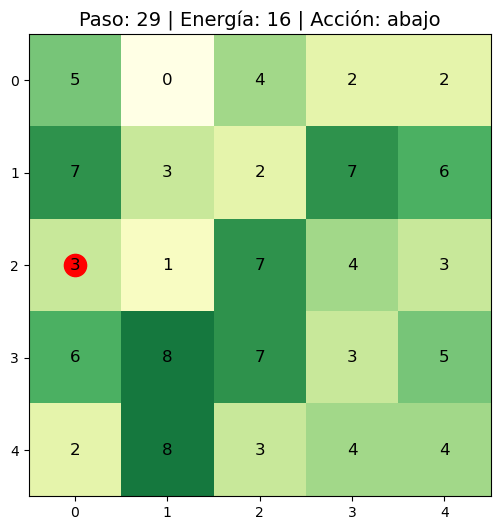

Paso 30 | Acción: arriba | Recompensa: -10.0 | Acumulado: -110.0


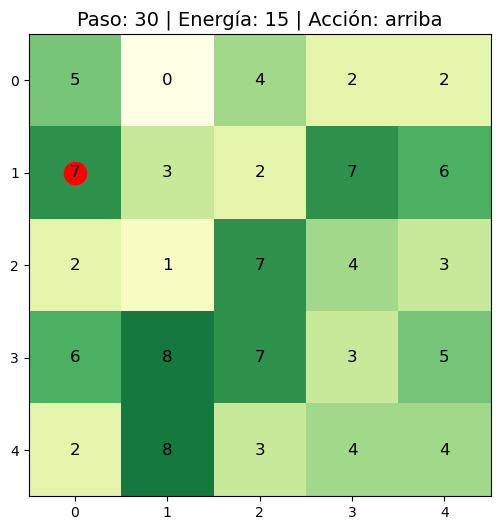

Paso 31 | Acción: izquierda | Recompensa: -0.5 | Acumulado: -110.5


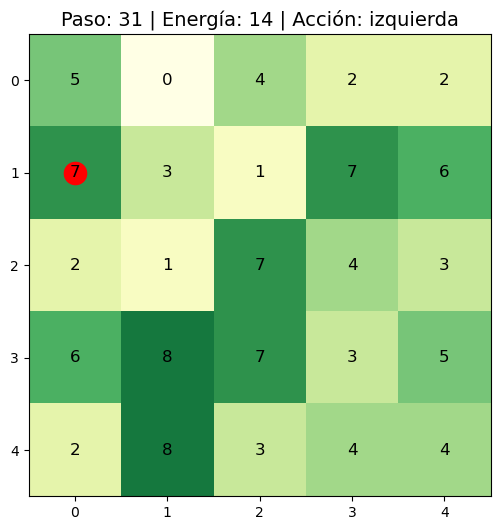

Paso 32 | Acción: derecha | Recompensa: -0.5 | Acumulado: -111.0


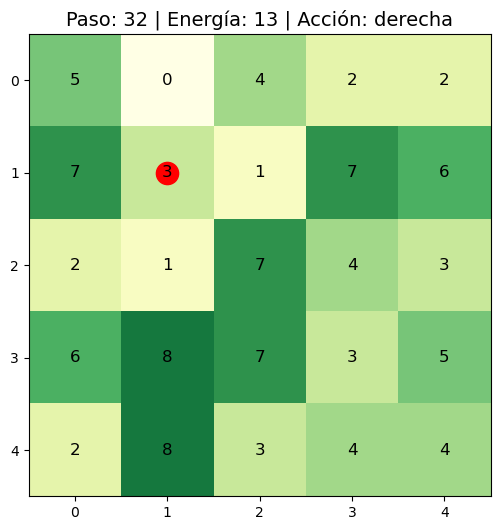

Paso 33 | Acción: izquierda | Recompensa: -10.0 | Acumulado: -121.0


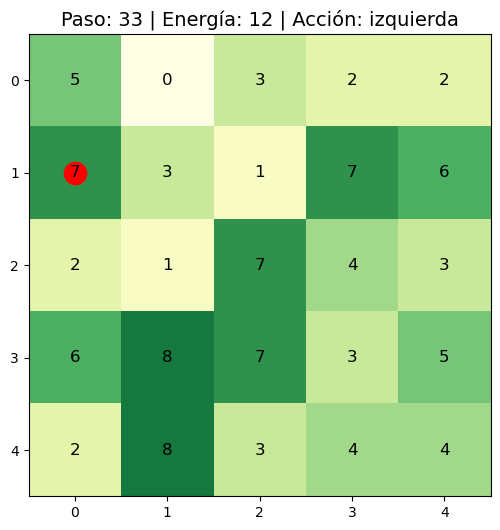

Paso 34 | Acción: regar | Recompensa: -1.0 | Acumulado: -122.0


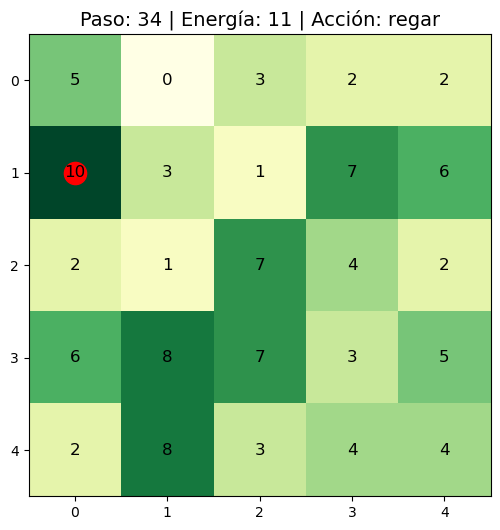

Paso 35 | Acción: arriba | Recompensa: -0.5 | Acumulado: -122.5


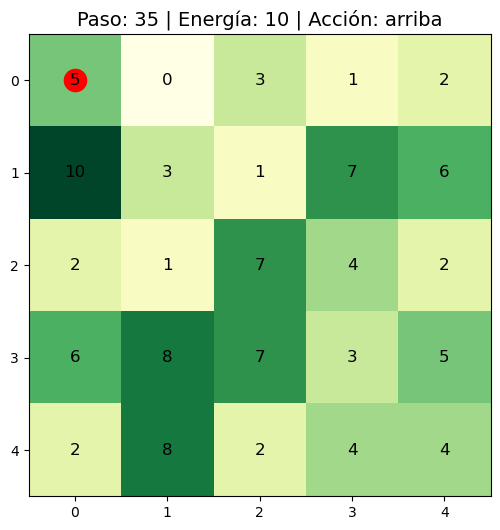

Paso 36 | Acción: izquierda | Recompensa: -0.5 | Acumulado: -123.0


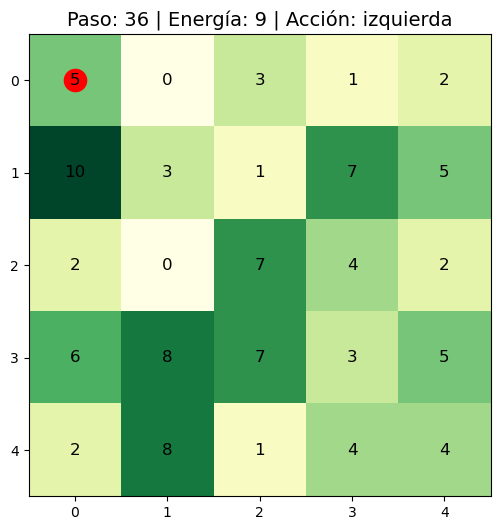

Paso 37 | Acción: derecha | Recompensa: -0.5 | Acumulado: -123.5


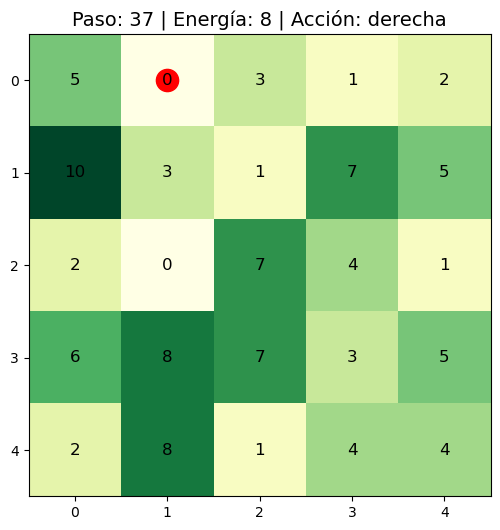

Paso 38 | Acción: izquierda | Recompensa: -10.0 | Acumulado: -133.5


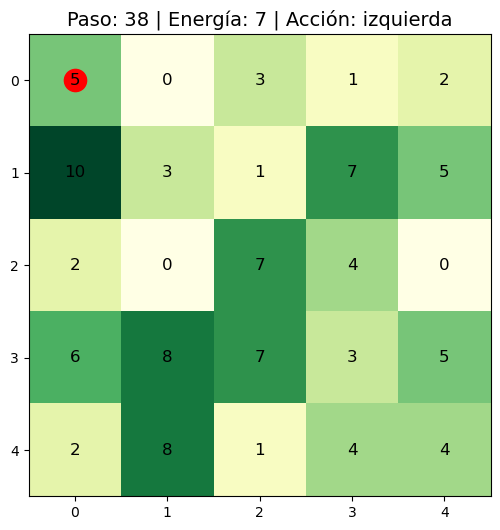

Paso 39 | Acción: regar | Recompensa: 10.0 | Acumulado: -123.5


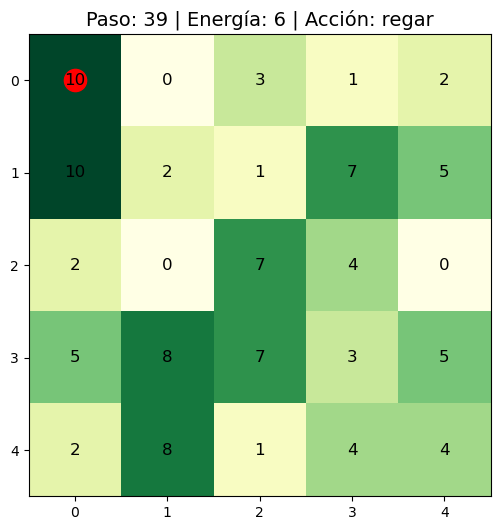

Paso 40 | Acción: arriba | Recompensa: -0.5 | Acumulado: -124.0


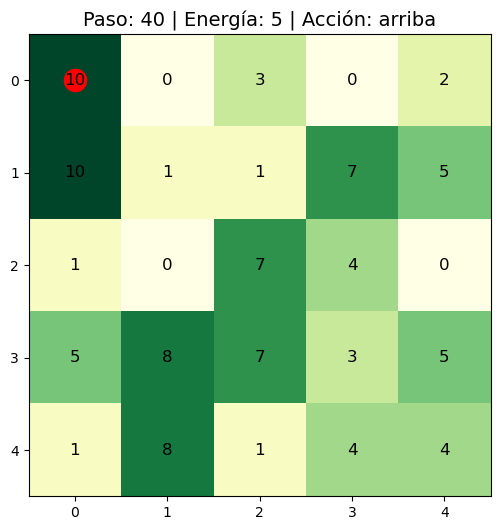

Paso 41 | Acción: abajo | Recompensa: -0.5 | Acumulado: -124.5


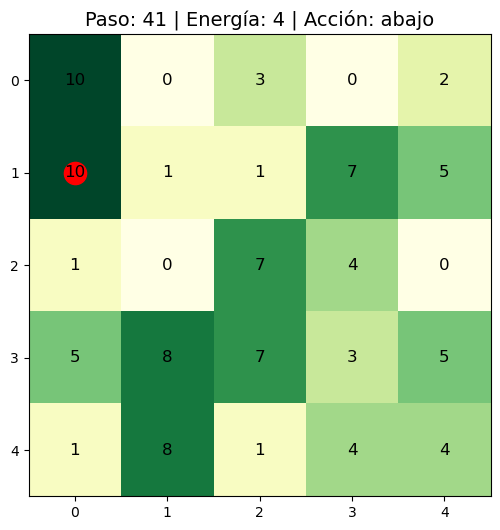

Paso 42 | Acción: abajo | Recompensa: -0.5 | Acumulado: -125.0


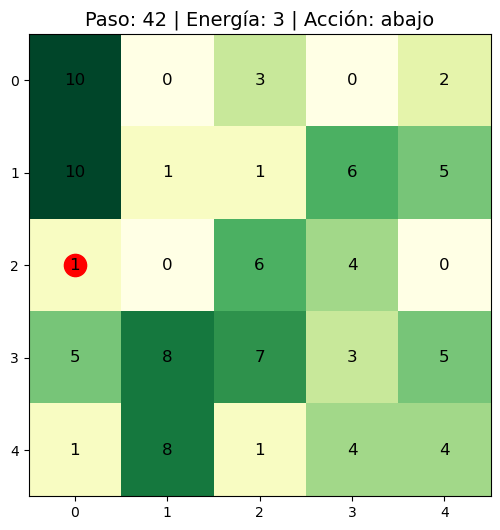

Paso 43 | Acción: abajo | Recompensa: -10.0 | Acumulado: -135.0


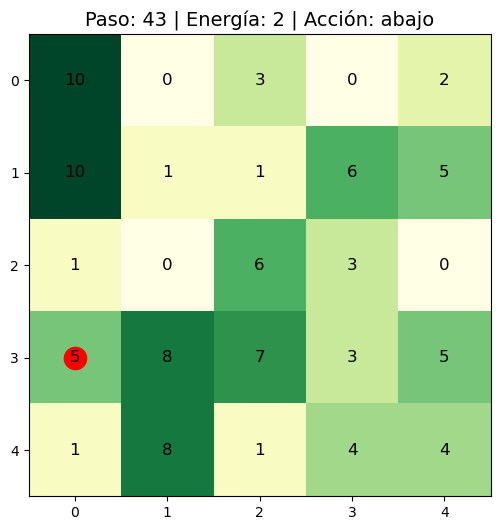

Paso 44 | Acción: abajo | Recompensa: -0.5 | Acumulado: -135.5


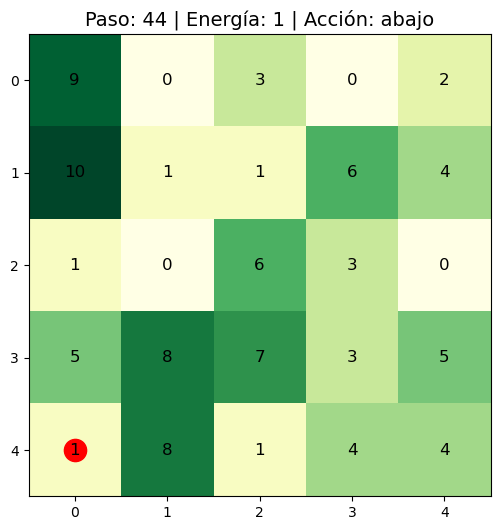

Paso 45 | Acción: abajo | Recompensa: -10.0 | Acumulado: -145.5


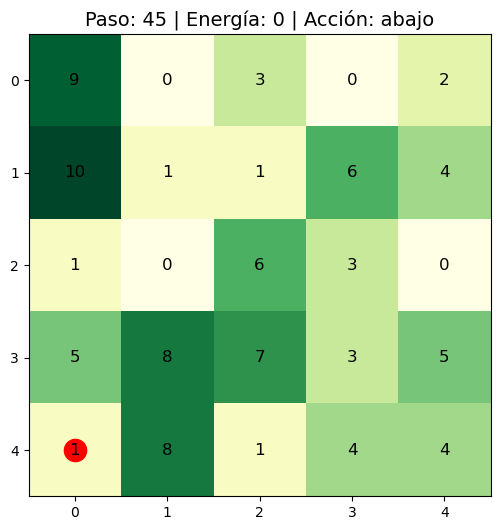


🏁 Fin del episodio 1 | Recompensa total: -145.5 | Energía: 0



In [2]:
# Parámetros del entorno
tamaño_grilla = 5 #tamaño de la grilla de plantas
max_humedad = 10 #humedad maxima de la planta
min_humedad = 0 #humedad minima de la planta
acciones = ["arriba", "abajo", "izquierda", "derecha", "regar"] #acciones disponibles
prob_secado_plantas = 0.05 #porcentaje de las plantas que pierden humedad en cada paso
energia_robot=45 #energia del robot
Q = {}  # Tabla Q
aumento_por_regar=5 #aumento en la humedad de la planta por ser regada

# Parámetros de Q-learning
alpha = 0.01
gamma = 0.7
epsilon = 0.01
episodios = 1

# Establecemos las recompensas
RECOMPENSA_POR_REGAR_A_TIEMPO = 10
CASTIGO_POR_REGAR_DE_MAS = -1
CASTIGO_POR_PLANTA_SECA = -10
CASTIGO_POR_MOVERSE = -0.5

# Función de visualización
def visualizar_grilla(humedad, robot_pos, energia, paso, ultima_accion=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    cmap = plt.cm.YlGn
    norm = mcolors.Normalize(vmin=0, vmax=10)
    ax.imshow(humedad, cmap=cmap, norm=norm)

    for i in range(tamaño_grilla):
        for j in range(tamaño_grilla):
            ax.text(j, i, f"{humedad[i, j]:.0f}", va='center', ha='center', color='black', fontsize=12)

    rx, ry = robot_pos
    ax.plot(ry, rx, 'ro', markersize=16)

    accion_str = f" | Acción: {acciones[ultima_accion]}" if ultima_accion is not None else " | Estado inicial"
    ax.set_title(f"Paso: {paso} | Energía: {energia}{accion_str}", fontsize=14)

    ax.set_xticks(np.arange(tamaño_grilla))
    ax.set_yticks(np.arange(tamaño_grilla))
    ax.grid(False)
    plt.show()
    time.sleep(0.5)

# Función para disminuir la humedad de las plantas de forma aleatoria en el tiempo con una probabilidad definida
def secar_plantas(humedad_grid, probabilidad=0.10):
    for i in range(tamaño_grilla):
        for j in range(tamaño_grilla):
            if np.random.rand() < probabilidad:
                humedad_grid[i][j] = max(humedad_grid[i][j] - 1, min_humedad)
    return humedad_grid

# Funciones del entorno
def obtener_estado(robot_pos, humedad_grid):
    h = humedad_grid[robot_pos[0]][robot_pos[1]]
    if h >= 7:
        h_level = "alta"
    elif h >= 4:
        h_level = "media"
    else:
        h_level = "baja"
    return (robot_pos[0], robot_pos[1], h_level)


def elegir_accion(estado):
    if estado not in Q:
        Q[estado] = np.zeros(len(acciones))
    if random.random() < epsilon: #El robot explora
        return random.randint(0, len(acciones) - 1)
    return np.argmax(Q[estado]) #El robot explota


def actualizar_q(estado, accion, recompensa, sig_estado):
    if estado not in Q:
        Q[estado] = np.zeros(len(acciones))
    if sig_estado not in Q:
        Q[sig_estado] = np.zeros(len(acciones))
    Q[estado][accion] += alpha * (recompensa + gamma * np.max(Q[sig_estado]) - Q[estado][accion])

def step(robot_pos, humedad_grid, accion_idx):
    accion = acciones[accion_idx]
    nueva_pos = list(robot_pos)
    recompensa = 0

    h_actual = humedad_grid[robot_pos[0]][robot_pos[1]]  # Humedad de la planta actual

    if accion == "arriba":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[0] = max(0, robot_pos[0] - 1)


    elif accion == "abajo":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[0] = min(tamaño_grilla - 1, robot_pos[0] + 1)

    elif accion == "izquierda":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[1] = max(0, robot_pos[1] - 1)

    elif accion == "derecha":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[1] = min(tamaño_grilla - 1, robot_pos[1] + 1)

    elif accion == "regar":
        if h_actual + aumento_por_regar <= max_humedad:
            humedad_grid[robot_pos[0]][robot_pos[1]] += aumento_por_regar
            recompensa += RECOMPENSA_POR_REGAR_A_TIEMPO
        else:
            humedad_grid[robot_pos[0]][robot_pos[1]] = max_humedad
            recompensa += CASTIGO_POR_REGAR_DE_MAS


    return tuple(nueva_pos), humedad_grid, recompensa

# Entrenamiento visual
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla)) # Inicializamos de forma aleatoria la humedad de la grilla
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1)) #Ubicamos al robot en una posicion inicial aleatoria para empezar
    recompensa_total = 0
    paso = 0
    energia = energia_robot #Energia con la que arranca el robot

    # Mostrar el estado inicial (sin recompensas, sin acción)
    visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=None)
    print("\n🌱 Comienza el episodio...\n")

# --- Acá empieza el bucle de aprendizaje
    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        print(f"Paso {paso} | Acción: {acciones[accion_idx]} | Recompensa: {recompensa:.1f} | Acumulado: {recompensa_total:.1f}")
        visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=accion_idx)

        if energia <= 0 or np.all(humedad_grid <= 1):
          print(f"\n🏁 Fin del episodio {ep+1} | Recompensa total: {recompensa_total:.1f} | Energía: {energia}\n")
          break

Ahora realizamos un entrenamiento con estos mismos parametros y evaluamos la tabla Q obtenida y el gráfico de convergencia

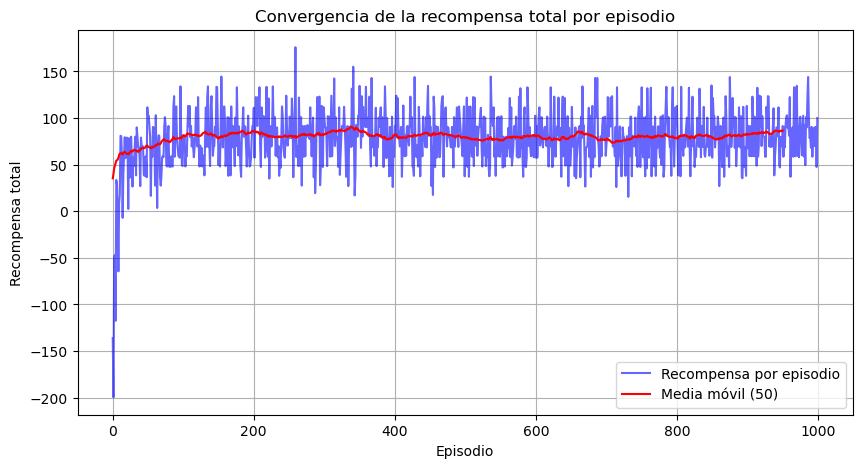

In [3]:
# Parámetros del entorno
tamaño_grilla = 5 #tamaño de la grilla de plantas
max_humedad = 10 #humedad maxima de la planta
min_humedad = 0 #humedad minima de la planta
acciones = ["arriba", "abajo", "izquierda", "derecha", "regar"] #acciones disponibles
prob_secado_plantas = 0.05 #porcentaje de las plantas que pierden humedad en cada paso
energia_robot=45 #energia del robot
Q = {}  # Tabla Q
aumento_por_regar=5 #aumento en la humedad de la planta por ser regada

# Parámetros de Q-learning
alpha = 0.01
gamma = 0.7
epsilon = 0.01
episodios = 1000

# Establecemos las recompensas
RECOMPENSA_POR_REGAR_A_TIEMPO = 10
CASTIGO_POR_REGAR_DE_MAS = -1
CASTIGO_POR_PLANTA_SECA = -10
CASTIGO_POR_MOVERSE = -0.5

# Función para secar plantas parcialmente
def secar_plantas(humedad_grid, probabilidad=0.10):
    for i in range(tamaño_grilla):
        for j in range(tamaño_grilla):
            if np.random.rand() < probabilidad:
                humedad_grid[i][j] = max(humedad_grid[i][j] - 1, min_humedad)
    return humedad_grid

# Obtener el estado actual
def obtener_estado(robot_pos, humedad_grid):
    h = humedad_grid[robot_pos[0]][robot_pos[1]]
    if h >= 7:
        h_level = "alta"
    elif h >= 4:
        h_level = "media"
    else:
        h_level = "baja"
    return (robot_pos[0], robot_pos[1], h_level)

# Elegir acción
def elegir_accion(estado):
    if estado not in Q:
        Q[estado] = np.zeros(len(acciones))
    if random.random() < epsilon:
        return random.randint(0, len(acciones) - 1)
    return np.argmax(Q[estado])

# Actualizar Q
def actualizar_q(estado, accion, recompensa, sig_estado):
    if estado not in Q:
        Q[estado] = np.zeros(len(acciones))
    if sig_estado not in Q:
        Q[sig_estado] = np.zeros(len(acciones))
    Q[estado][accion] += alpha * (recompensa + gamma * np.max(Q[sig_estado]) - Q[estado][accion])

# Paso del entorno
def step(robot_pos, humedad_grid, accion_idx):
    accion = acciones[accion_idx]
    nueva_pos = list(robot_pos)
    recompensa = 0

    h_actual = humedad_grid[robot_pos[0]][robot_pos[1]]  # Humedad de la planta actual

    if accion == "arriba":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[0] = max(0, robot_pos[0] - 1)


    elif accion == "abajo":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[0] = min(tamaño_grilla - 1, robot_pos[0] + 1)

    elif accion == "izquierda":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[1] = max(0, robot_pos[1] - 1)

    elif accion == "derecha":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[1] = min(tamaño_grilla - 1, robot_pos[1] + 1)

    elif accion == "regar":
        if h_actual + aumento_por_regar <= max_humedad:
            humedad_grid[robot_pos[0]][robot_pos[1]] += aumento_por_regar
            recompensa += RECOMPENSA_POR_REGAR_A_TIEMPO
        else:
            humedad_grid[robot_pos[0]][robot_pos[1]] = max_humedad
            recompensa += CASTIGO_POR_REGAR_DE_MAS


    return tuple(nueva_pos), humedad_grid, recompensa


# Lista para almacenar recompensas de cada episodio
recompensas_por_episodio = []

# Entrenamiento
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla))
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1))
    recompensa_total = 0
    paso = 0
    energia = energia_robot

    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        if energia <= 0 or np.all(humedad_grid <= 1):
            break

    recompensas_por_episodio.append(recompensa_total)

# Gráfico de convergencia
plt.figure(figsize=(10, 5))
plt.plot(recompensas_por_episodio, color='blue', alpha=0.6, label='Recompensa por episodio')
plt.plot(np.convolve(recompensas_por_episodio, np.ones(50)/50, mode='valid'), color='red', label='Media móvil (50)')
plt.title('Convergencia de la recompensa total por episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
def mostrar_tabla_q_resumida():
    filas = []

    for estado, valores_q in Q.items():
        fila, columna, humedad = estado  # Extraemos la fila, columna y humedad
        q_max = np.max(valores_q)  # Encontramos el valor máximo de Q
        acciones_estado = []

        for i, valor in enumerate(valores_q):
            accion = acciones[i]
            if valor == q_max:
                # Acción óptima: la ponemos en negrita con HTML
                accion_str = f"<b>{accion} ({valor:.2f})</b>"
            else:
                accion_str = f"{accion} ({valor:.2f})"
            acciones_estado.append(accion_str)

        # Agregamos los datos a la lista de filas
        filas.append({
            "Fila": fila,
            "Columna": columna,
            "Humedad": humedad,
            "Acciones (Q-values)": "<br>".join(acciones_estado)
        })

    # Creamos el DataFrame
    df = pd.DataFrame(filas)

    # Ordenamos el DataFrame por fila, columna y humedad
    df.sort_values(by=["Fila", "Columna", "Humedad"], inplace=True)

    display(HTML("<h3> Tabla Q - Resumen por estado </h3>"))
    display(HTML(df.to_html(escape=False, index=False)))

mostrar_tabla_q_resumida()

Analizando la tabla Q, podemos notar que el robot cuando observa que la humedad de la planta es alta, su mejor estrategia es moverse hacia algún lado y cuando la planta tiene una humedad baja, su mejor accion es regar.

Teniendo la tabla Q, vamos a volver a realizar una visualizacion de un episodio, con el fin de ver la diferencia entre la primera que hicimos con una tabla Q vacía y esta que se obtuvo luego de 1000 episodios.

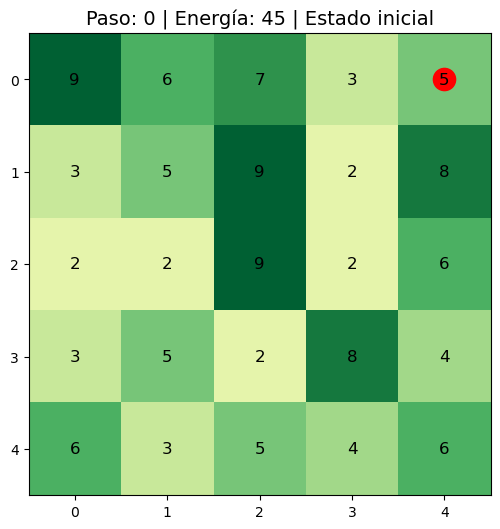


🌱 Comienza el episodio...

Paso 1 | Acción: regar | Recompensa: 10.0 | Acumulado: 10.0


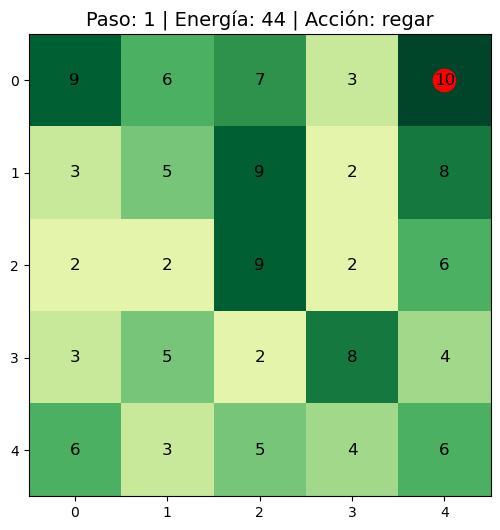

Paso 2 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 9.5


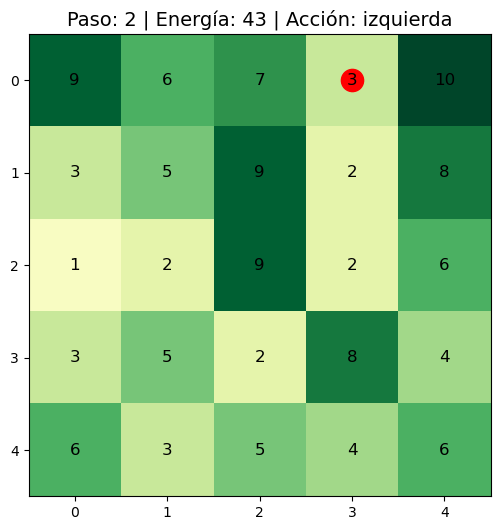

Paso 3 | Acción: regar | Recompensa: 10.0 | Acumulado: 19.5


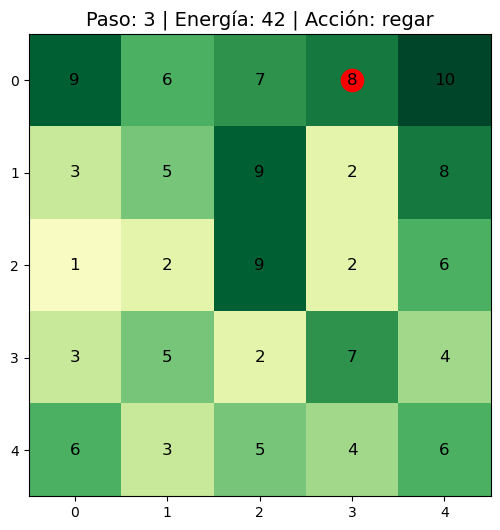

Paso 4 | Acción: abajo | Recompensa: -0.5 | Acumulado: 19.0


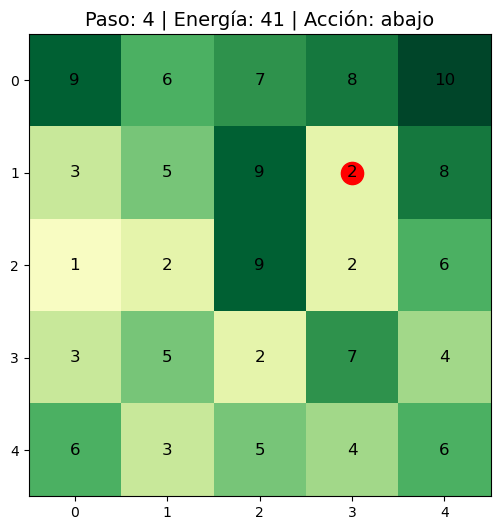

Paso 5 | Acción: regar | Recompensa: 10.0 | Acumulado: 29.0


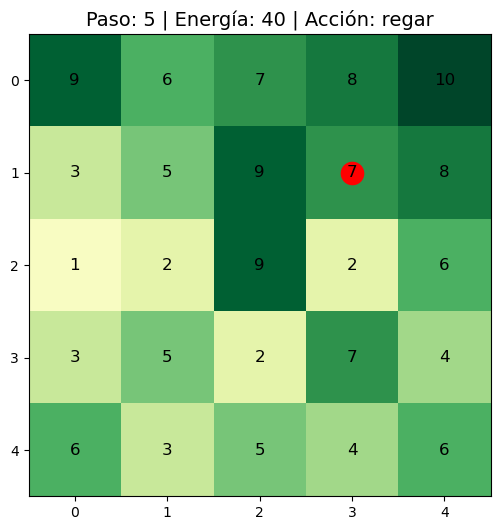

Paso 6 | Acción: abajo | Recompensa: -0.5 | Acumulado: 28.5


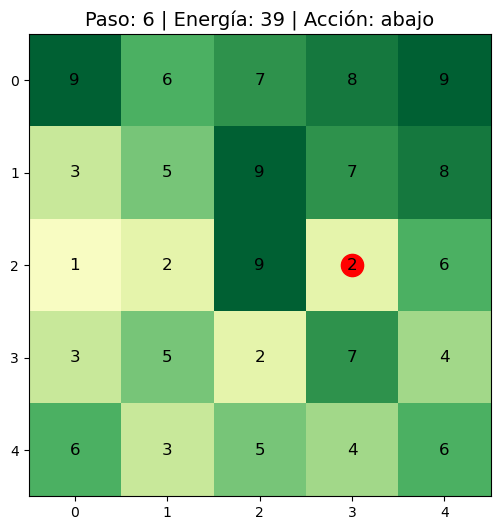

Paso 7 | Acción: regar | Recompensa: 10.0 | Acumulado: 38.5


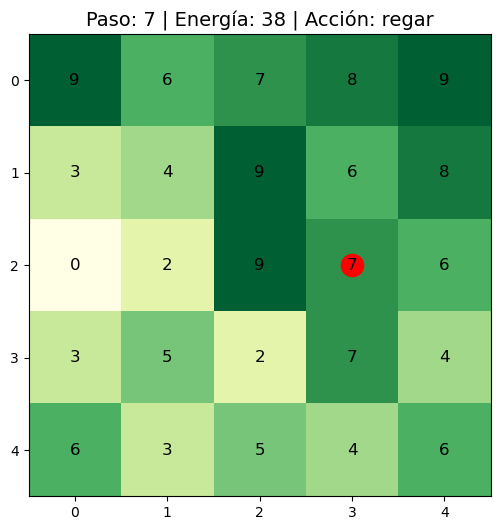

Paso 8 | Acción: derecha | Recompensa: -0.5 | Acumulado: 38.0


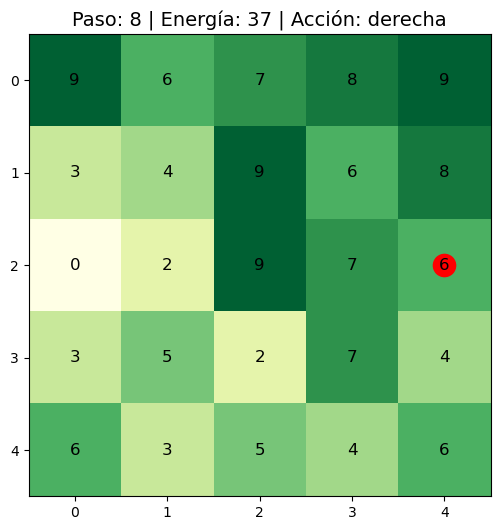

Paso 9 | Acción: regar | Recompensa: -1.0 | Acumulado: 37.0


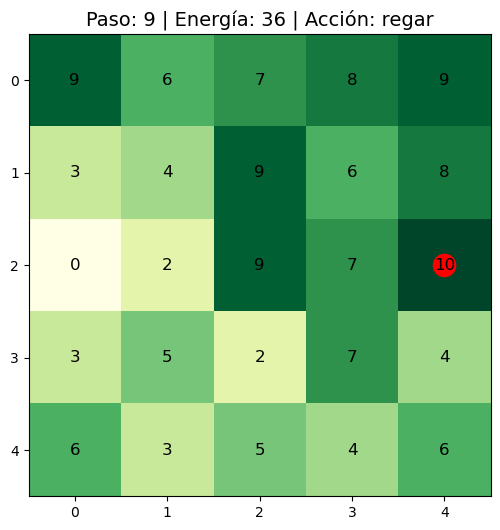

Paso 10 | Acción: abajo | Recompensa: -0.5 | Acumulado: 36.5


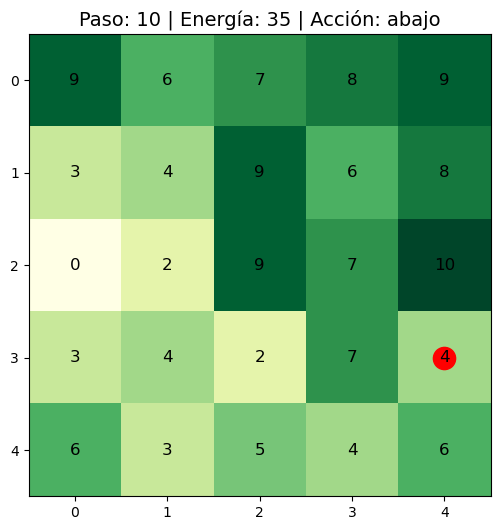

Paso 11 | Acción: regar | Recompensa: 10.0 | Acumulado: 46.5


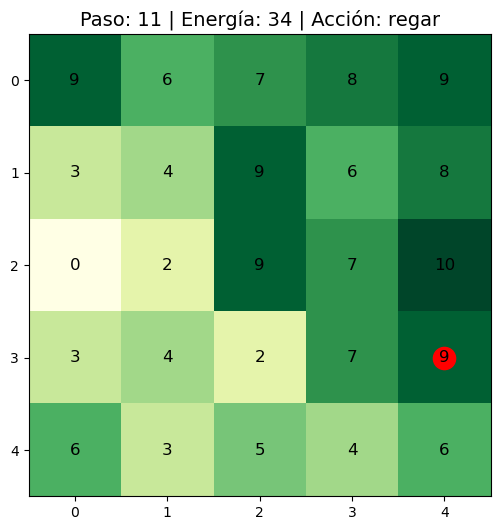

Paso 12 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 46.0


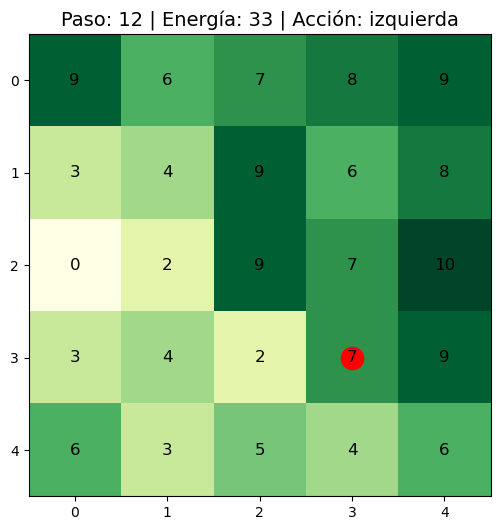

Paso 13 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 45.5


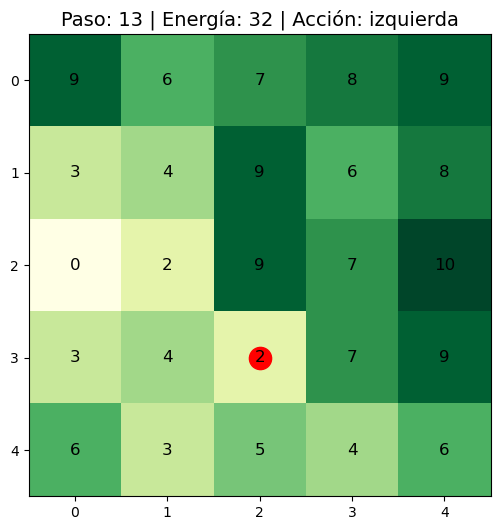

Paso 14 | Acción: regar | Recompensa: 10.0 | Acumulado: 55.5


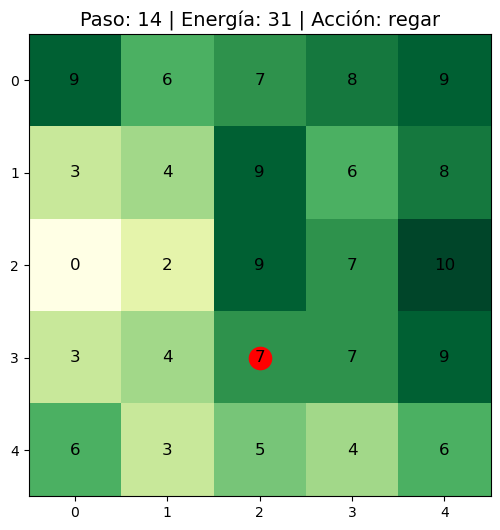

Paso 15 | Acción: abajo | Recompensa: -0.5 | Acumulado: 55.0


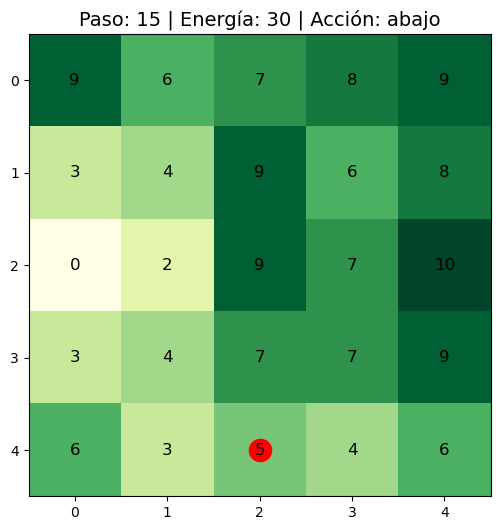

Paso 16 | Acción: regar | Recompensa: 10.0 | Acumulado: 65.0


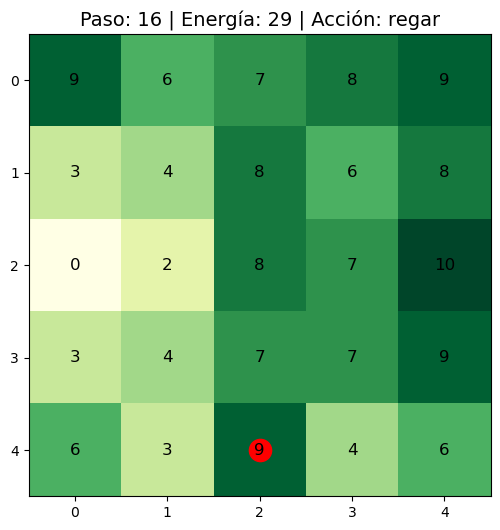

Paso 17 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 64.5


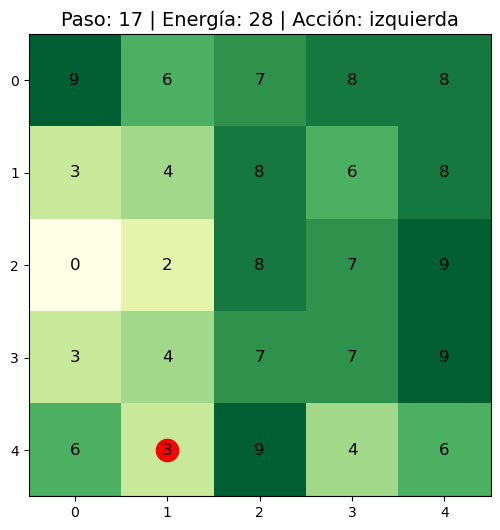

Paso 18 | Acción: regar | Recompensa: 10.0 | Acumulado: 74.5


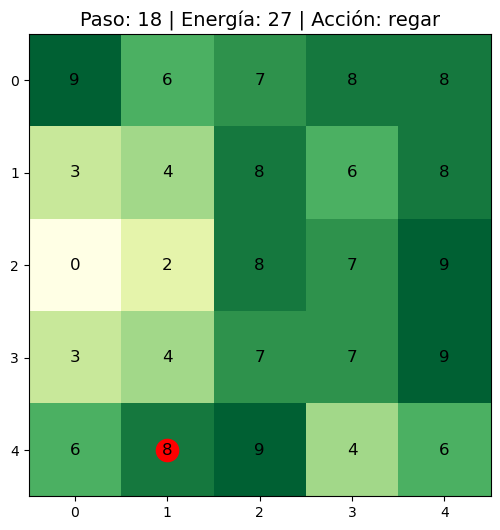

Paso 19 | Acción: arriba | Recompensa: -0.5 | Acumulado: 74.0


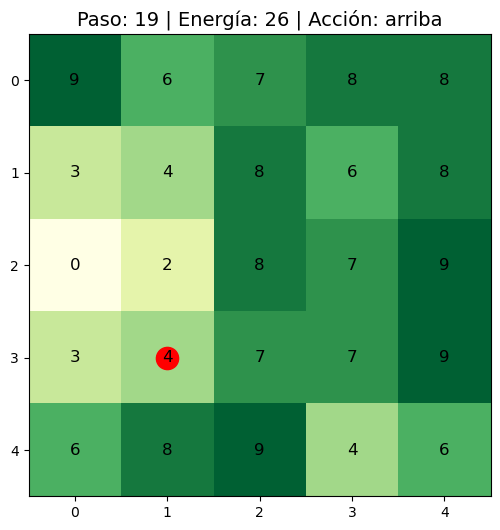

Paso 20 | Acción: regar | Recompensa: 10.0 | Acumulado: 84.0


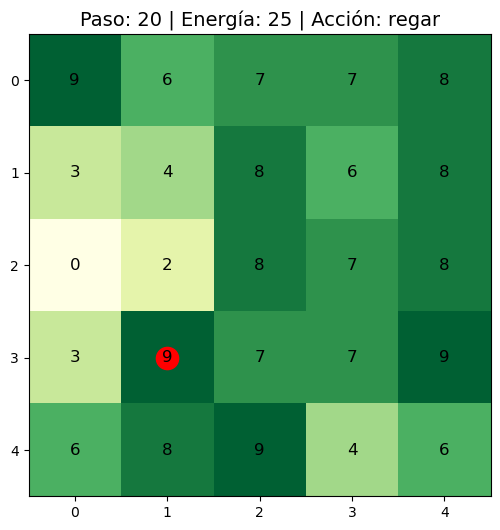

Paso 21 | Acción: arriba | Recompensa: -0.5 | Acumulado: 83.5


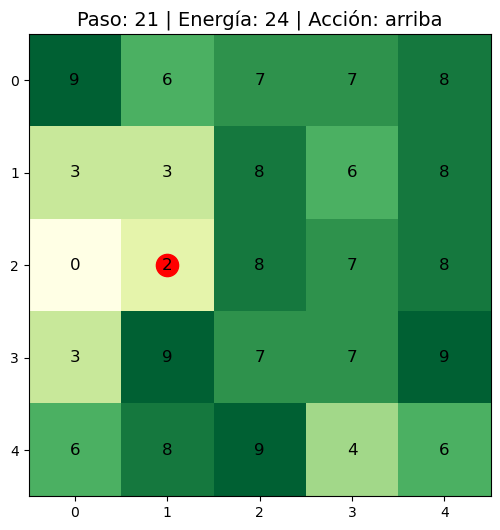

Paso 22 | Acción: regar | Recompensa: 10.0 | Acumulado: 93.5


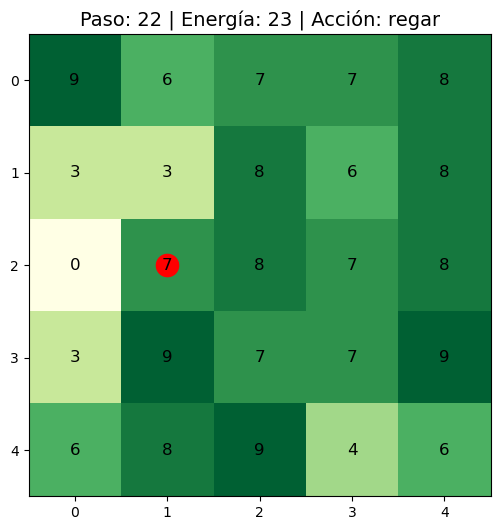

Paso 23 | Acción: arriba | Recompensa: -0.5 | Acumulado: 93.0


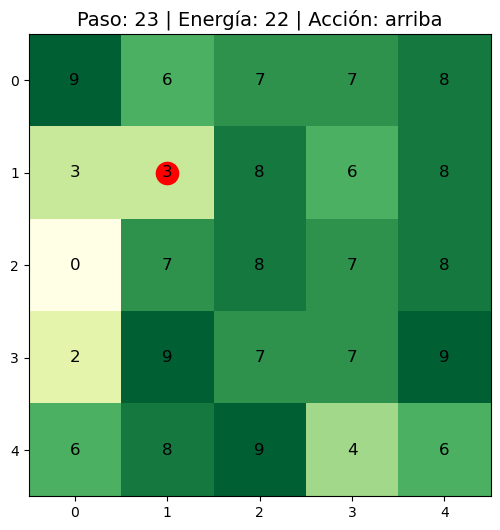

Paso 24 | Acción: regar | Recompensa: 10.0 | Acumulado: 103.0


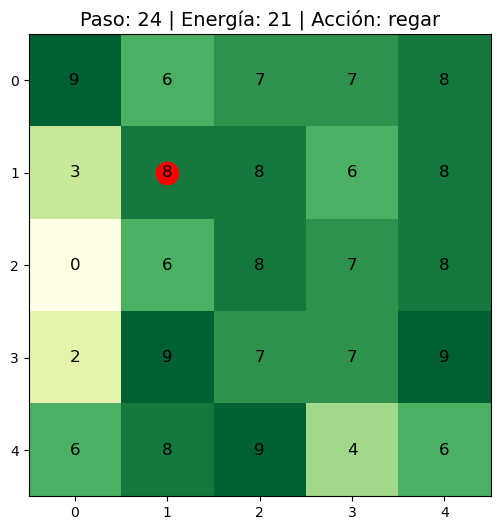

Paso 25 | Acción: derecha | Recompensa: -0.5 | Acumulado: 102.5


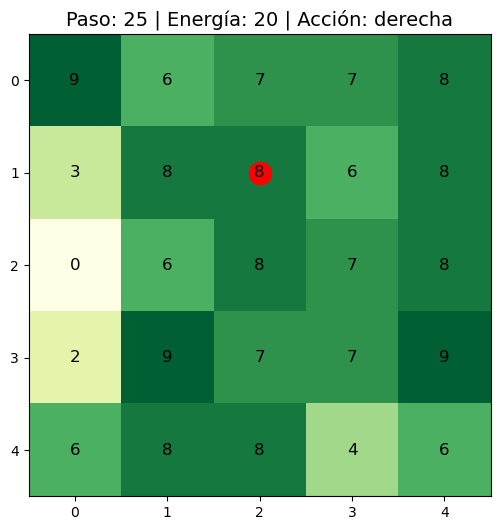

Paso 26 | Acción: arriba | Recompensa: -0.5 | Acumulado: 102.0


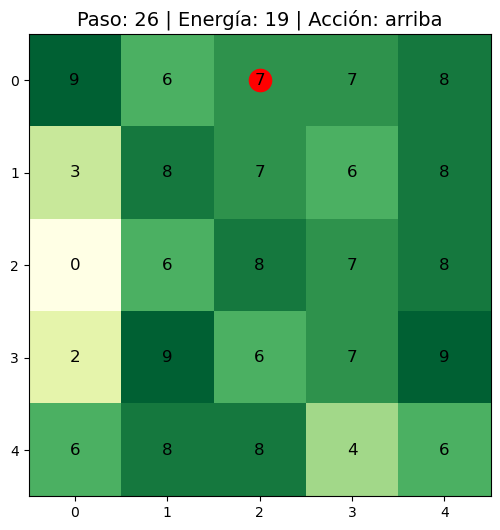

Paso 27 | Acción: derecha | Recompensa: -0.5 | Acumulado: 101.5


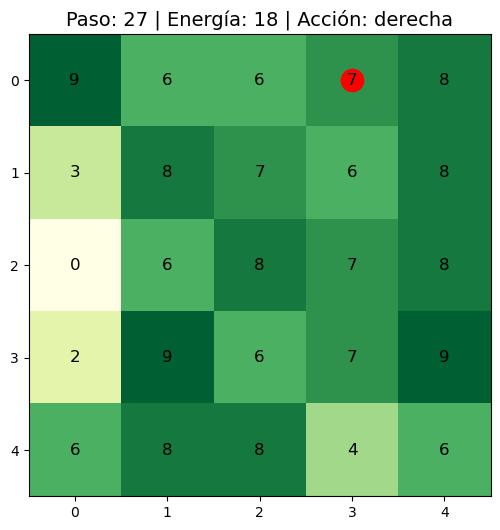

Paso 28 | Acción: abajo | Recompensa: -0.5 | Acumulado: 101.0


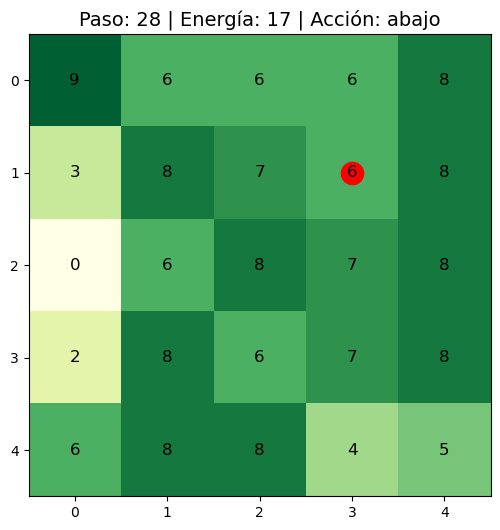

Paso 29 | Acción: regar | Recompensa: -1.0 | Acumulado: 100.0


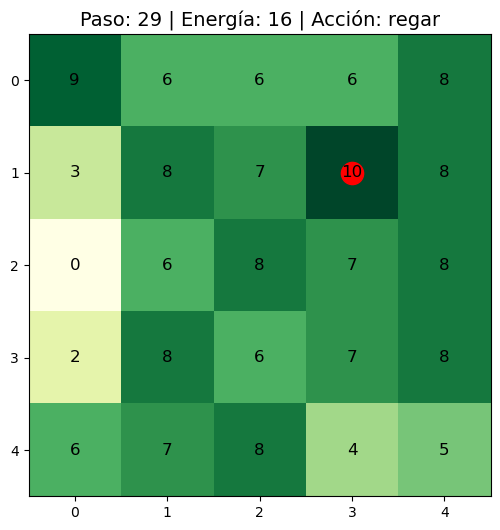

Paso 30 | Acción: abajo | Recompensa: -0.5 | Acumulado: 99.5


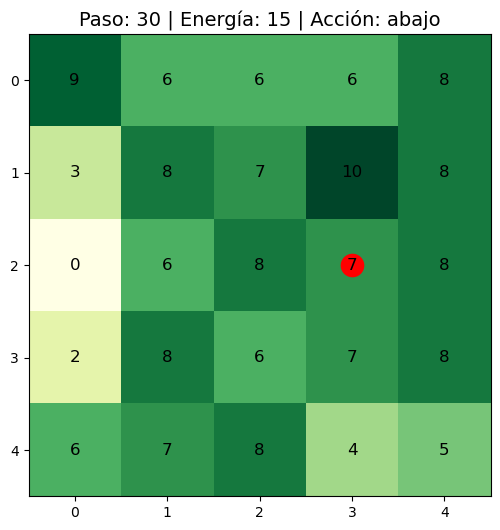

Paso 31 | Acción: derecha | Recompensa: -0.5 | Acumulado: 99.0


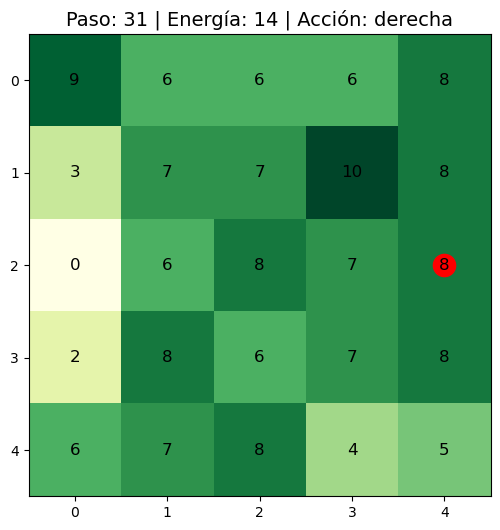

Paso 32 | Acción: abajo | Recompensa: -0.5 | Acumulado: 98.5


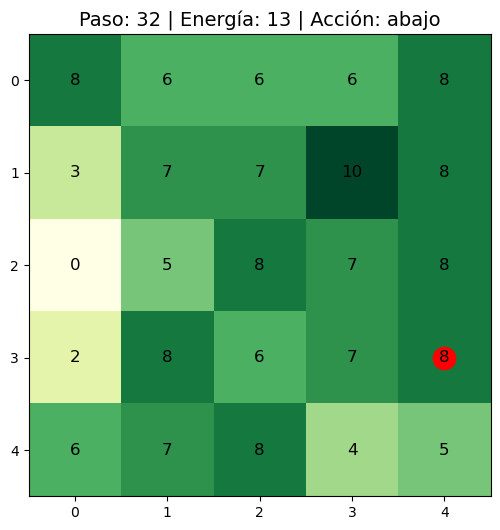

Paso 33 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 98.0


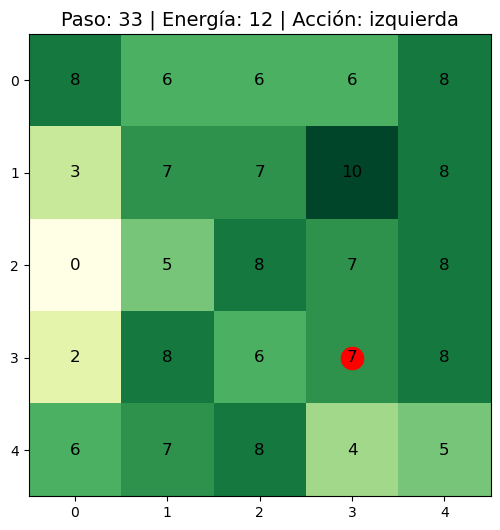

Paso 34 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 97.5


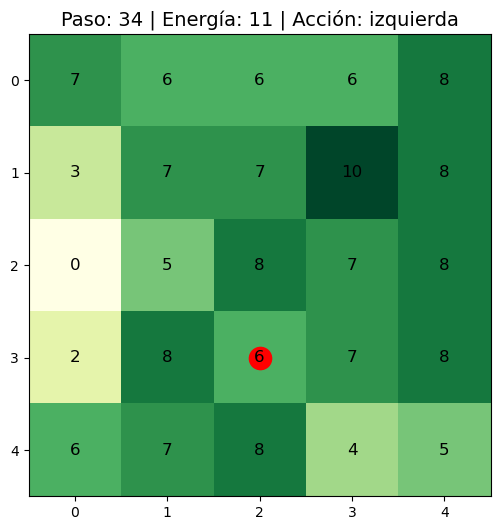

Paso 35 | Acción: regar | Recompensa: -1.0 | Acumulado: 96.5


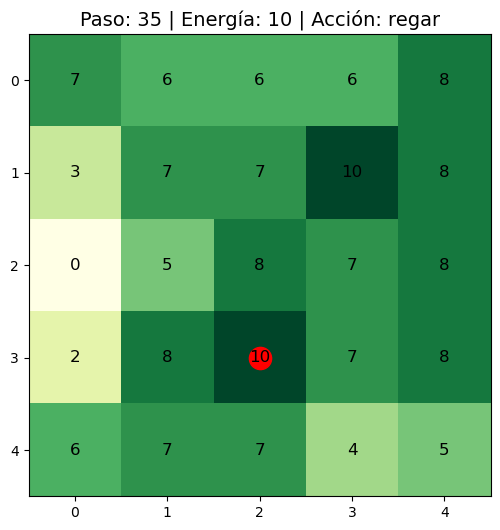

Paso 36 | Acción: abajo | Recompensa: -0.5 | Acumulado: 96.0


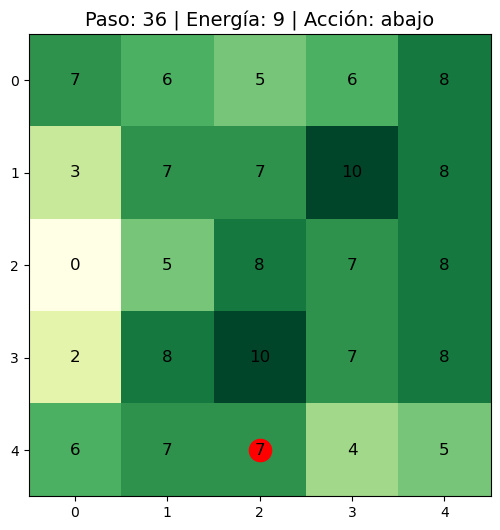

Paso 37 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 95.5


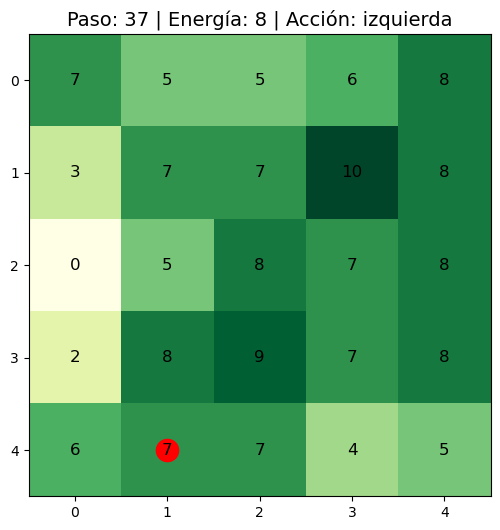

Paso 38 | Acción: arriba | Recompensa: -0.5 | Acumulado: 95.0


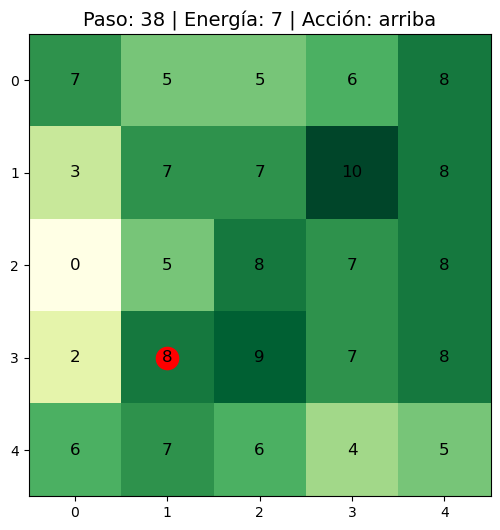

Paso 39 | Acción: arriba | Recompensa: -0.5 | Acumulado: 94.5


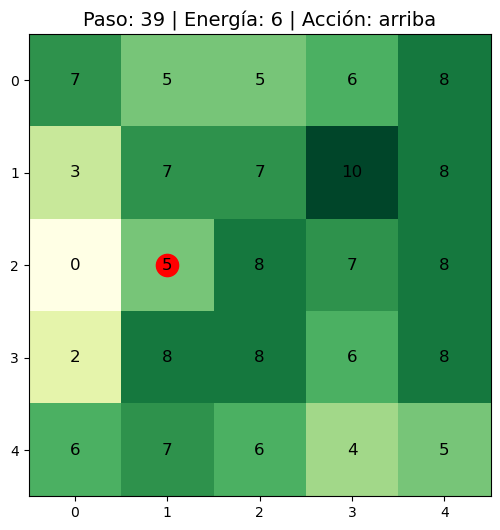

Paso 40 | Acción: regar | Recompensa: 10.0 | Acumulado: 104.5


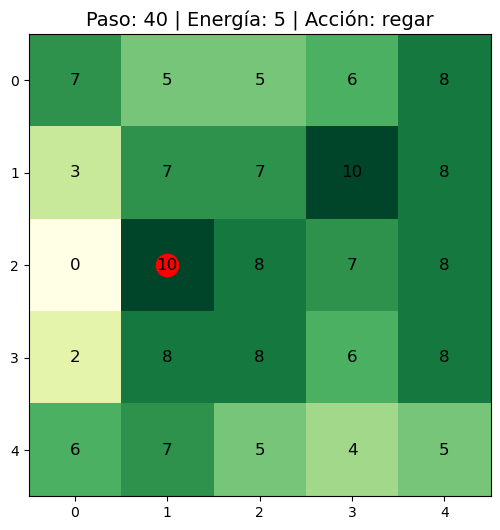

Paso 41 | Acción: arriba | Recompensa: -0.5 | Acumulado: 104.0


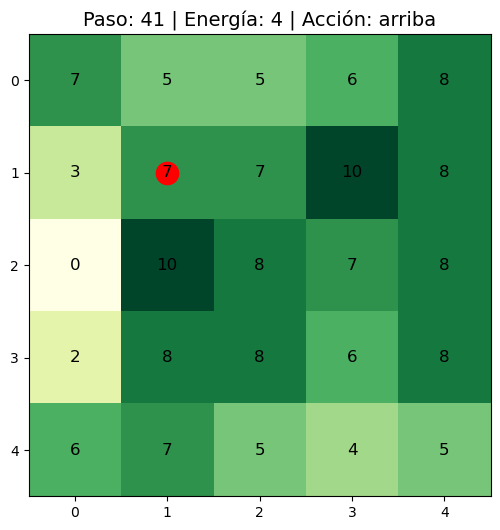

Paso 42 | Acción: derecha | Recompensa: -0.5 | Acumulado: 103.5


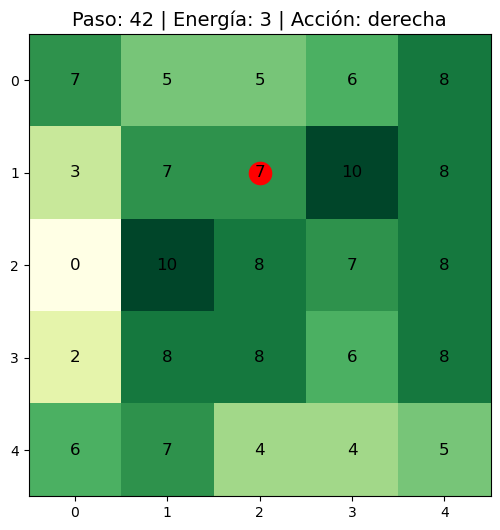

Paso 43 | Acción: arriba | Recompensa: -0.5 | Acumulado: 103.0


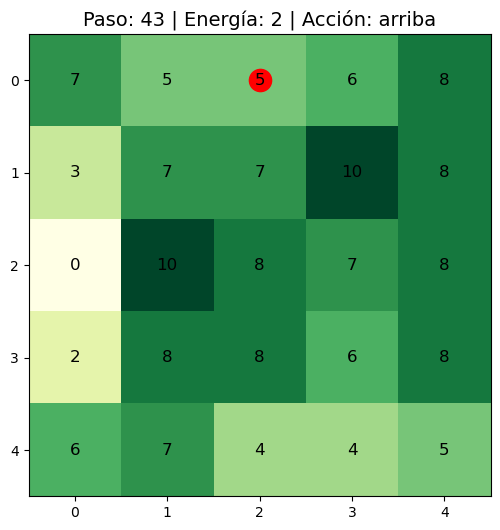

Paso 44 | Acción: regar | Recompensa: 10.0 | Acumulado: 113.0


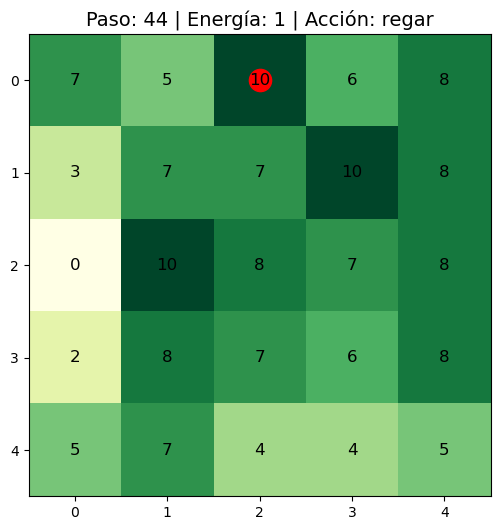

Paso 45 | Acción: derecha | Recompensa: -0.5 | Acumulado: 112.5


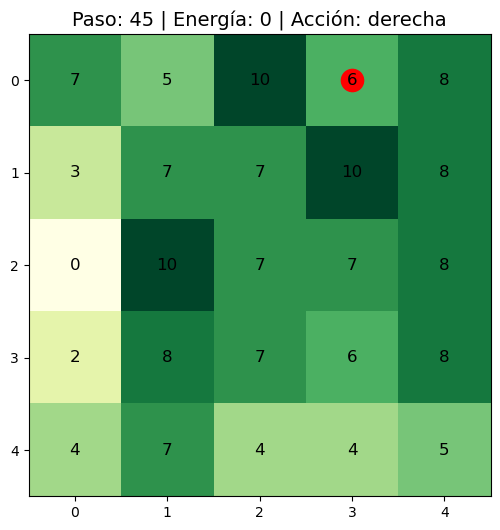


🏁 Fin del episodio 1 | Recompensa total: 112.5 | Energía: 0



In [5]:
episodios = 1

# Entrenamiento visual
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla)) # Inicializamos de forma aleatoria la humedad de la grilla
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1)) #Ubicamos al robot en una posicion inicial aleatoria para empezar
    recompensa_total = 0
    paso = 0
    energia = energia_robot #Energia con la que arranca el robot

    # Mostrar el estado inicial (sin recompensas, sin acción)
    visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=None)
    print("\n🌱 Comienza el episodio...\n")

# --- Acá empieza el bucle de aprendizaje
    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        print(f"Paso {paso} | Acción: {acciones[accion_idx]} | Recompensa: {recompensa:.1f} | Acumulado: {recompensa_total:.1f}")
        visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=accion_idx)

        if energia <= 0 or np.all(humedad_grid <= 1):
          print(f"\n🏁 Fin del episodio {ep+1} | Recompensa total: {recompensa_total:.1f} | Energía: {energia}\n")
          break

Si bien estamos viendo que el robot aprendió a regar las plantas que tienen humedad baja, vemos tambien que no está recorriendo toda la grilla y que hay plantas que se le estan secando en el camino.

A continuación, realizamos el mismo ejercicio pero modificando el parametro alpha

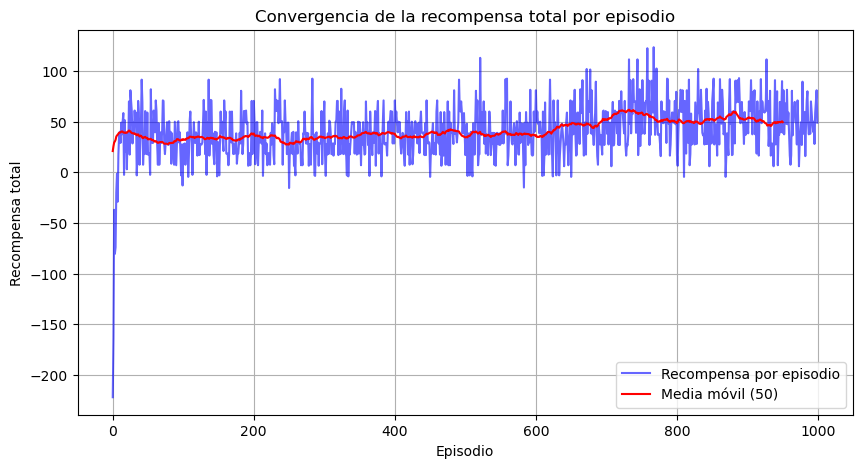

In [6]:
# Parámetros del entorno
tamaño_grilla = 5 #tamaño de la grilla de plantas
max_humedad = 10 #humedad maxima de la planta
min_humedad = 0 #humedad minima de la planta
acciones = ["arriba", "abajo", "izquierda", "derecha", "regar"] #acciones disponibles
prob_secado_plantas = 0.05 #porcentaje de las plantas que pierden humedad en cada paso
energia_robot=45 #energia del robot
Q = {}  # Tabla Q
aumento_por_regar=5 #aumento en la humedad de la planta por ser regada

# Parámetros de Q-learning
alpha = 0.1
gamma = 0.7
epsilon = 0.01
episodios = 1000

# Establecemos las recompensas
RECOMPENSA_POR_REGAR_A_TIEMPO = 10
CASTIGO_POR_REGAR_DE_MAS = -1
CASTIGO_POR_PLANTA_SECA = -10
CASTIGO_POR_MOVERSE = -0.5


# Lista para almacenar recompensas de cada episodio
recompensas_por_episodio = []

# Entrenamiento
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla))
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1))
    recompensa_total = 0
    paso = 0
    energia = energia_robot

    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        if energia <= 0 or np.all(humedad_grid <= 1):
            break

    recompensas_por_episodio.append(recompensa_total)

# Gráfico de convergencia
plt.figure(figsize=(10, 5))
plt.plot(recompensas_por_episodio, color='blue', alpha=0.6, label='Recompensa por episodio')
plt.plot(np.convolve(recompensas_por_episodio, np.ones(50)/50, mode='valid'), color='red', label='Media móvil (50)')
plt.title('Convergencia de la recompensa total por episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.show()

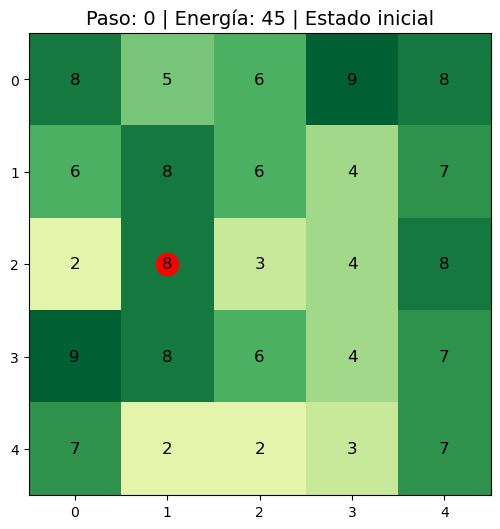


🌱 Comienza el episodio...

Paso 1 | Acción: arriba | Recompensa: -0.5 | Acumulado: -0.5


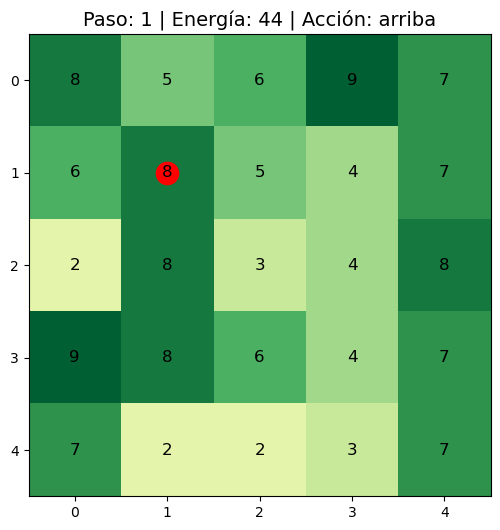

Paso 2 | Acción: izquierda | Recompensa: -0.5 | Acumulado: -1.0


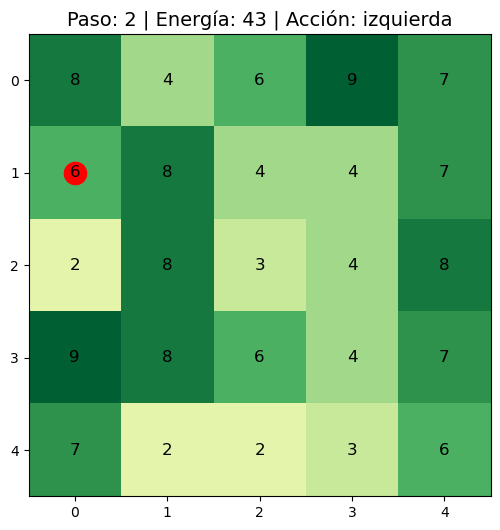

Paso 3 | Acción: regar | Recompensa: -1.0 | Acumulado: -2.0


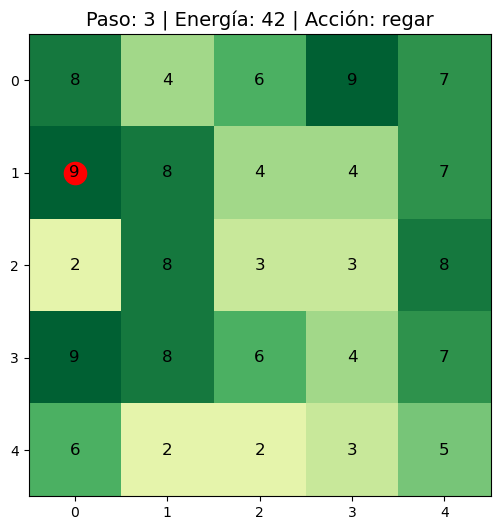

Paso 4 | Acción: arriba | Recompensa: -0.5 | Acumulado: -2.5


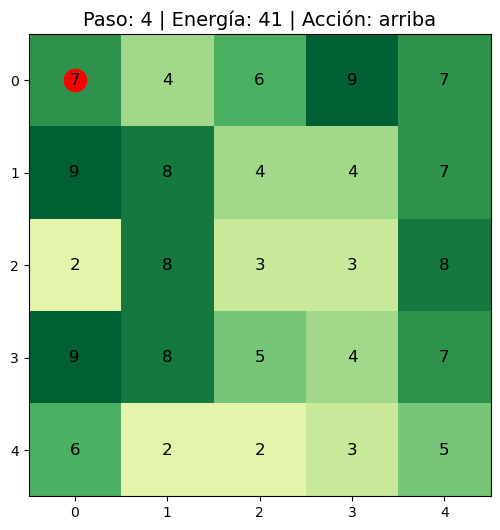

Paso 5 | Acción: derecha | Recompensa: -0.5 | Acumulado: -3.0


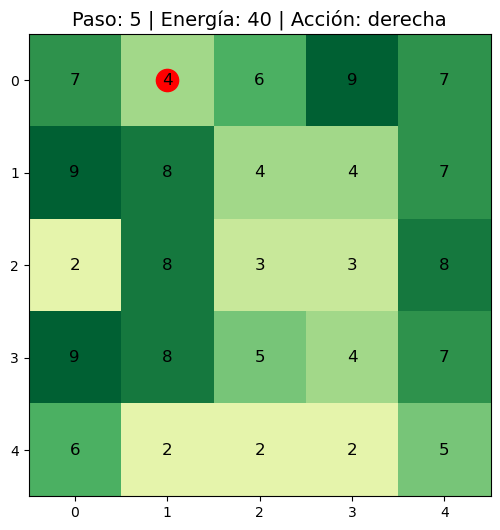

Paso 6 | Acción: regar | Recompensa: 10.0 | Acumulado: 7.0


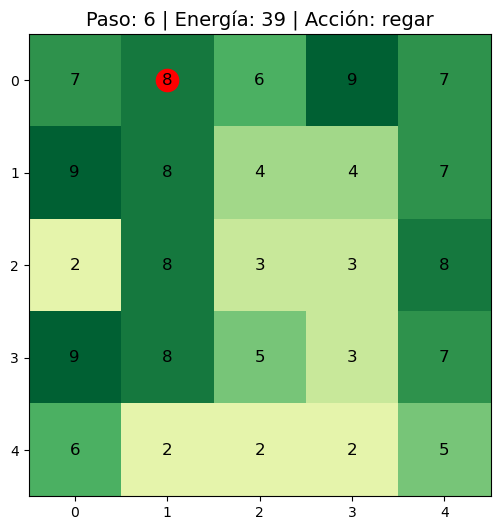

Paso 7 | Acción: derecha | Recompensa: -0.5 | Acumulado: 6.5


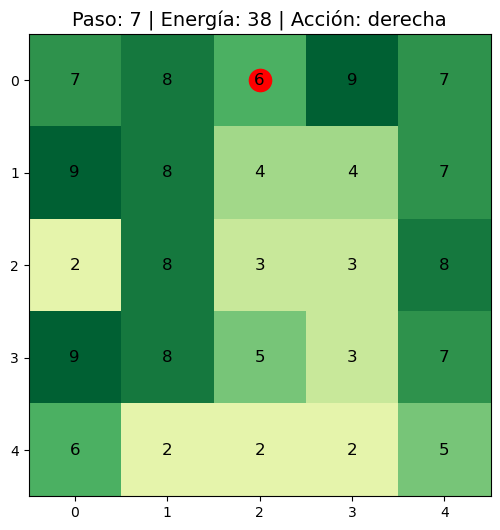

Paso 8 | Acción: regar | Recompensa: -1.0 | Acumulado: 5.5


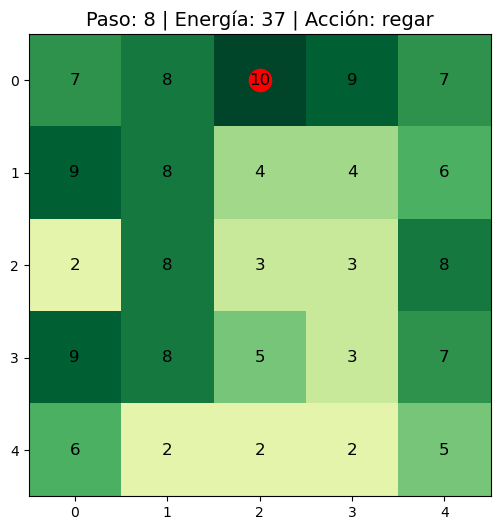

Paso 9 | Acción: abajo | Recompensa: -0.5 | Acumulado: 5.0


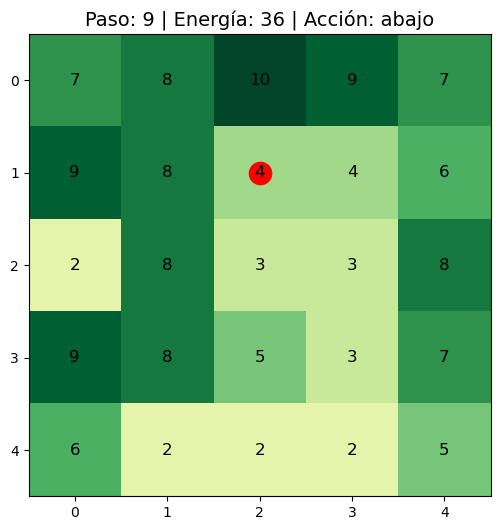

Paso 10 | Acción: regar | Recompensa: 10.0 | Acumulado: 15.0


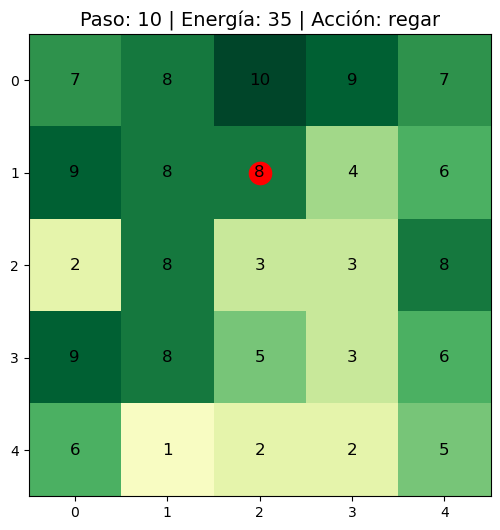

Paso 11 | Acción: abajo | Recompensa: -0.5 | Acumulado: 14.5


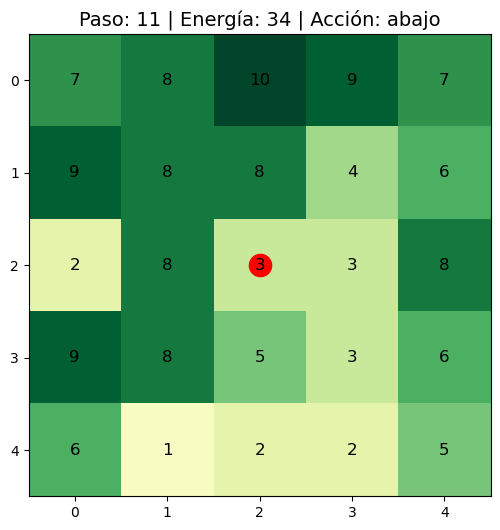

Paso 12 | Acción: regar | Recompensa: 10.0 | Acumulado: 24.5


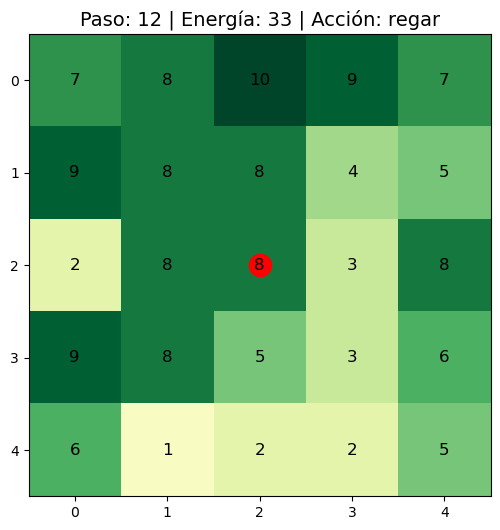

Paso 13 | Acción: abajo | Recompensa: -0.5 | Acumulado: 24.0


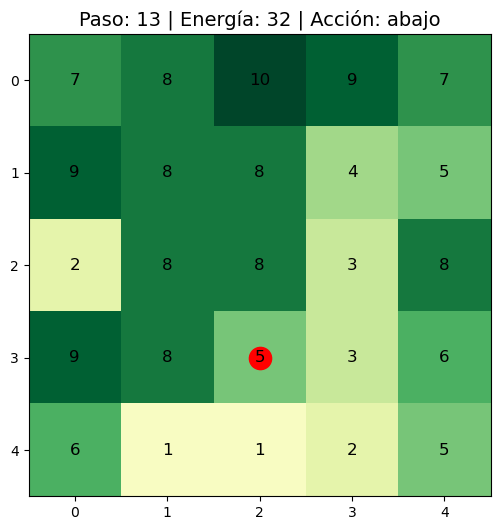

Paso 14 | Acción: regar | Recompensa: 10.0 | Acumulado: 34.0


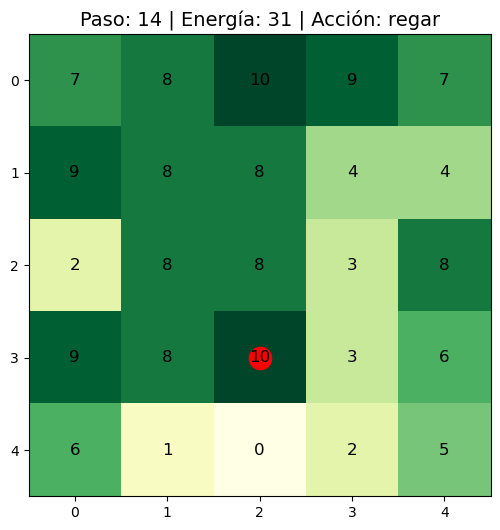

Paso 15 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 33.5


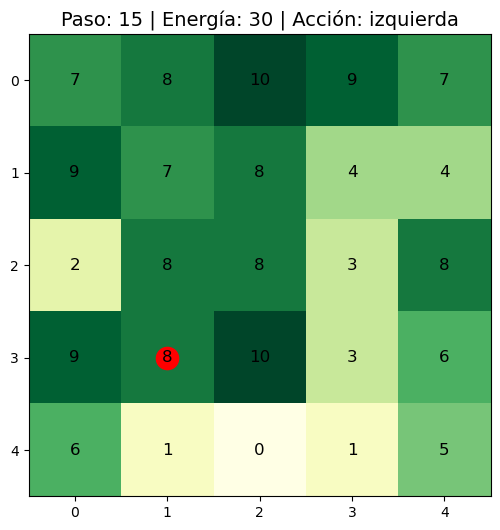

Paso 16 | Acción: arriba | Recompensa: -0.5 | Acumulado: 33.0


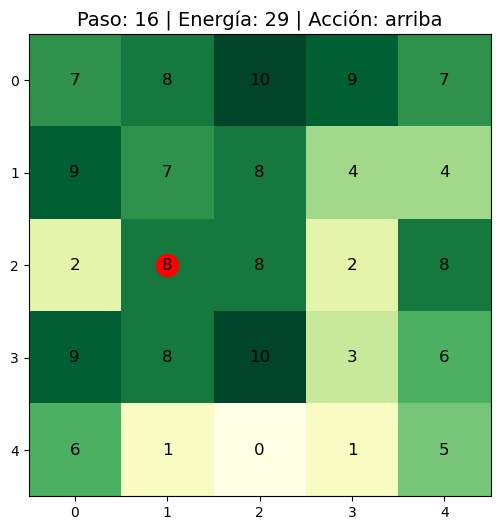

Paso 17 | Acción: arriba | Recompensa: -0.5 | Acumulado: 32.5


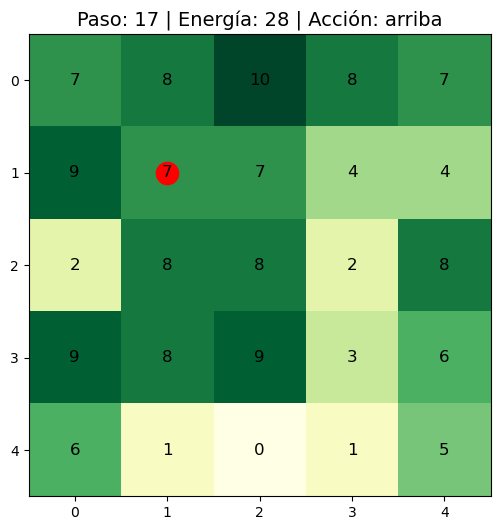

Paso 18 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 32.0


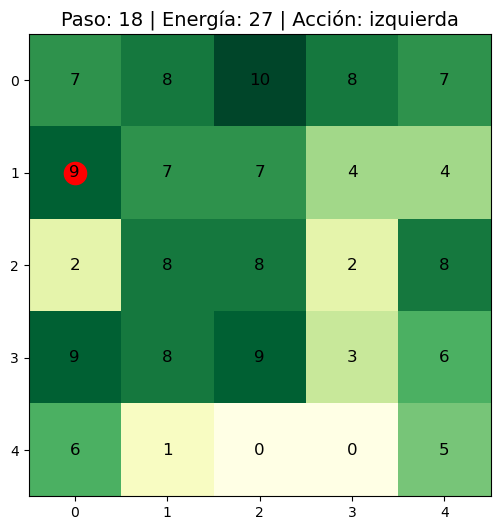

Paso 19 | Acción: arriba | Recompensa: -0.5 | Acumulado: 31.5


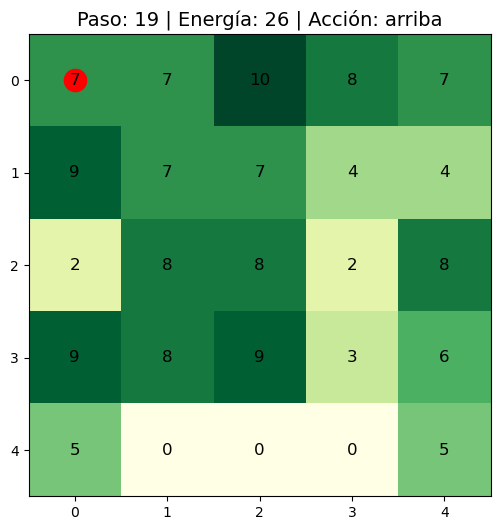

Paso 20 | Acción: derecha | Recompensa: -0.5 | Acumulado: 31.0


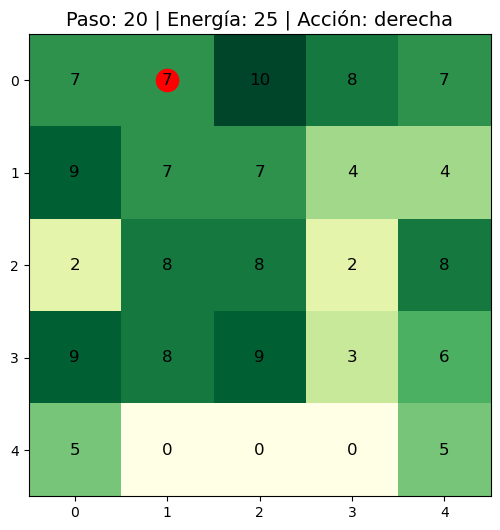

Paso 21 | Acción: derecha | Recompensa: -0.5 | Acumulado: 30.5


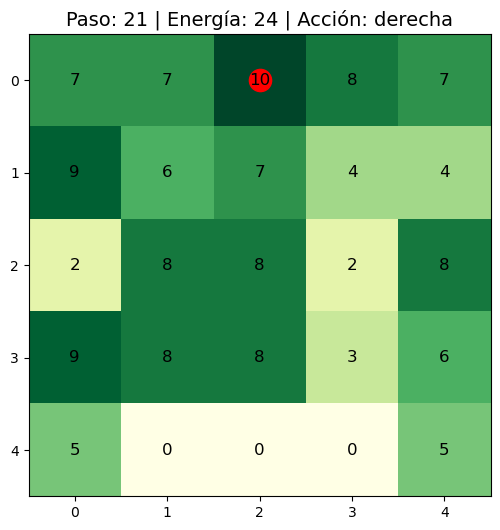

Paso 22 | Acción: abajo | Recompensa: -0.5 | Acumulado: 30.0


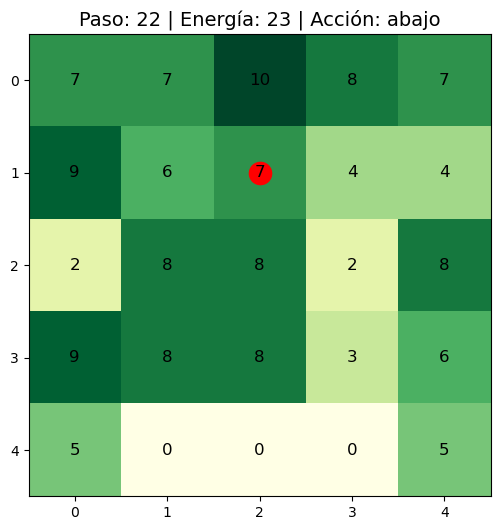

Paso 23 | Acción: abajo | Recompensa: -0.5 | Acumulado: 29.5


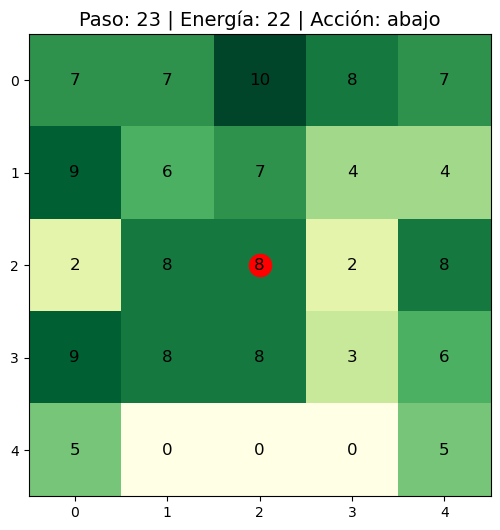

Paso 24 | Acción: abajo | Recompensa: -0.5 | Acumulado: 29.0


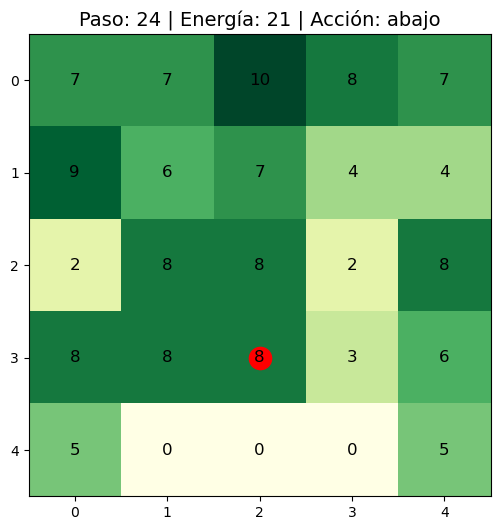

Paso 25 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 28.5


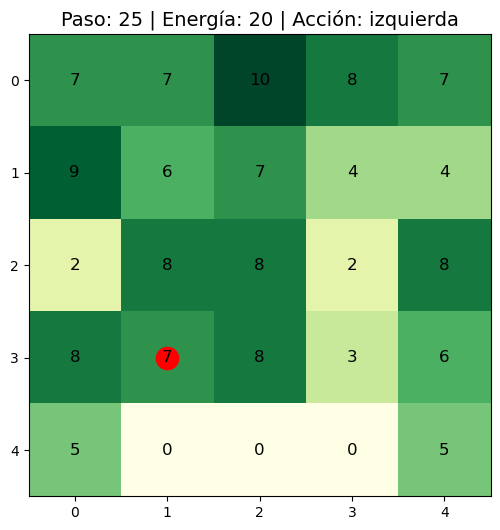

Paso 26 | Acción: arriba | Recompensa: -0.5 | Acumulado: 28.0


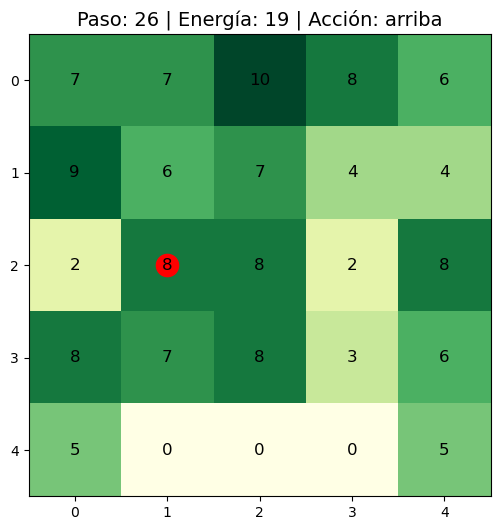

Paso 27 | Acción: arriba | Recompensa: -0.5 | Acumulado: 27.5


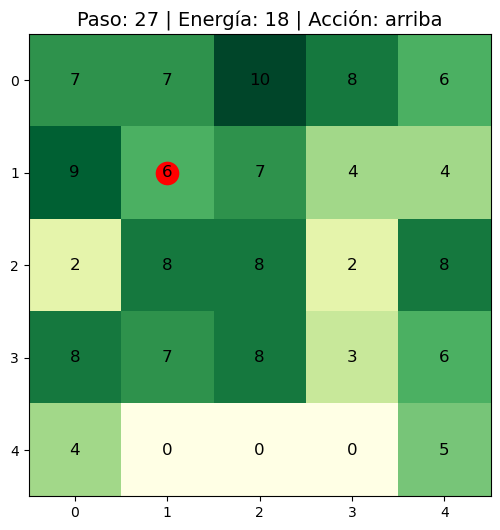

Paso 28 | Acción: regar | Recompensa: -1.0 | Acumulado: 26.5


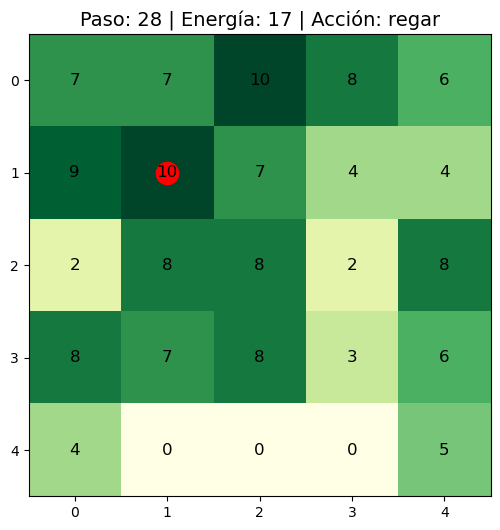

Paso 29 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 26.0


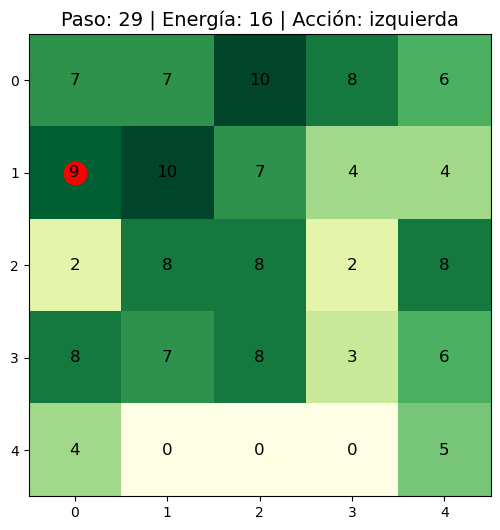

Paso 30 | Acción: arriba | Recompensa: -0.5 | Acumulado: 25.5


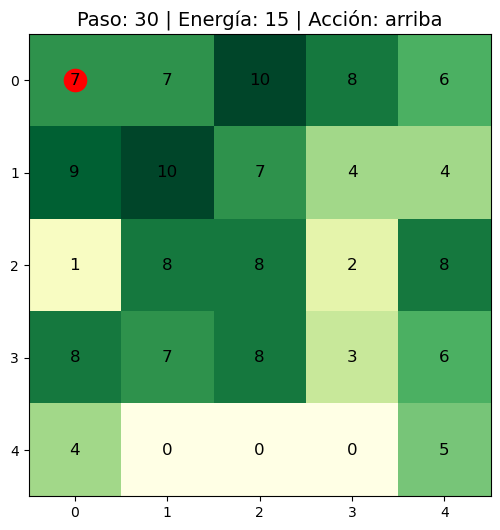

Paso 31 | Acción: derecha | Recompensa: -0.5 | Acumulado: 25.0


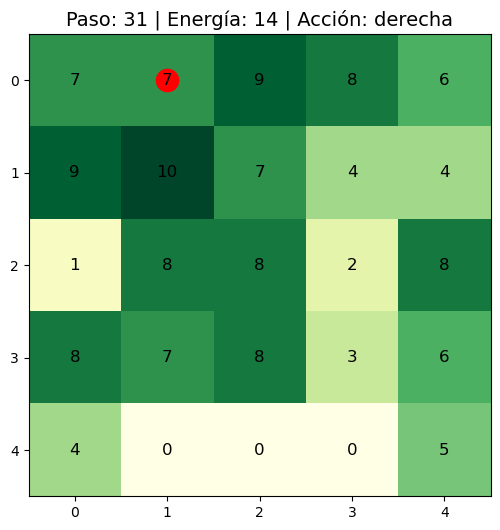

Paso 32 | Acción: derecha | Recompensa: -0.5 | Acumulado: 24.5


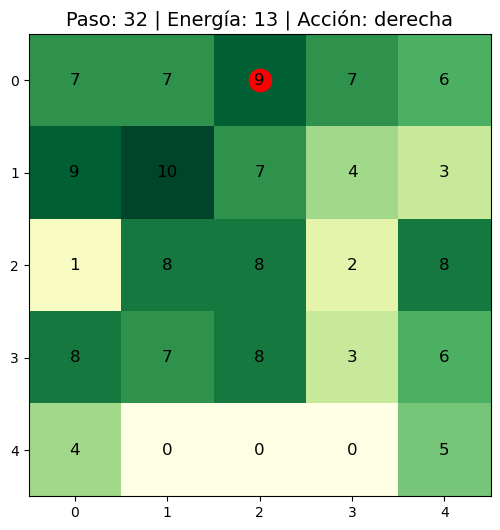

Paso 33 | Acción: abajo | Recompensa: -0.5 | Acumulado: 24.0


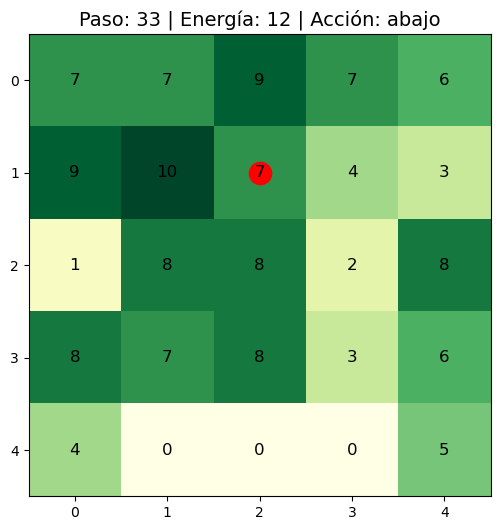

Paso 34 | Acción: abajo | Recompensa: -0.5 | Acumulado: 23.5


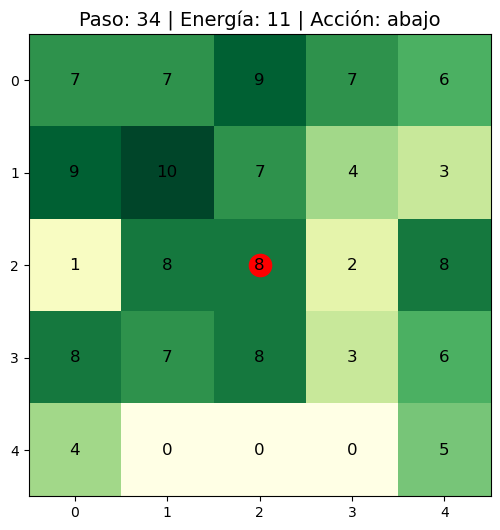

Paso 35 | Acción: abajo | Recompensa: -0.5 | Acumulado: 23.0


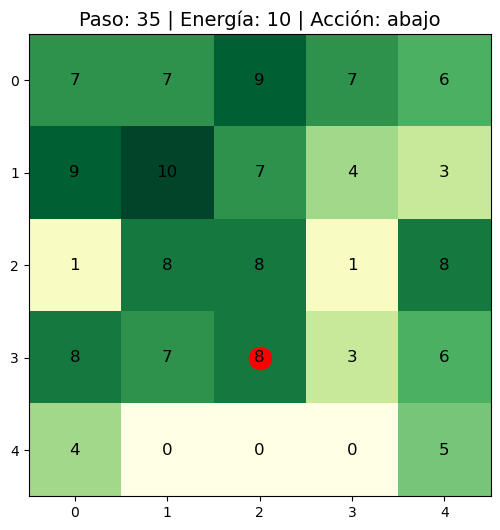

Paso 36 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 22.5


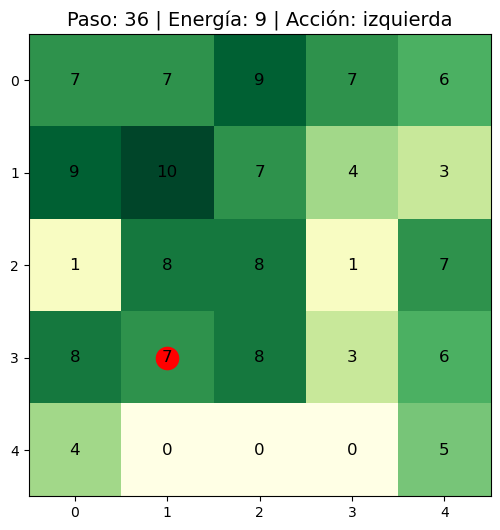

Paso 37 | Acción: arriba | Recompensa: -0.5 | Acumulado: 22.0


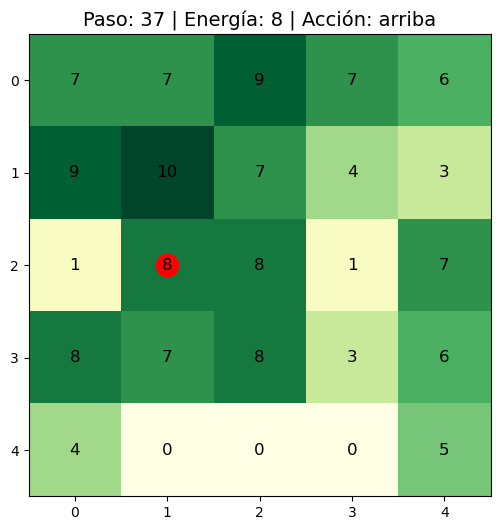

Paso 38 | Acción: arriba | Recompensa: -0.5 | Acumulado: 21.5


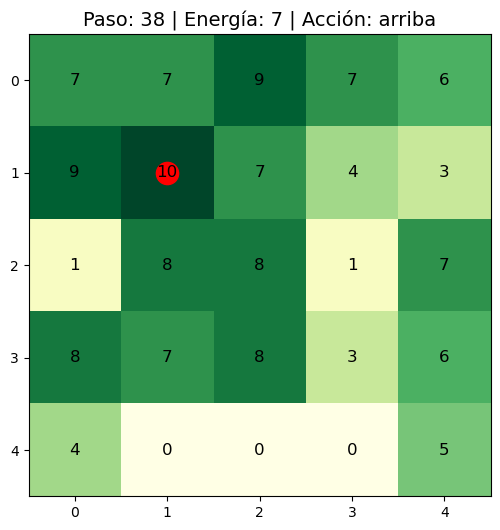

Paso 39 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 21.0


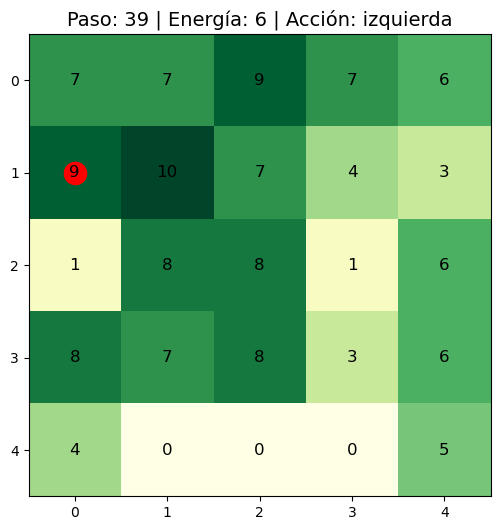

Paso 40 | Acción: arriba | Recompensa: -0.5 | Acumulado: 20.5


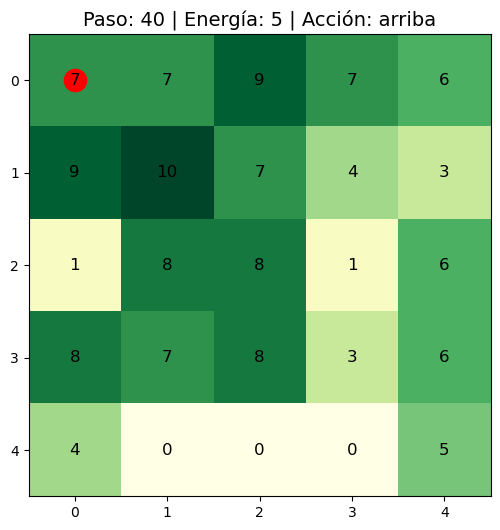

Paso 41 | Acción: derecha | Recompensa: -0.5 | Acumulado: 20.0


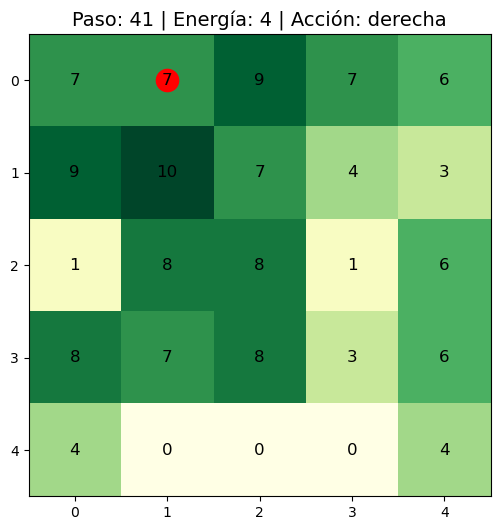

Paso 42 | Acción: derecha | Recompensa: -0.5 | Acumulado: 19.5


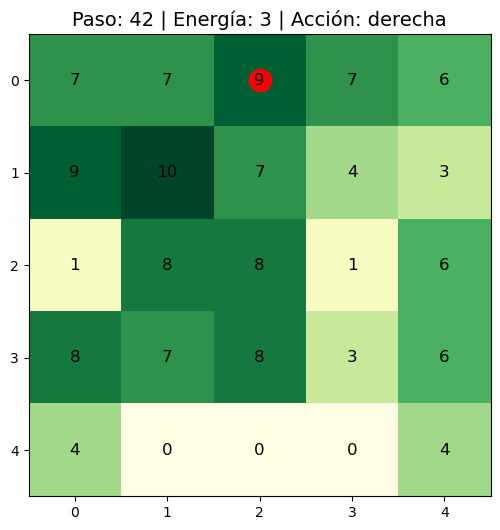

Paso 43 | Acción: abajo | Recompensa: -0.5 | Acumulado: 19.0


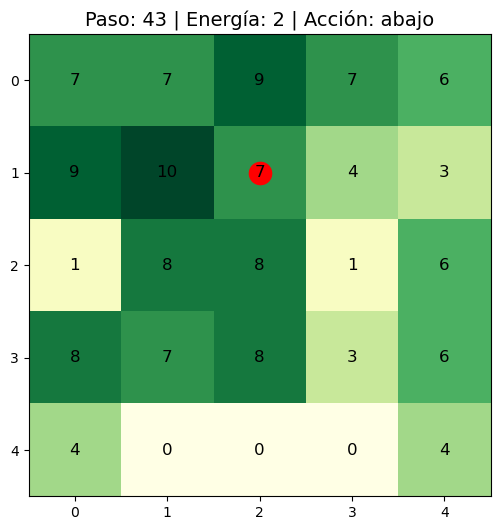

Paso 44 | Acción: abajo | Recompensa: -0.5 | Acumulado: 18.5


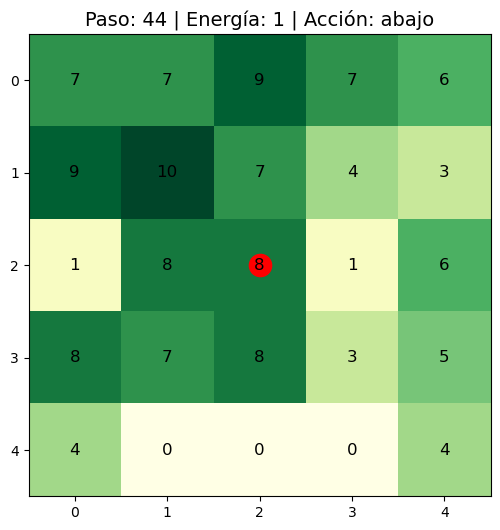

Paso 45 | Acción: abajo | Recompensa: -0.5 | Acumulado: 18.0


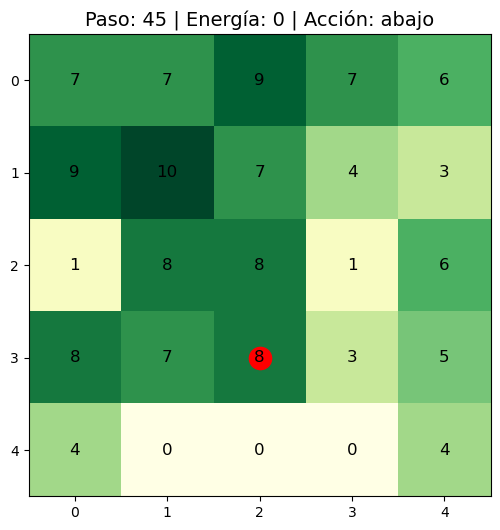


🏁 Fin del episodio 1 | Recompensa total: 18.0 | Energía: 0



In [7]:
episodios=1
# Entrenamiento visual
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla)) # Inicializamos de forma aleatoria la humedad de la grilla
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1)) #Ubicamos al robot en una posicion inicial aleatoria para empezar
    recompensa_total = 0
    paso = 0
    energia = energia_robot #Energia con la que arranca el robot

    # Mostrar el estado inicial (sin recompensas, sin acción)
    visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=None)
    print("\n🌱 Comienza el episodio...\n")

# --- Acá empieza el bucle de aprendizaje
    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        print(f"Paso {paso} | Acción: {acciones[accion_idx]} | Recompensa: {recompensa:.1f} | Acumulado: {recompensa_total:.1f}")
        visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=accion_idx)

        if energia <= 0 or np.all(humedad_grid <= 1):
          print(f"\n🏁 Fin del episodio {ep+1} | Recompensa total: {recompensa_total:.1f} | Energía: {energia}\n")
          break

Observamos que con el alpha más alto, los resultados son incluso peores de los que obteniamos antes (el robot está dejando sin recorrer una parte importante de la grilla y muchas plantas terminaron muriendo). La recompensa final de este episodio fue notoriamente más baja.

A continuación analizamos qué sucede si cambiamos el epsilon, haciendo que en los primeros episodios explore más y que en los ultimos explote mas

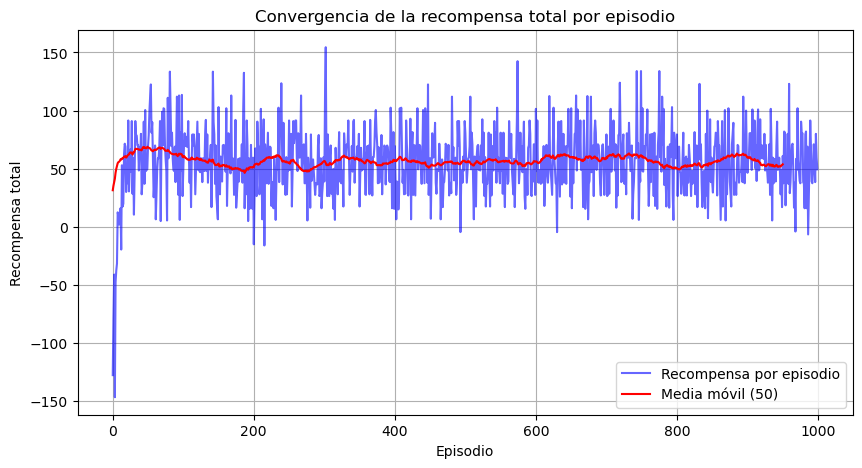

In [8]:
# Parámetros del entorno
tamaño_grilla = 5 #tamaño de la grilla de plantas
max_humedad = 10 #humedad maxima de la planta
min_humedad = 0 #humedad minima de la planta
acciones = ["arriba", "abajo", "izquierda", "derecha", "regar"] #acciones disponibles
prob_secado_plantas = 0.05 #porcentaje de las plantas que pierden humedad en cada paso
energia_robot=45 #energia del robot
Q = {}  # Tabla Q
aumento_por_regar=5 #aumento en la humedad de la planta por ser regada

# Parámetros de Q-learning
alpha = 0.01
gamma = 0.7
episodios = 1000
epsilon_inicial = 1.0
epsilon_final = 0.01
decay_rate = 0.995

# Establecemos las recompensas
RECOMPENSA_POR_REGAR_A_TIEMPO = 10
CASTIGO_POR_REGAR_DE_MAS = -1
CASTIGO_POR_PLANTA_SECA = -10
CASTIGO_POR_MOVERSE = -0.5


# Lista para almacenar recompensas de cada episodio
recompensas_por_episodio = []

# Entrenamiento
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla))
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1))
    recompensa_total = 0
    paso = 0
    energia = energia_robot

    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        if energia <= 0 or np.all(humedad_grid <= 1):
            break

    recompensas_por_episodio.append(recompensa_total)
    epsilon = max(epsilon_final, epsilon * decay_rate)

# Gráfico de convergencia
plt.figure(figsize=(10, 5))
plt.plot(recompensas_por_episodio, color='blue', alpha=0.6, label='Recompensa por episodio')
plt.plot(np.convolve(recompensas_por_episodio, np.ones(50)/50, mode='valid'), color='red', label='Media móvil (50)')
plt.title('Convergencia de la recompensa total por episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.show()

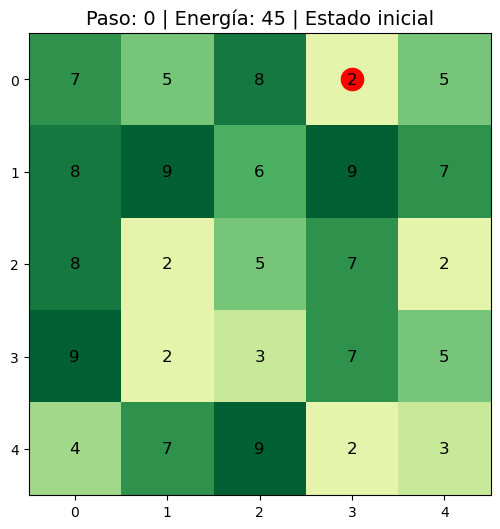


🌱 Comienza el episodio...

Paso 1 | Acción: regar | Recompensa: 10.0 | Acumulado: 10.0


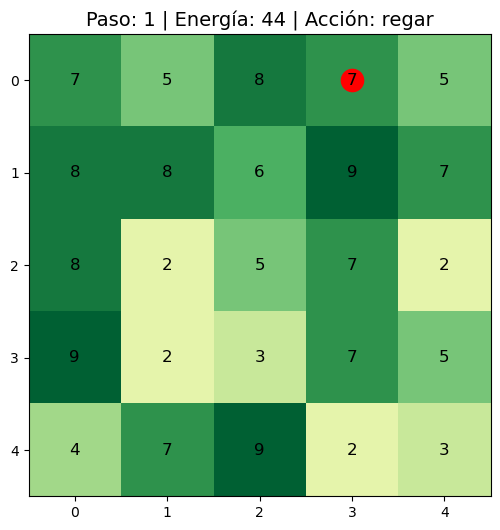

Paso 2 | Acción: derecha | Recompensa: -0.5 | Acumulado: 9.5


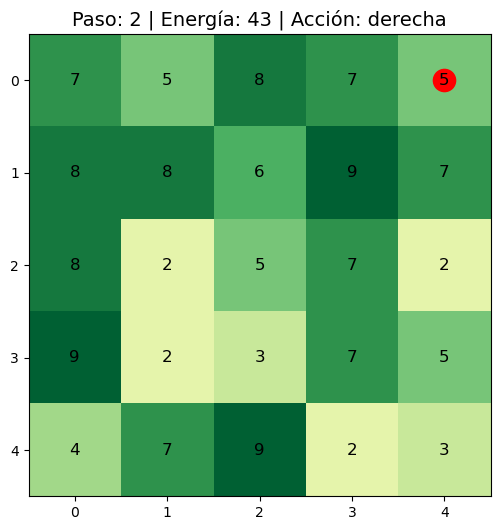

Paso 3 | Acción: regar | Recompensa: 10.0 | Acumulado: 19.5


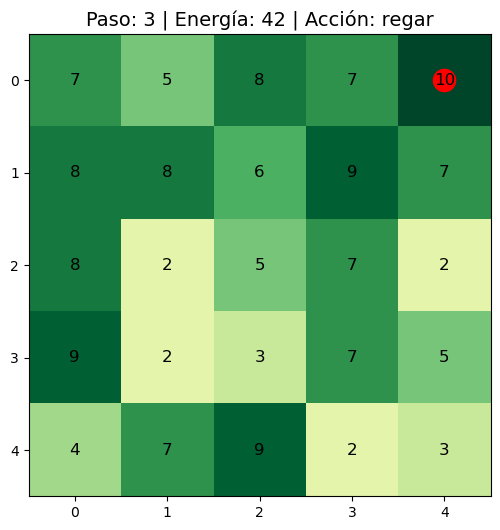

Paso 4 | Acción: abajo | Recompensa: -0.5 | Acumulado: 19.0


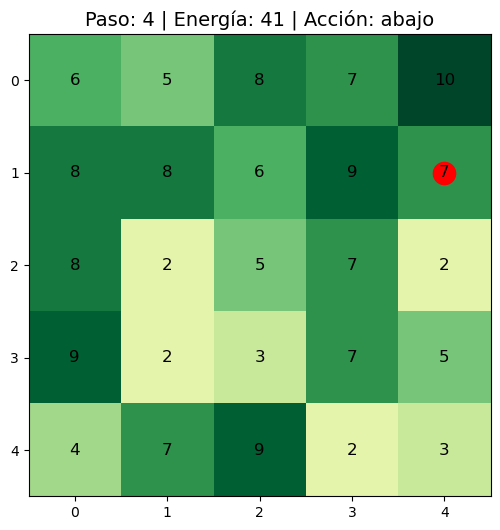

Paso 5 | Acción: abajo | Recompensa: -0.5 | Acumulado: 18.5


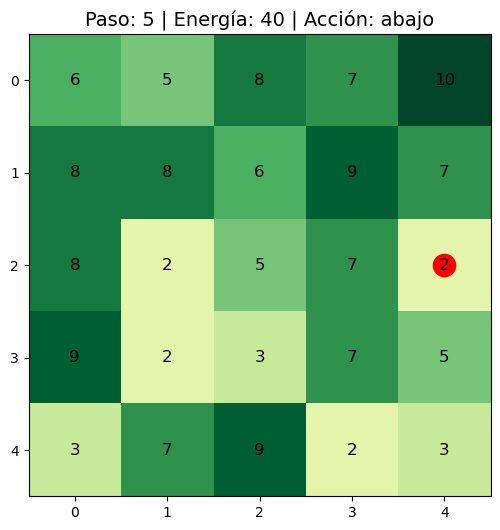

Paso 6 | Acción: regar | Recompensa: 10.0 | Acumulado: 28.5


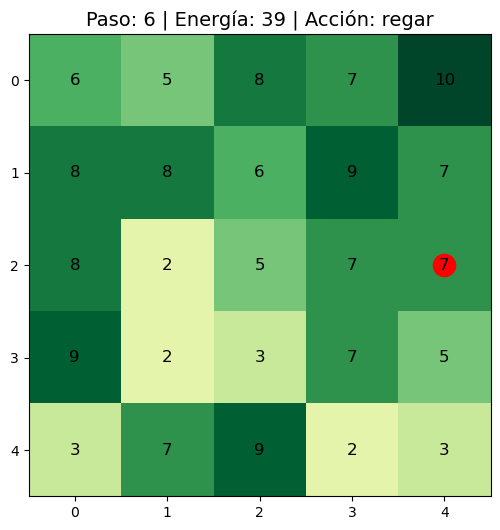

Paso 7 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 28.0


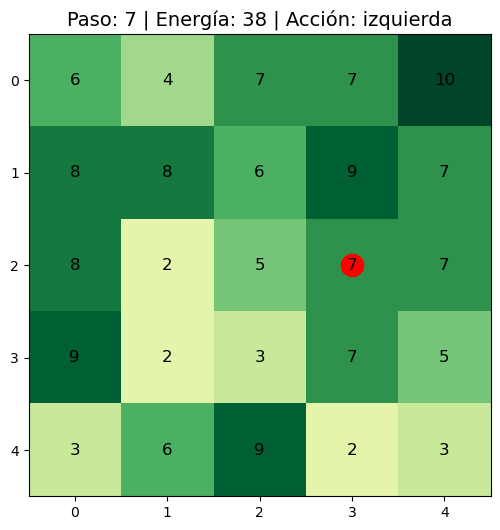

Paso 8 | Acción: abajo | Recompensa: -0.5 | Acumulado: 27.5


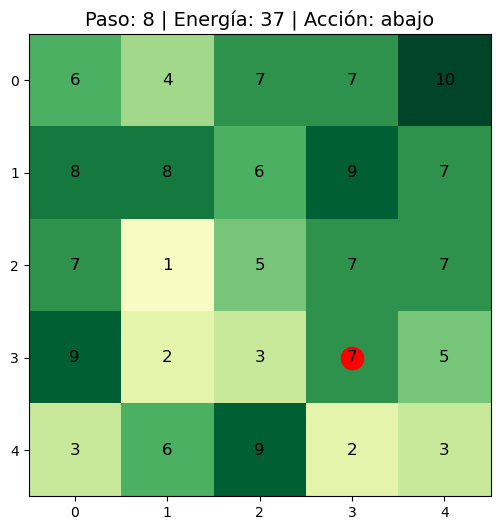

Paso 9 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 27.0


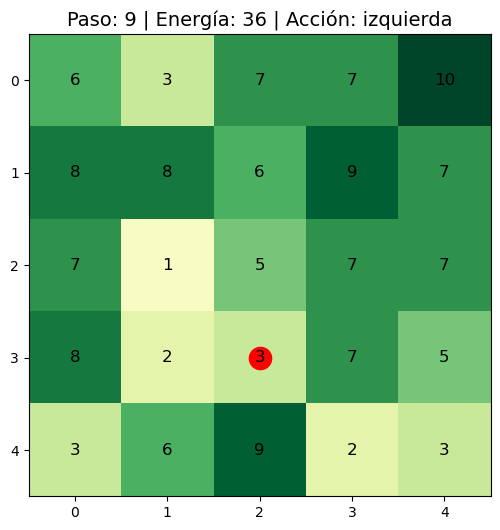

Paso 10 | Acción: regar | Recompensa: 10.0 | Acumulado: 37.0


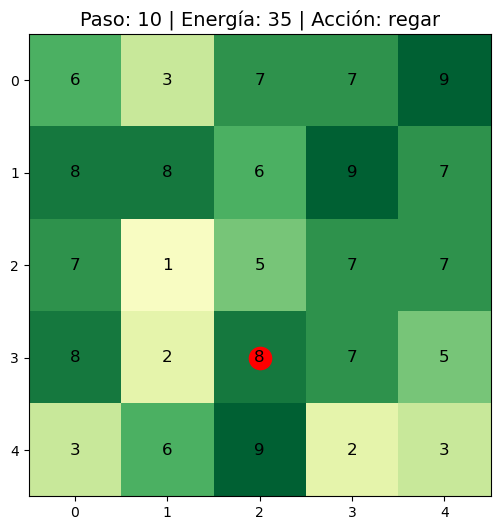

Paso 11 | Acción: arriba | Recompensa: -0.5 | Acumulado: 36.5


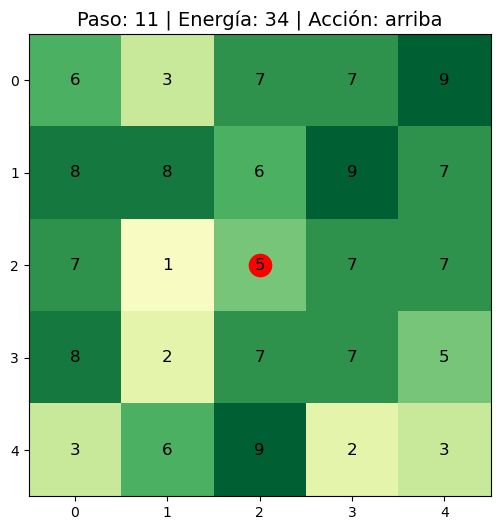

Paso 12 | Acción: regar | Recompensa: 10.0 | Acumulado: 46.5


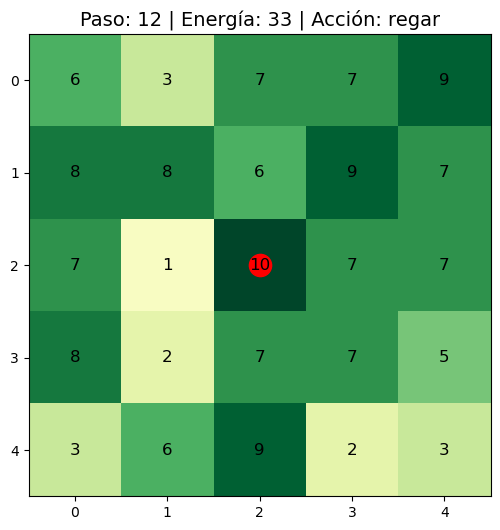

Paso 13 | Acción: arriba | Recompensa: -0.5 | Acumulado: 46.0


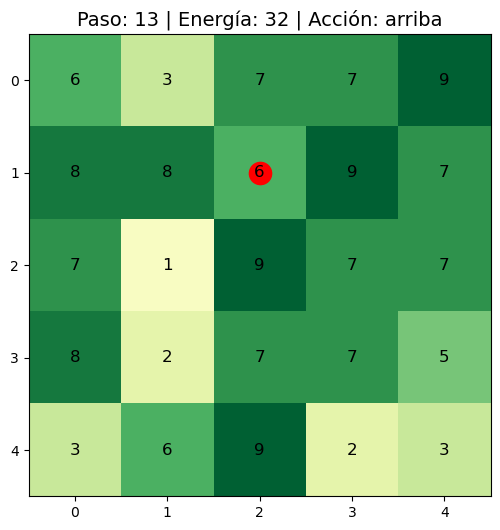

Paso 14 | Acción: regar | Recompensa: -1.0 | Acumulado: 45.0


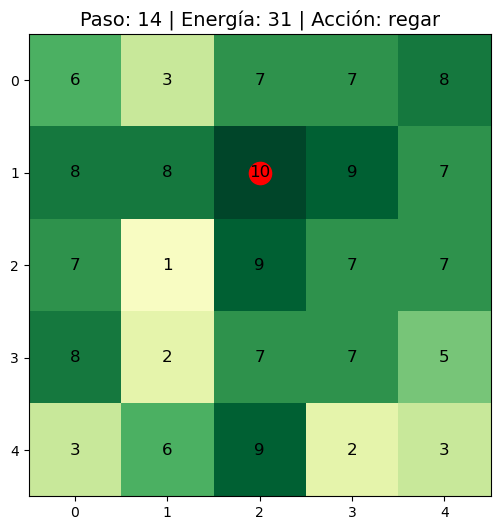

Paso 15 | Acción: arriba | Recompensa: -0.5 | Acumulado: 44.5


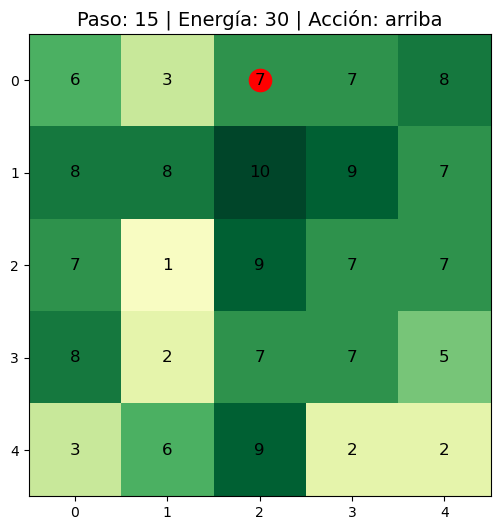

Paso 16 | Acción: derecha | Recompensa: -0.5 | Acumulado: 44.0


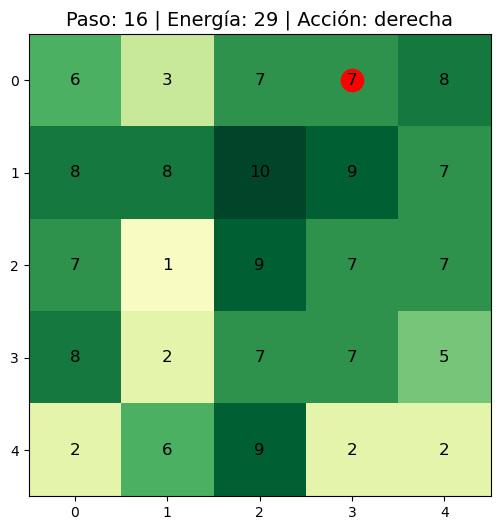

Paso 17 | Acción: derecha | Recompensa: -0.5 | Acumulado: 43.5


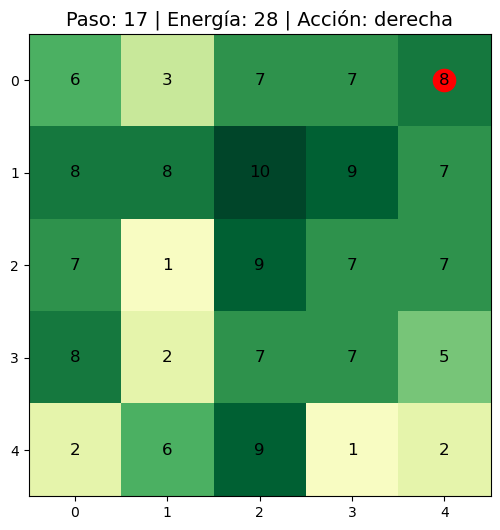

Paso 18 | Acción: abajo | Recompensa: -0.5 | Acumulado: 43.0


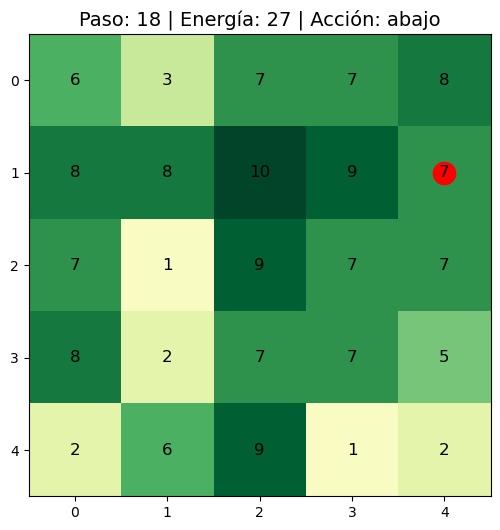

Paso 19 | Acción: abajo | Recompensa: -0.5 | Acumulado: 42.5


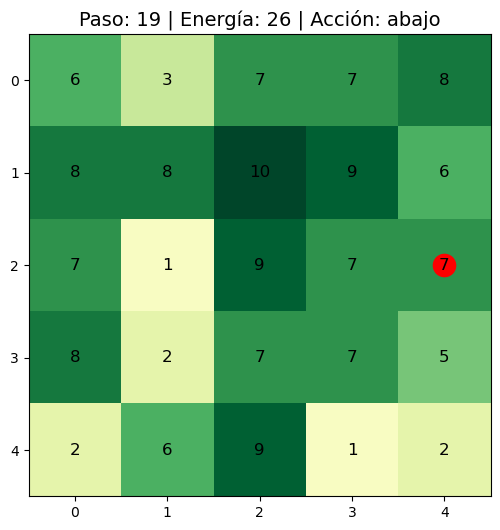

Paso 20 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 42.0


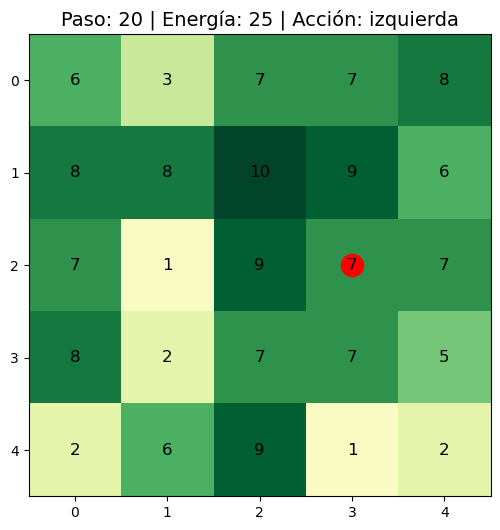

Paso 21 | Acción: abajo | Recompensa: -0.5 | Acumulado: 41.5


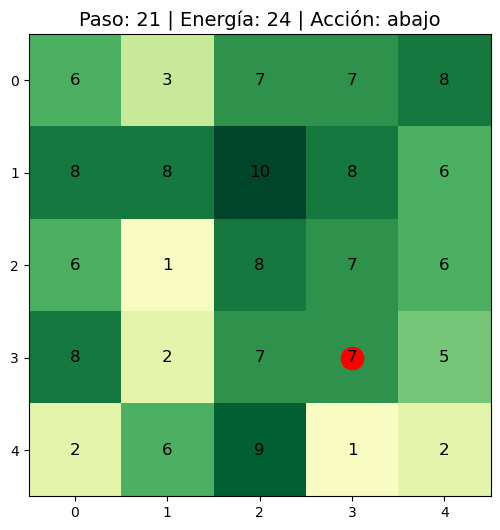

Paso 22 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 41.0


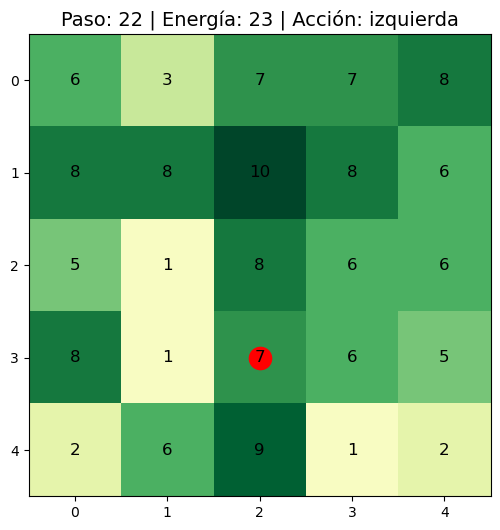

Paso 23 | Acción: arriba | Recompensa: -0.5 | Acumulado: 40.5


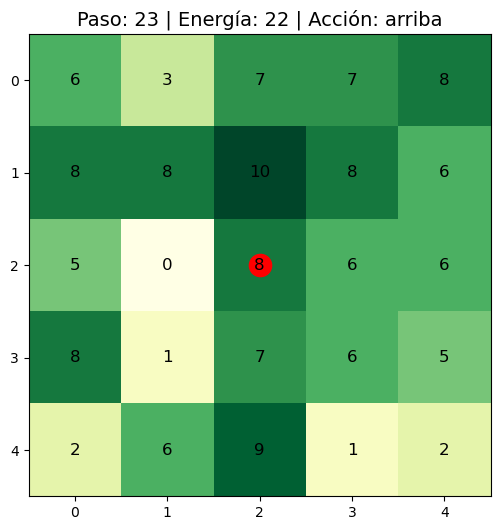

Paso 24 | Acción: arriba | Recompensa: -0.5 | Acumulado: 40.0


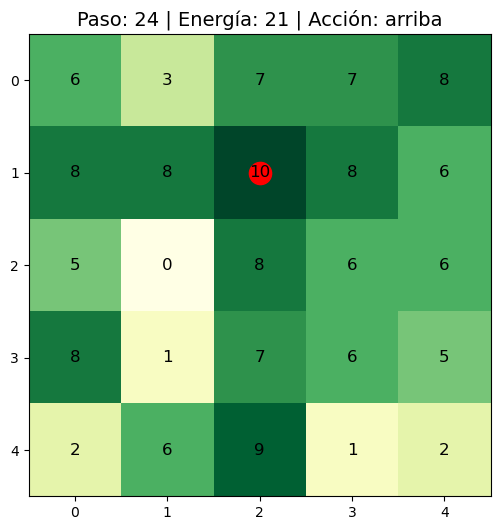

Paso 25 | Acción: arriba | Recompensa: -0.5 | Acumulado: 39.5


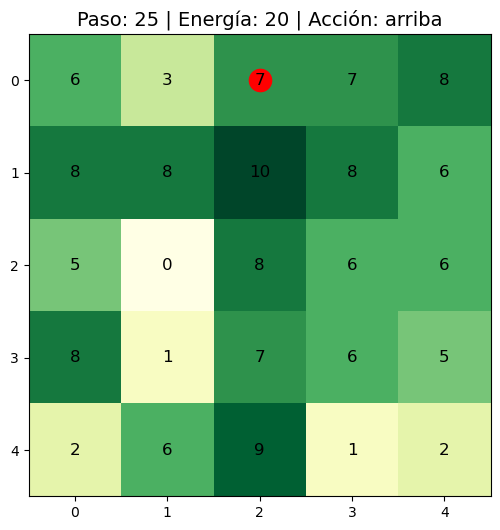

Paso 26 | Acción: derecha | Recompensa: -0.5 | Acumulado: 39.0


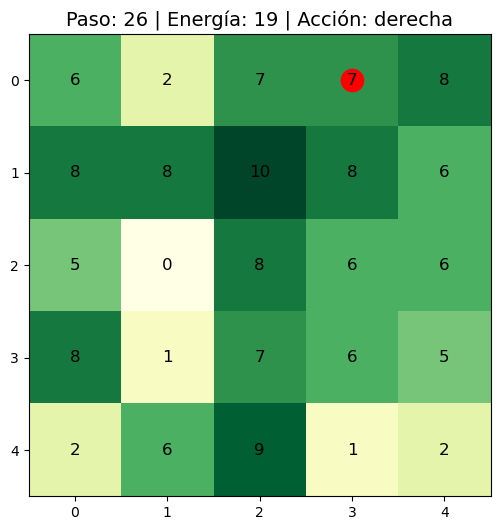

Paso 27 | Acción: derecha | Recompensa: -0.5 | Acumulado: 38.5


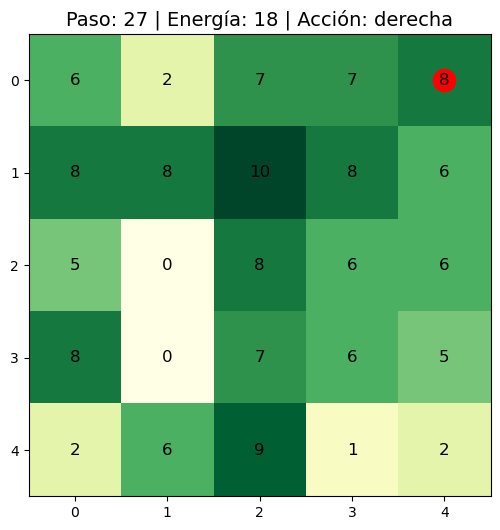

Paso 28 | Acción: abajo | Recompensa: -0.5 | Acumulado: 38.0


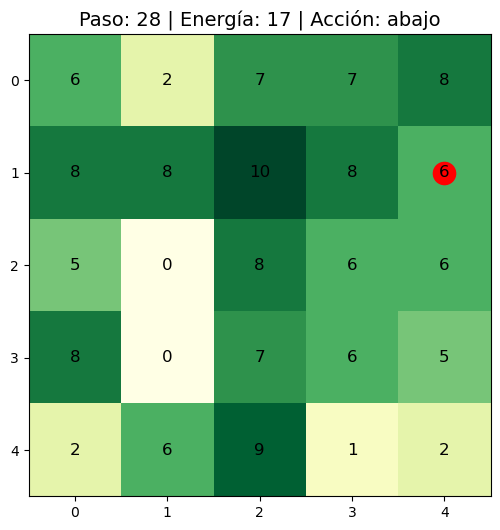

Paso 29 | Acción: regar | Recompensa: -1.0 | Acumulado: 37.0


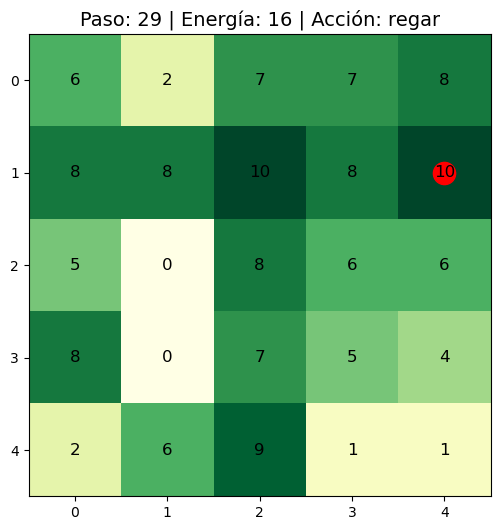

Paso 30 | Acción: abajo | Recompensa: -0.5 | Acumulado: 36.5


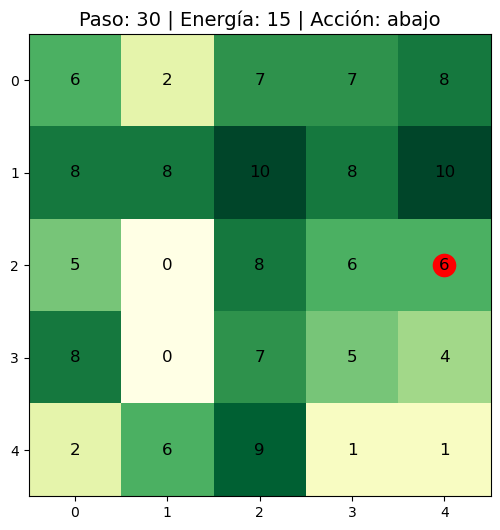

Paso 31 | Acción: regar | Recompensa: -1.0 | Acumulado: 35.5


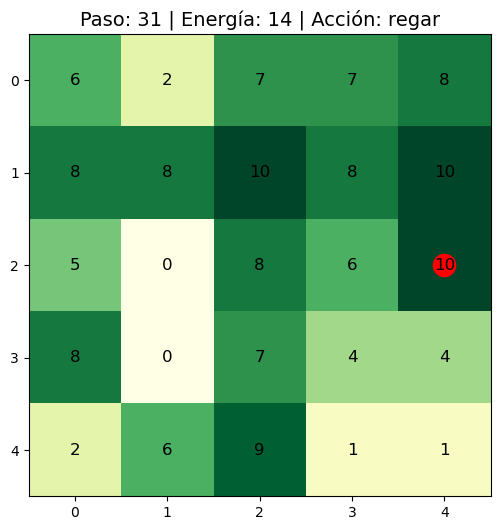

Paso 32 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 35.0


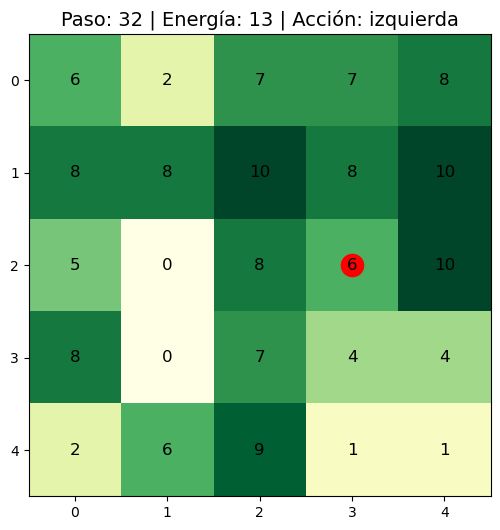

Paso 33 | Acción: regar | Recompensa: -1.0 | Acumulado: 34.0


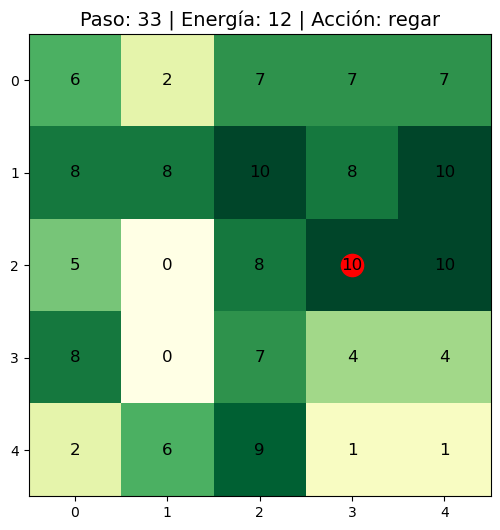

Paso 34 | Acción: abajo | Recompensa: -0.5 | Acumulado: 33.5


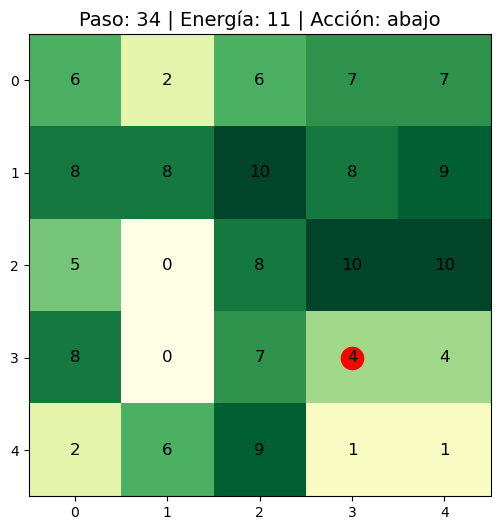

Paso 35 | Acción: regar | Recompensa: 10.0 | Acumulado: 43.5


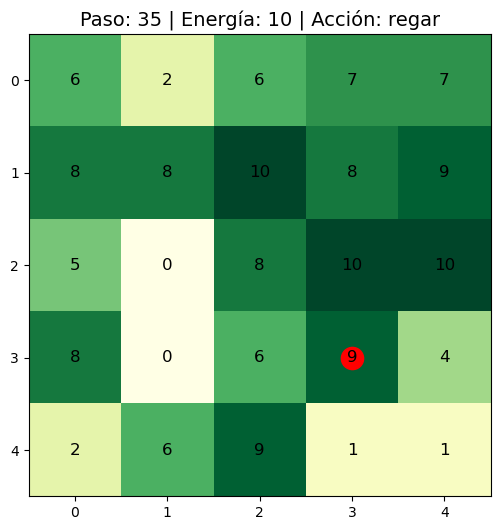

Paso 36 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 43.0


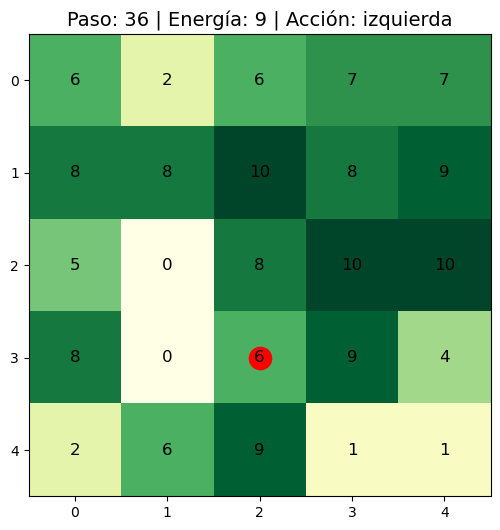

Paso 37 | Acción: regar | Recompensa: -1.0 | Acumulado: 42.0


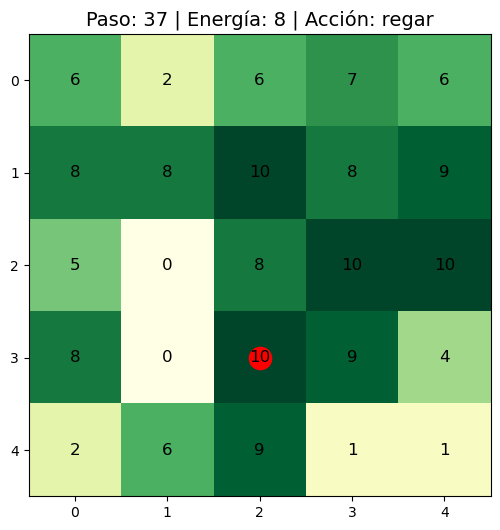

Paso 38 | Acción: arriba | Recompensa: -0.5 | Acumulado: 41.5


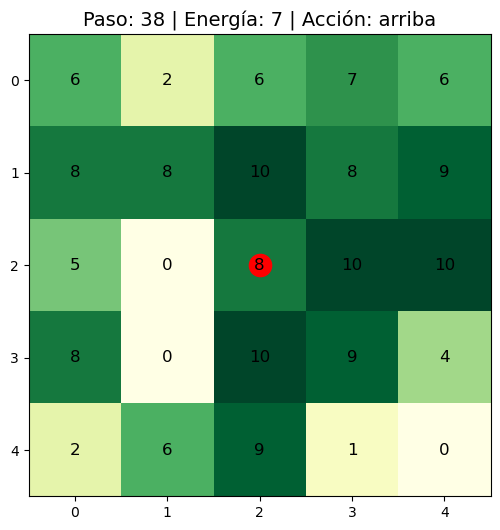

Paso 39 | Acción: arriba | Recompensa: -0.5 | Acumulado: 41.0


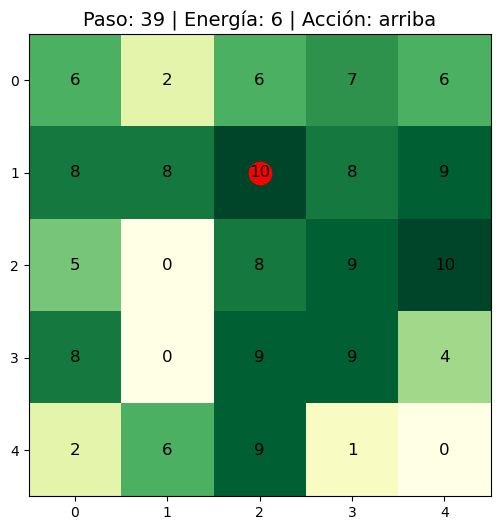

Paso 40 | Acción: arriba | Recompensa: -0.5 | Acumulado: 40.5


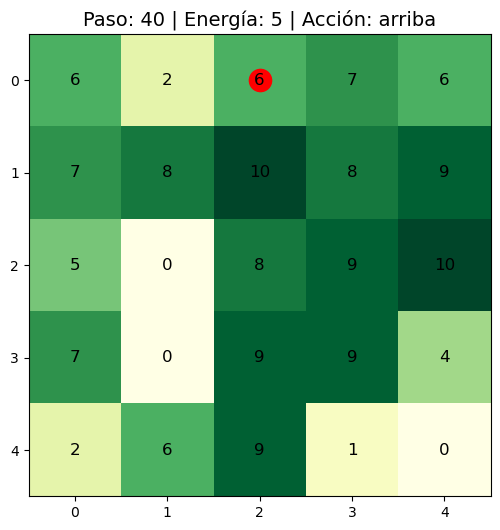

Paso 41 | Acción: regar | Recompensa: -1.0 | Acumulado: 39.5


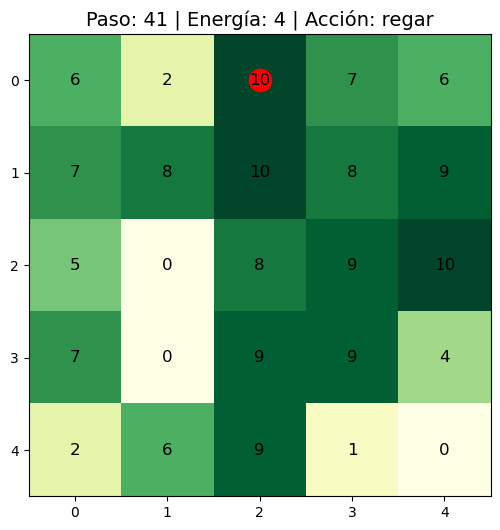

Paso 42 | Acción: derecha | Recompensa: -0.5 | Acumulado: 39.0


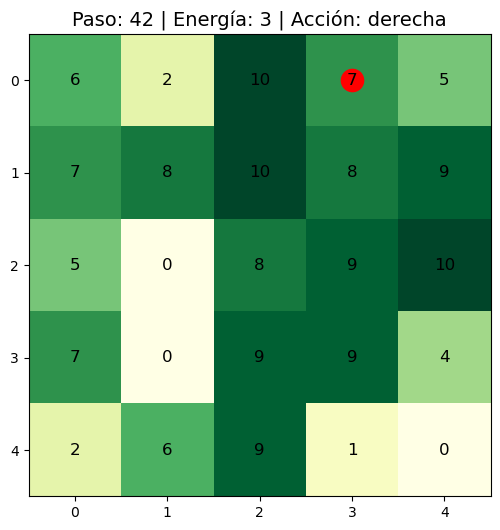

Paso 43 | Acción: derecha | Recompensa: -0.5 | Acumulado: 38.5


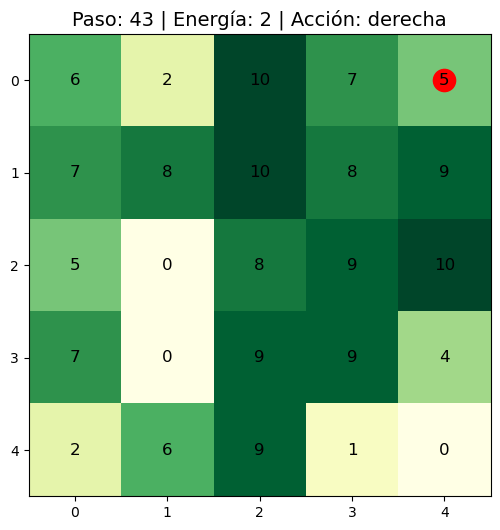

Paso 44 | Acción: regar | Recompensa: 10.0 | Acumulado: 48.5


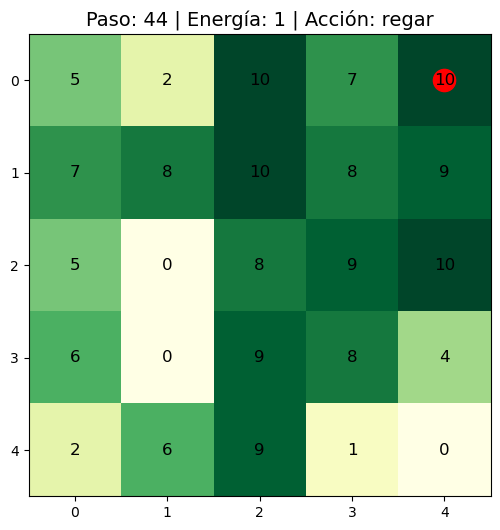

Paso 45 | Acción: abajo | Recompensa: -0.5 | Acumulado: 48.0


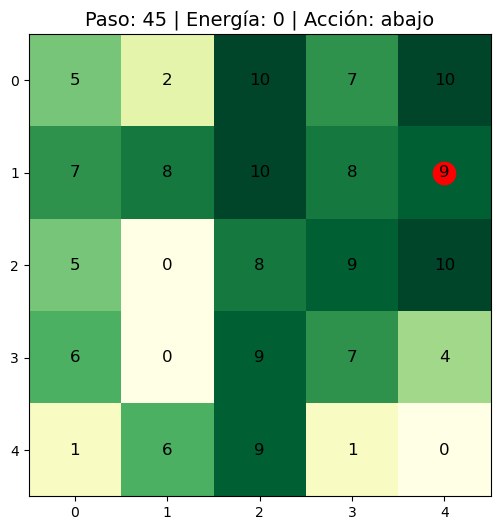


🏁 Fin del episodio 1 | Recompensa total: 48.0 | Energía: 0



In [9]:
episodios=1
# Entrenamiento visual
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla)) # Inicializamos de forma aleatoria la humedad de la grilla
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1)) #Ubicamos al robot en una posicion inicial aleatoria para empezar
    recompensa_total = 0
    paso = 0
    energia = energia_robot #Energia con la que arranca el robot

    # Mostrar el estado inicial (sin recompensas, sin acción)
    visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=None)
    print("\n🌱 Comienza el episodio...\n")

# --- Acá empieza el bucle de aprendizaje
    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        print(f"Paso {paso} | Acción: {acciones[accion_idx]} | Recompensa: {recompensa:.1f} | Acumulado: {recompensa_total:.1f}")
        visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=accion_idx)

        if energia <= 0 or np.all(humedad_grid <= 1):
          print(f"\n🏁 Fin del episodio {ep+1} | Recompensa total: {recompensa_total:.1f} | Energía: {energia}\n")
          break

Como podemos observar, el robot continua quedandose en un area de la grilla y no la recorre en su totalidad.
Esto consideramos que sucede porque el robot no tiene la visión de que hay plantas que se estan secando a su alrededor, solo tiene en cuenta su posición y el nivel de humedad de la planta actual. Esta información no le da suficiente contexto para saber si conviene moverse, ni hacia dónde.
Para atacar este problema, proponemos lo siguiente:
- Vamos a extender el estado incluyendo la cantidad de plantas secas en las celdas vecinas
- Agregar una bonificación temporal en la elección de acción para guiar al robot hacia zonas más secas

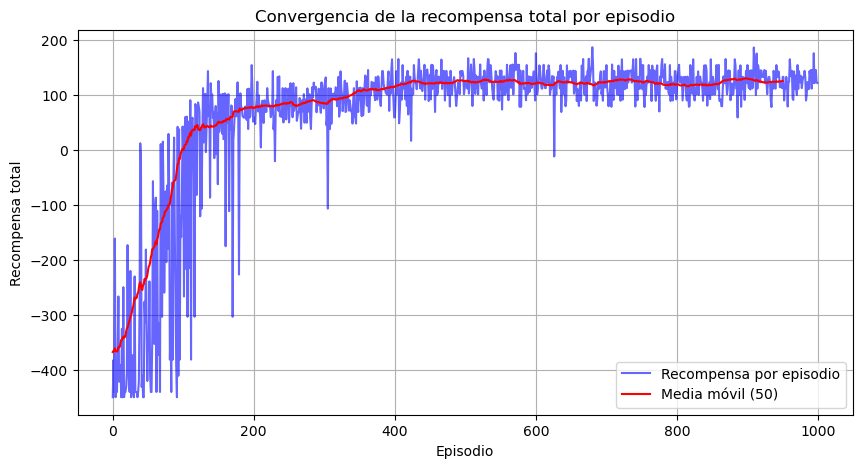

In [10]:
# Parámetros del entorno
tamaño_grilla = 5 #tamaño de la grilla de plantas
max_humedad = 10 #humedad maxima de la planta
min_humedad = 0 #humedad minima de la planta
acciones = ["arriba", "abajo", "izquierda", "derecha", "regar"] #acciones disponibles
prob_secado_plantas = 0.05 #porcentaje de las plantas que pierden humedad en cada paso
energia_robot=45 #energia del robot
Q = {}  # Tabla Q
aumento_por_regar=5 #aumento en la humedad de la planta por ser regada

# Parámetros de Q-learning
alpha = 0.01
gamma = 0.7
epsilon = 0.01
episodios = 1000

# Establecemos las recompensas
RECOMPENSA_POR_REGAR_A_TIEMPO = 10
CASTIGO_POR_REGAR_DE_MAS = -1
CASTIGO_POR_PLANTA_SECA = -10
CASTIGO_POR_MOVERSE = -0.5

# Función para secar plantas parcialmente
def secar_plantas(humedad_grid, probabilidad=0.10):
    for i in range(tamaño_grilla):
        for j in range(tamaño_grilla):
            if np.random.rand() < probabilidad:
                humedad_grid[i][j] = max(humedad_grid[i][j] - 1, min_humedad)
    return humedad_grid

def obtener_estado(robot_pos, humedad_grid):
    h = humedad_grid[robot_pos[0]][robot_pos[1]]
    if h >= 7:
        h_level = "alta"
    elif h >= 4:
        h_level = "media"
    else:
        h_level = "baja"

    #Contador de plantas secas alrededor de la planta
    secas_alrededor = 0
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = robot_pos[0] + dx, robot_pos[1] + dy
        if 0 <= nx < tamaño_grilla and 0 <= ny < tamaño_grilla:
            if humedad_grid[nx][ny] <= 3:
                secas_alrededor += 1

    return (robot_pos[0], robot_pos[1], h_level, secas_alrededor)

def elegir_accion(estado, robot_pos, humedad_grid):
    if estado not in Q:
        Q[estado] = np.zeros(len(acciones))

    if random.random() < epsilon:
        return random.randint(0, len(acciones) - 1)

    direcciones = {
        "arriba": (-1, 0), #sube una fila → fila - 1
        "abajo": (1, 0), #baja una fila → fila + 1
        "izquierda": (0, -1), #se mueve a la izquierda → columna - 1
        "derecha": (0, 1) #se mueve a la derecha → columna + 1
    }

    bonificacion = np.zeros(len(acciones))
    for i, accion in enumerate(acciones):
        if accion in direcciones: #para cada acción de movimiento, calcula a qué casillero se movería.
            dx, dy = direcciones[accion]
            nx, ny = robot_pos[0] + dx, robot_pos[1] + dy
            if 0 <= nx < tamaño_grilla and 0 <= ny < tamaño_grilla:
                if humedad_grid[nx][ny] <= 3:
                    bonificacion[i] += 2 #Si la posicion está dentro de la grilla y la planta que está ahí tiene humedad baja, le suma una bonificación de 2 a esa acción

    valores_q = Q[estado] + bonificacion
    return int(np.argmax(valores_q))

# Actualizar Q
def actualizar_q(estado, accion, recompensa, sig_estado):
    if estado not in Q:
        Q[estado] = np.zeros(len(acciones))
    if sig_estado not in Q:
        Q[sig_estado] = np.zeros(len(acciones))
    Q[estado][accion] += alpha * (recompensa + gamma * np.max(Q[sig_estado]) - Q[estado][accion])

# Paso del entorno
def step(robot_pos, humedad_grid, accion_idx):
    accion = acciones[accion_idx]
    nueva_pos = list(robot_pos)
    recompensa = 0

    h_actual = humedad_grid[robot_pos[0]][robot_pos[1]]  # Humedad de la planta actual

    if accion == "arriba":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[0] = max(0, robot_pos[0] - 1)


    elif accion == "abajo":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[0] = min(tamaño_grilla - 1, robot_pos[0] + 1)

    elif accion == "izquierda":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[1] = max(0, robot_pos[1] - 1)

    elif accion == "derecha":
        if h_actual <= 3:
            recompensa += CASTIGO_POR_PLANTA_SECA
        else:
          recompensa += CASTIGO_POR_MOVERSE
        nueva_pos[1] = min(tamaño_grilla - 1, robot_pos[1] + 1)

    elif accion == "regar":
        if h_actual + aumento_por_regar <= max_humedad:
            humedad_grid[robot_pos[0]][robot_pos[1]] += aumento_por_regar
            recompensa += RECOMPENSA_POR_REGAR_A_TIEMPO
        else:
            humedad_grid[robot_pos[0]][robot_pos[1]] = max_humedad
            recompensa += CASTIGO_POR_REGAR_DE_MAS


    return tuple(nueva_pos), humedad_grid, recompensa


# Lista para almacenar recompensas de cada episodio
recompensas_por_episodio = []

# Entrenamiento
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla))
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1))
    recompensa_total = 0
    paso = 0
    energia = energia_robot

    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado, robot_pos, humedad_grid)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        if energia <= 0 or np.all(humedad_grid <= 1):
            break

    recompensas_por_episodio.append(recompensa_total)

# Gráfico de convergencia
plt.figure(figsize=(10, 5))
plt.plot(recompensas_por_episodio, color='blue', alpha=0.6, label='Recompensa por episodio')
plt.plot(np.convolve(recompensas_por_episodio, np.ones(50)/50, mode='valid'), color='red', label='Media móvil (50)')
plt.title('Convergencia de la recompensa total por episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
def mostrar_tabla_q_resumida():
    filas = []

    for estado, valores_q in Q.items():
        fila, columna, humedad, secas_alrededor = estado  # Desempaquetar nuevo estado
        q_max = np.max(valores_q)  # Valor máximo de Q
        acciones_estado = []

        for i, valor in enumerate(valores_q):
            accion = acciones[i]
            if valor == q_max:
                accion_str = f"<b>{accion} ({valor:.2f})</b>"
            else:
                accion_str = f"{accion} ({valor:.2f})"
            acciones_estado.append(accion_str)

        filas.append({
            "Fila": fila,
            "Columna": columna,
            "Humedad": humedad,
            "Plantas secas vecinas": secas_alrededor,
            "Acciones (Q-values)": "<br>".join(acciones_estado)
        })

    df = pd.DataFrame(filas)
    df.sort_values(by=["Fila", "Columna", "Humedad", "Plantas secas vecinas"], inplace=True)

    display(HTML("<h3> Tabla Q - Resumen por estado </h3>"))
    display(HTML(df.to_html(escape=False, index=False)))

mostrar_tabla_q_resumida()

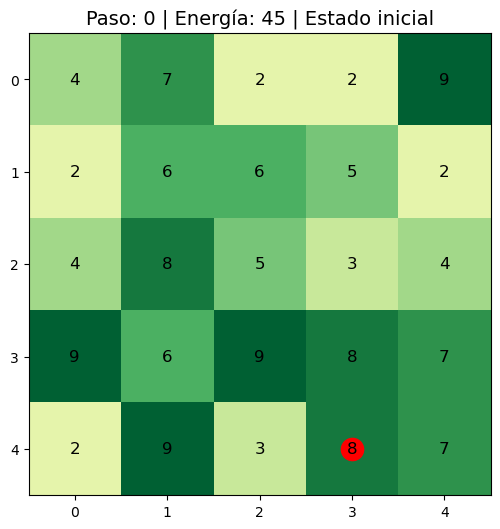


🌱 Comienza el episodio...

Paso 1 | Acción: izquierda | Recompensa: -0.5 | Acumulado: -0.5


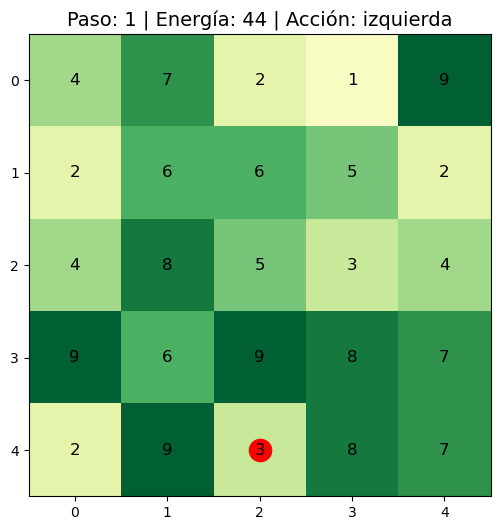

Paso 2 | Acción: regar | Recompensa: 10.0 | Acumulado: 9.5


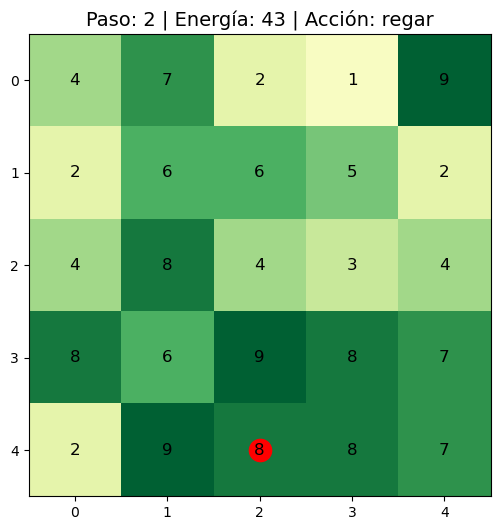

Paso 3 | Acción: derecha | Recompensa: -0.5 | Acumulado: 9.0


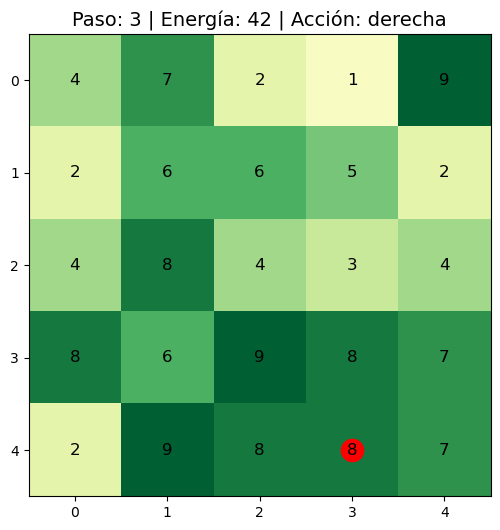

Paso 4 | Acción: derecha | Recompensa: -0.5 | Acumulado: 8.5


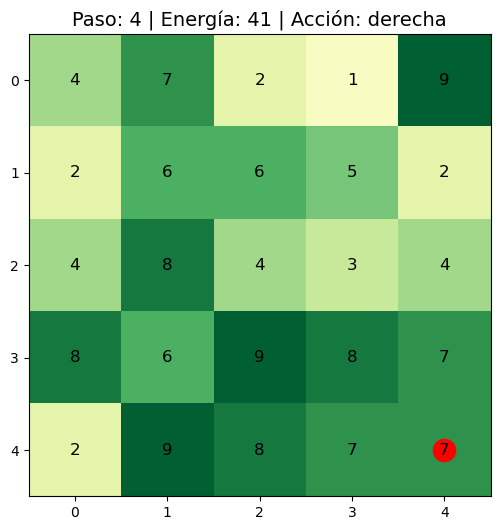

Paso 5 | Acción: arriba | Recompensa: -0.5 | Acumulado: 8.0


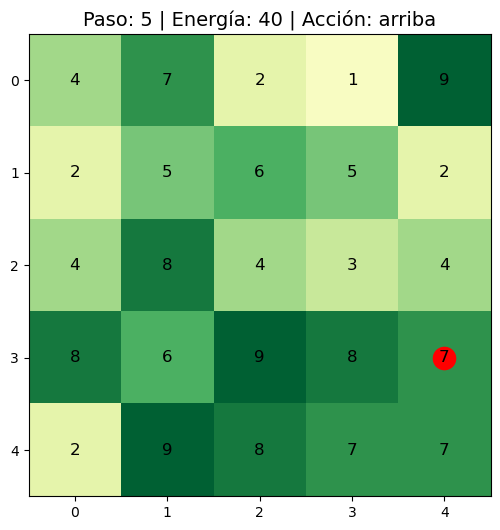

Paso 6 | Acción: arriba | Recompensa: -0.5 | Acumulado: 7.5


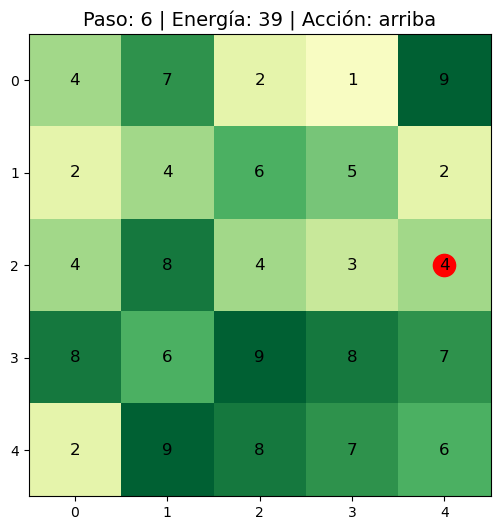

Paso 7 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 7.0


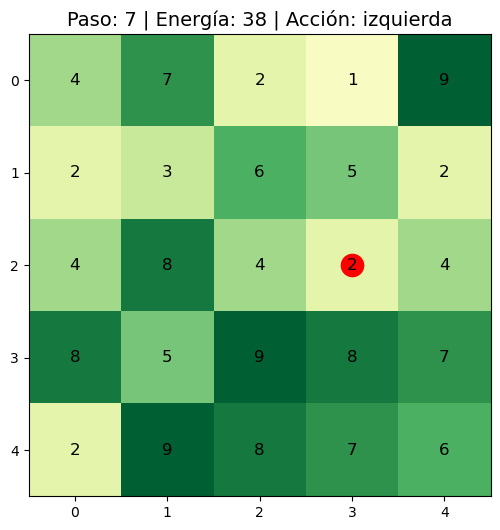

Paso 8 | Acción: regar | Recompensa: 10.0 | Acumulado: 17.0


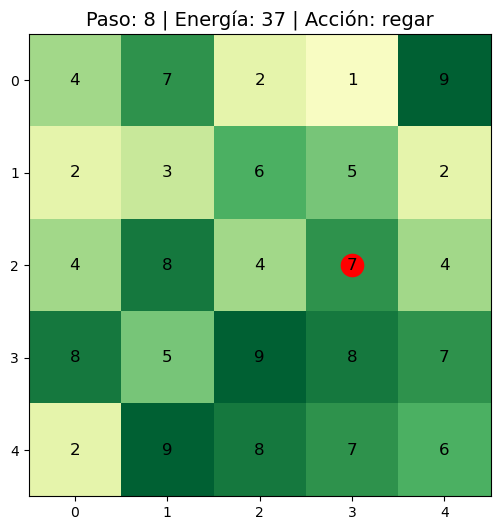

Paso 9 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 16.5


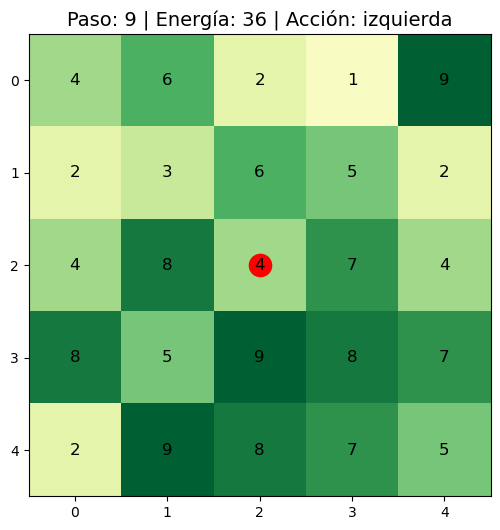

Paso 10 | Acción: regar | Recompensa: 10.0 | Acumulado: 26.5


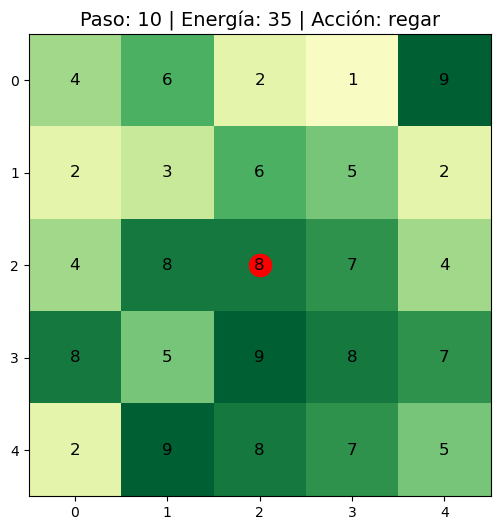

Paso 11 | Acción: arriba | Recompensa: -0.5 | Acumulado: 26.0


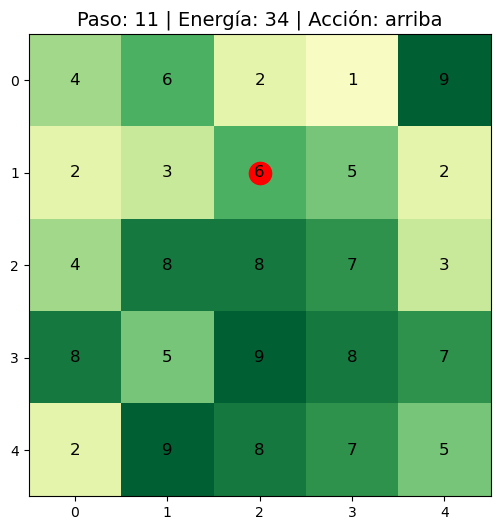

Paso 12 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 25.5


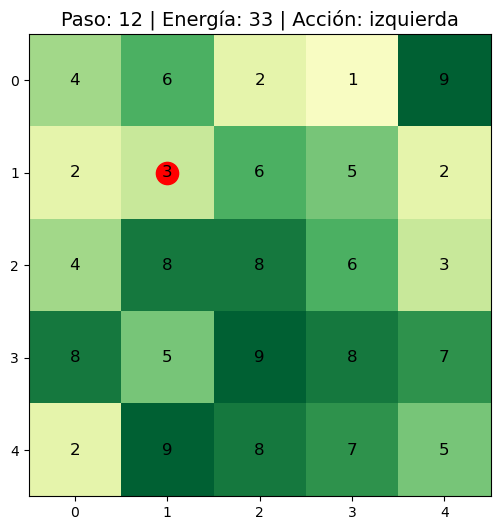

Paso 13 | Acción: regar | Recompensa: 10.0 | Acumulado: 35.5


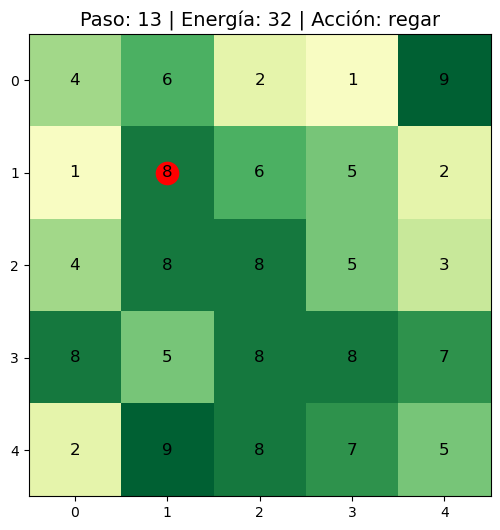

Paso 14 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 35.0


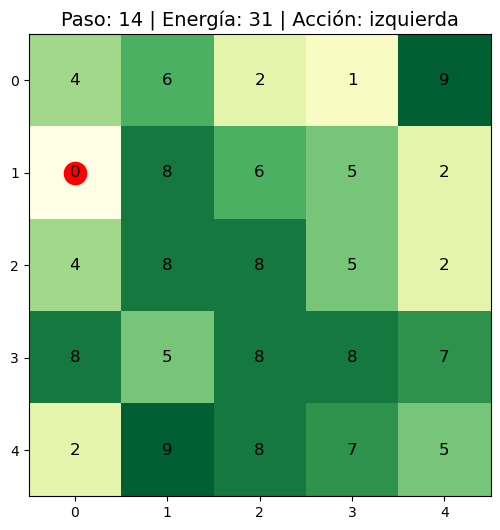

Paso 15 | Acción: regar | Recompensa: 10.0 | Acumulado: 45.0


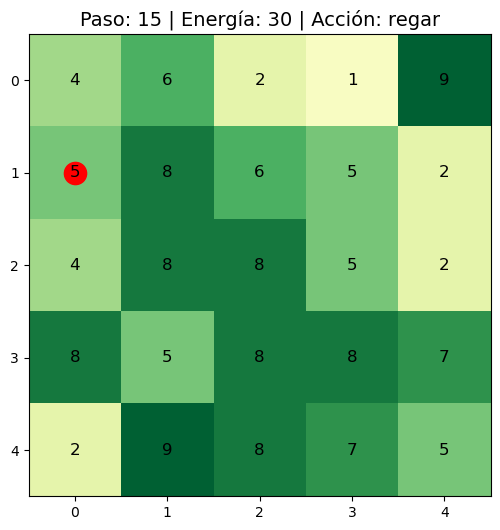

Paso 16 | Acción: regar | Recompensa: 10.0 | Acumulado: 55.0


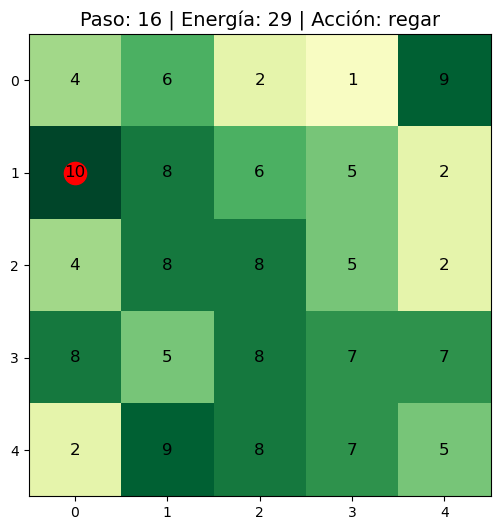

Paso 17 | Acción: derecha | Recompensa: -0.5 | Acumulado: 54.5


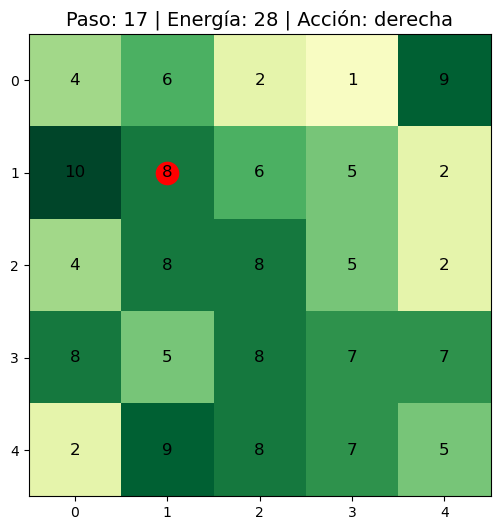

Paso 18 | Acción: abajo | Recompensa: -0.5 | Acumulado: 54.0


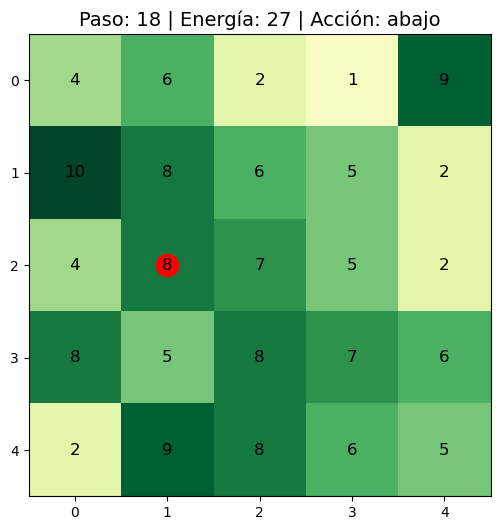

Paso 19 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 53.5


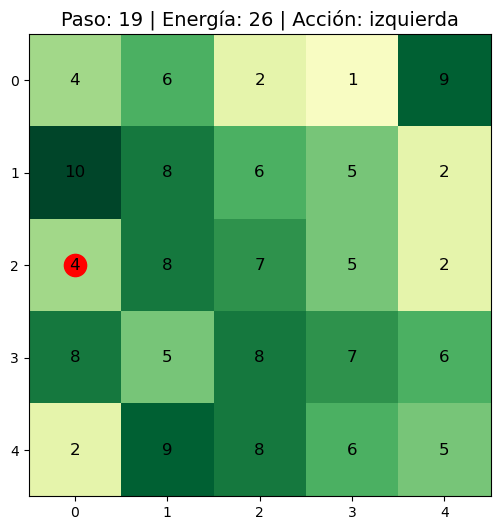

Paso 20 | Acción: regar | Recompensa: 10.0 | Acumulado: 63.5


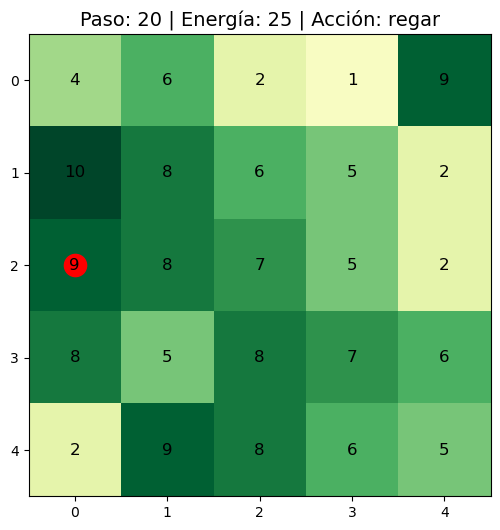

Paso 21 | Acción: abajo | Recompensa: -0.5 | Acumulado: 63.0


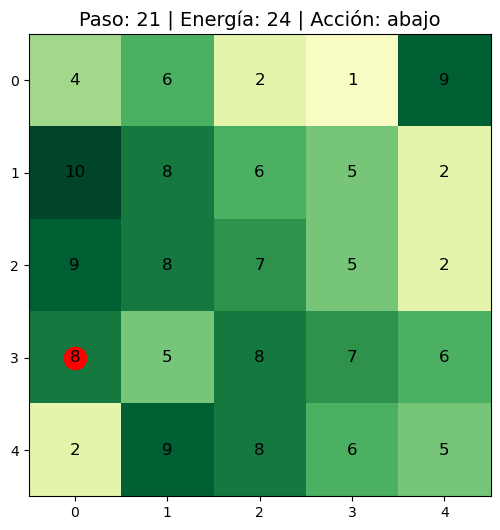

Paso 22 | Acción: abajo | Recompensa: -0.5 | Acumulado: 62.5


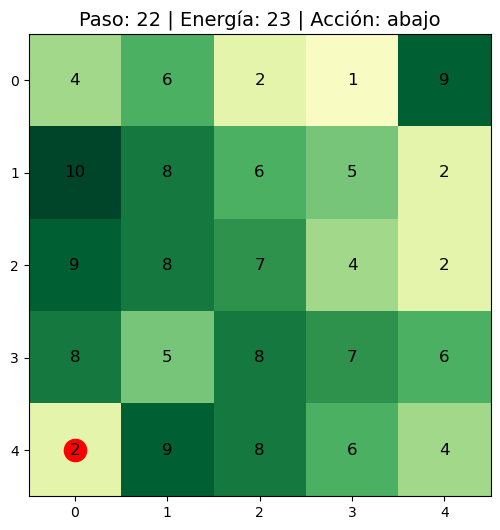

Paso 23 | Acción: regar | Recompensa: 10.0 | Acumulado: 72.5


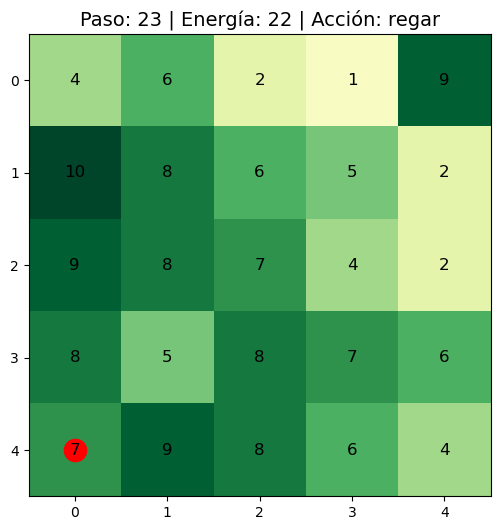

Paso 24 | Acción: derecha | Recompensa: -0.5 | Acumulado: 72.0


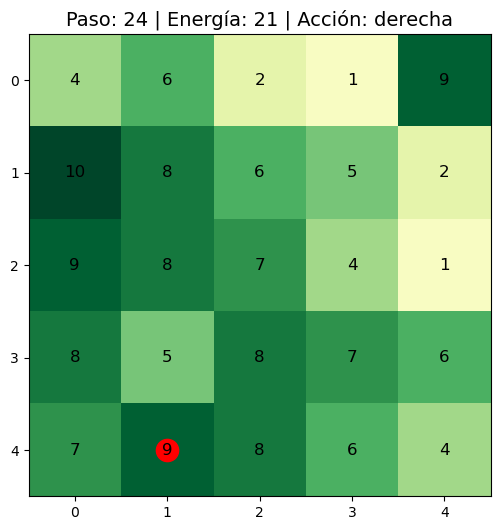

Paso 25 | Acción: arriba | Recompensa: -0.5 | Acumulado: 71.5


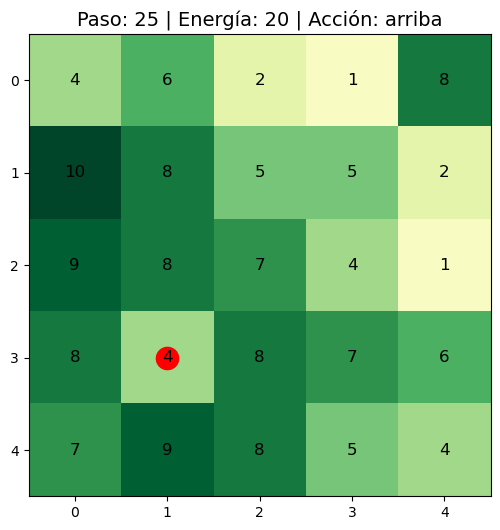

Paso 26 | Acción: regar | Recompensa: 10.0 | Acumulado: 81.5


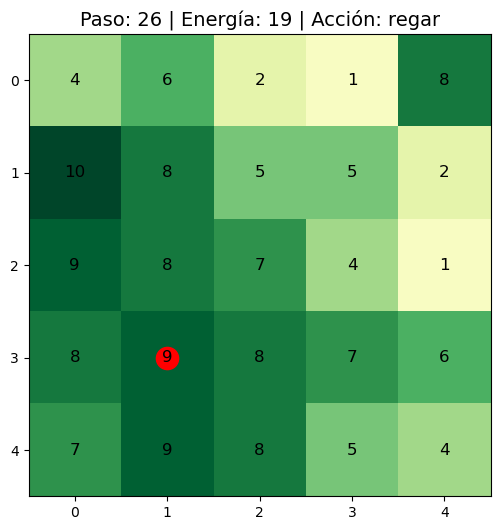

Paso 27 | Acción: derecha | Recompensa: -0.5 | Acumulado: 81.0


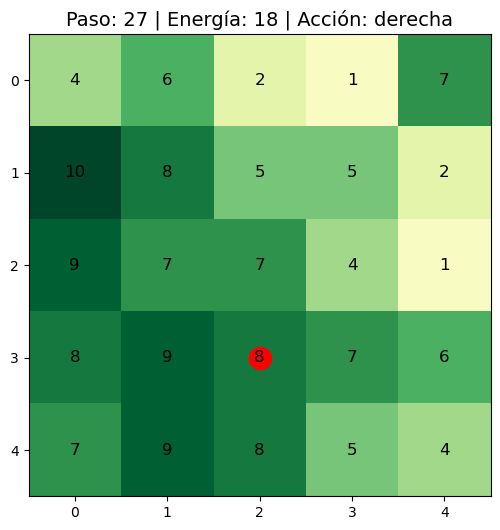

Paso 28 | Acción: derecha | Recompensa: -0.5 | Acumulado: 80.5


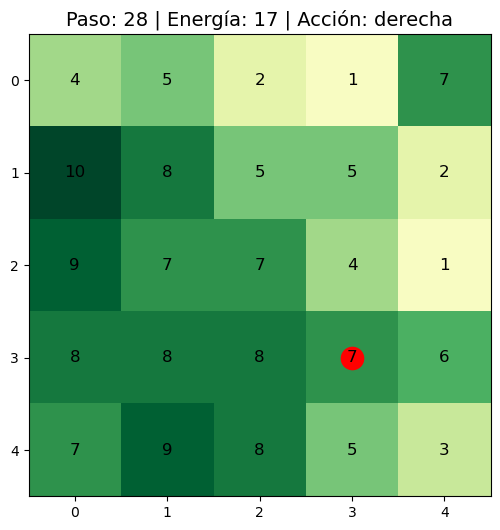

Paso 29 | Acción: derecha | Recompensa: -0.5 | Acumulado: 80.0


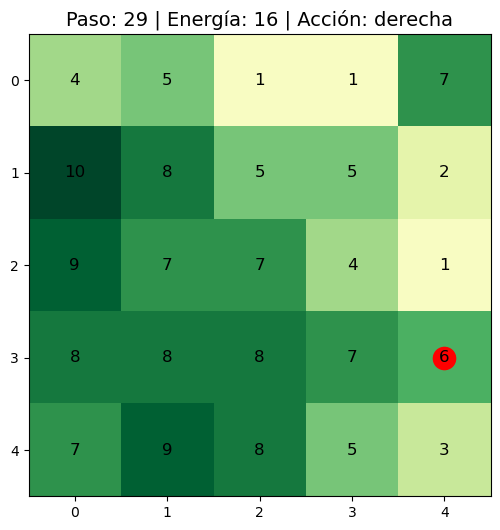

Paso 30 | Acción: abajo | Recompensa: -0.5 | Acumulado: 79.5


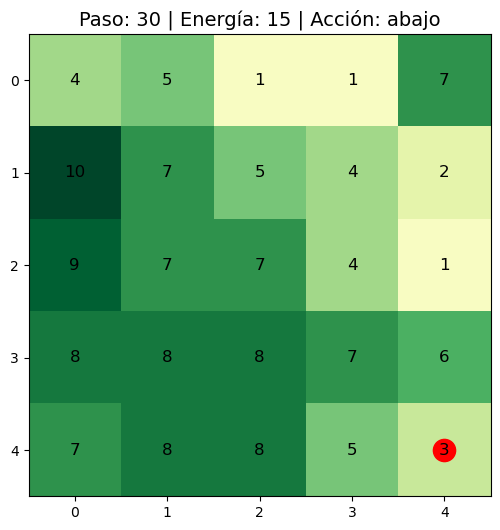

Paso 31 | Acción: regar | Recompensa: 10.0 | Acumulado: 89.5


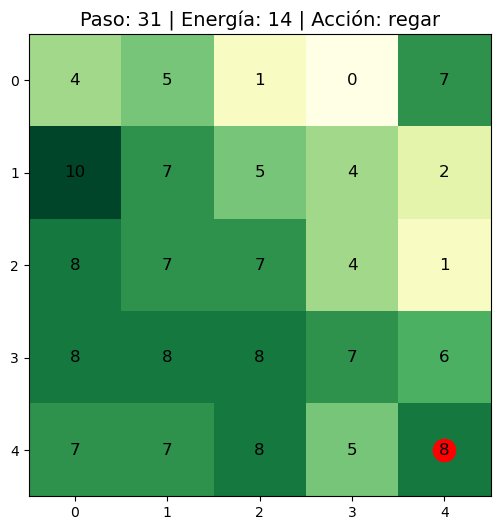

Paso 32 | Acción: arriba | Recompensa: -0.5 | Acumulado: 89.0


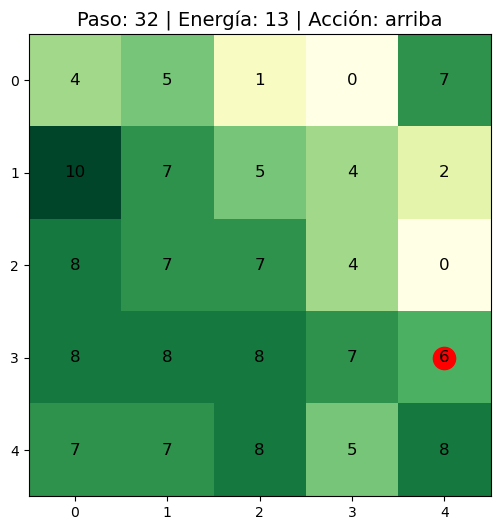

Paso 33 | Acción: arriba | Recompensa: -0.5 | Acumulado: 88.5


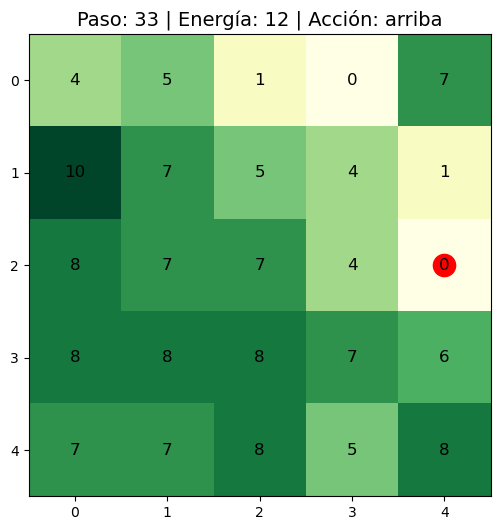

Paso 34 | Acción: regar | Recompensa: 10.0 | Acumulado: 98.5


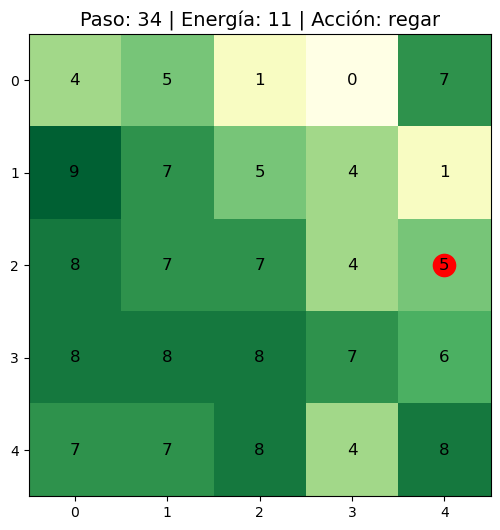

Paso 35 | Acción: arriba | Recompensa: -0.5 | Acumulado: 98.0


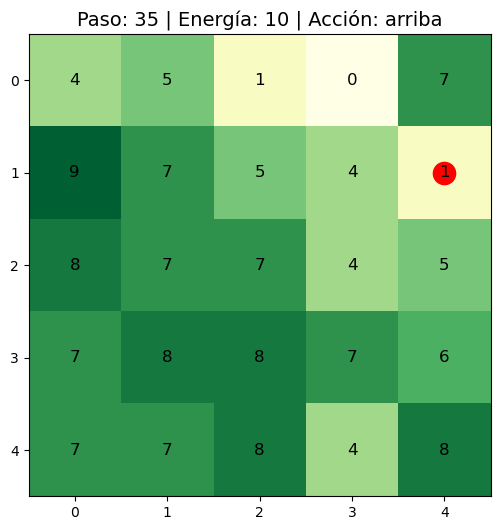

Paso 36 | Acción: regar | Recompensa: 10.0 | Acumulado: 108.0


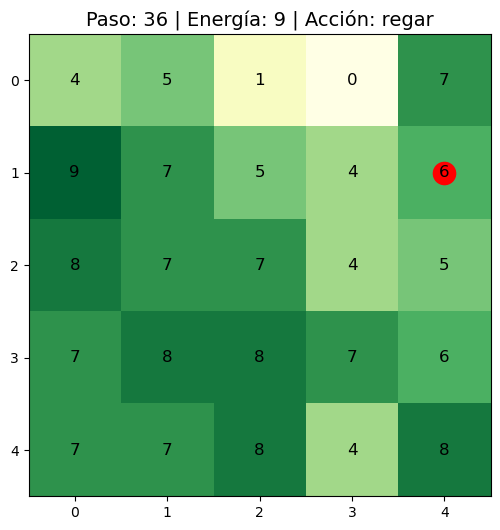

Paso 37 | Acción: regar | Recompensa: -1.0 | Acumulado: 107.0


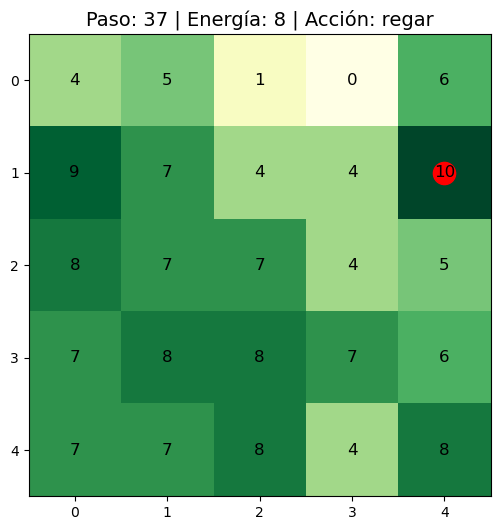

Paso 38 | Acción: arriba | Recompensa: -0.5 | Acumulado: 106.5


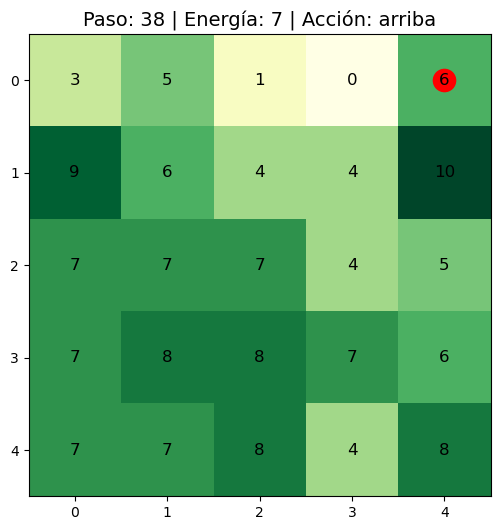

Paso 39 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 106.0


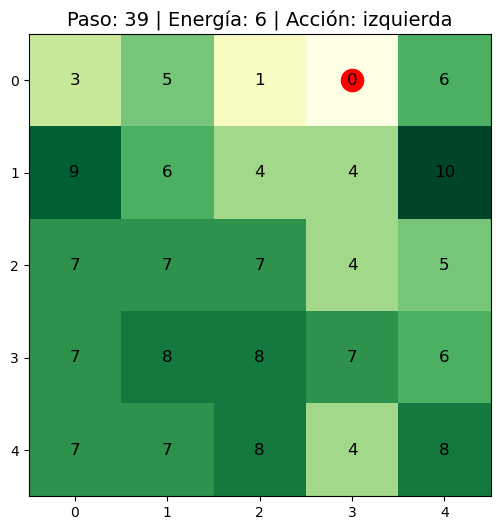

Paso 40 | Acción: regar | Recompensa: 10.0 | Acumulado: 116.0


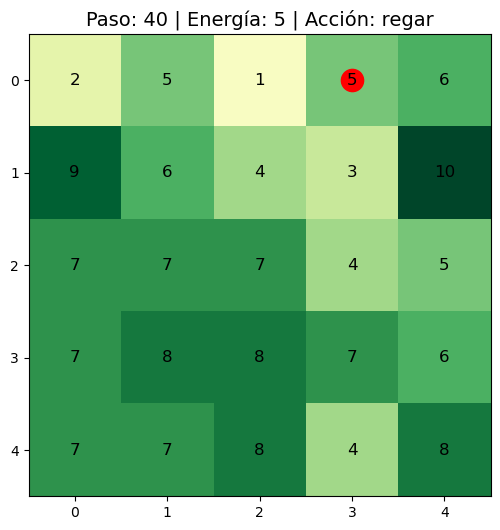

Paso 41 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 115.5


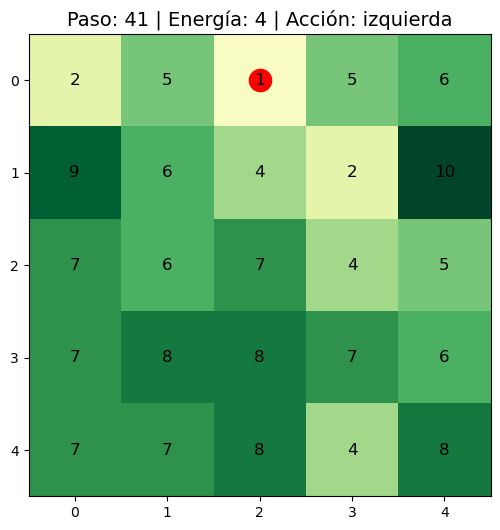

Paso 42 | Acción: regar | Recompensa: 10.0 | Acumulado: 125.5


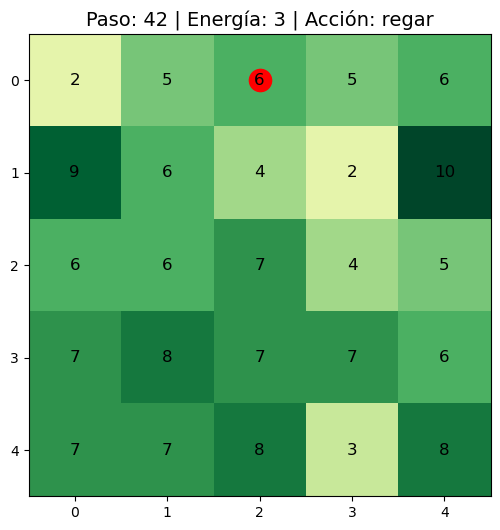

Paso 43 | Acción: regar | Recompensa: -1.0 | Acumulado: 124.5


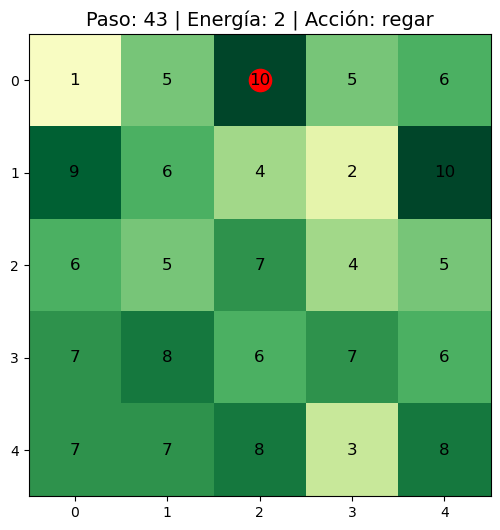

Paso 44 | Acción: abajo | Recompensa: -0.5 | Acumulado: 124.0


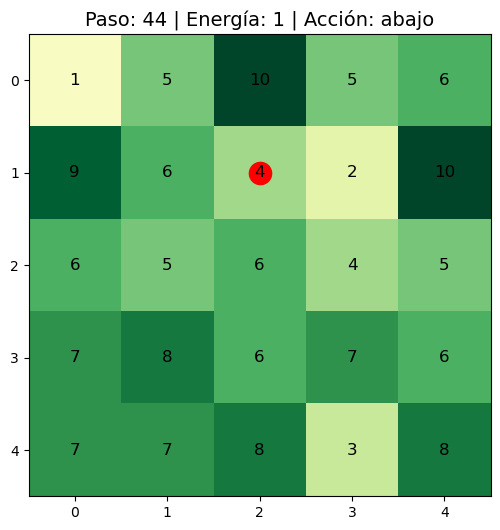

Paso 45 | Acción: derecha | Recompensa: -0.5 | Acumulado: 123.5


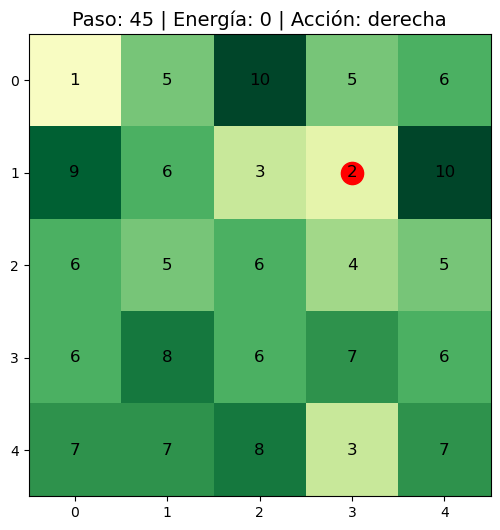


🏁 Fin del episodio 1 | Recompensa total: 123.5 | Energía: 0



In [12]:
episodios=1
# Entrenamiento visual
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla)) # Inicializamos de forma aleatoria la humedad de la grilla
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1)) #Ubicamos al robot en una posicion inicial aleatoria para empezar
    recompensa_total = 0
    paso = 0
    energia = energia_robot #Energia con la que arranca el robot

    # Mostrar el estado inicial (sin recompensas, sin acción)
    visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=None)
    print("\n🌱 Comienza el episodio...\n")

# --- Acá empieza el bucle de aprendizaje
    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado, robot_pos, humedad_grid)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        print(f"Paso {paso} | Acción: {acciones[accion_idx]} | Recompensa: {recompensa:.1f} | Acumulado: {recompensa_total:.1f}")
        visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=accion_idx)

        if energia <= 0 or np.all(humedad_grid <= 1):
          print(f"\n🏁 Fin del episodio {ep+1} | Recompensa total: {recompensa_total:.1f} | Energía: {energia}\n")
          break

Conclusión:
Los cambios implementados en el algoritmo de Q-learning han mejorado el comportamiento del robot. El ajuste de las recompensas y penalizaciones, junto con la prioridad de regar las plantas secas, ha permitido que el robot aprenda a regar de manera eficiente. Aunque no se han obtenido resultados perfectos, el modelo ha demostrado una mejora considerable en su rendimiento, con una convergencia clara en la recompensa total por episodio.

Sin embargo, propusimos una idea más, en búsqueda de mejorar la performance del robot:
- Forzar al robot a que riegue, siempre que la humedad sea menor a 5.
- Penalizar al robot si intenta salirse de la grilla de plantas.

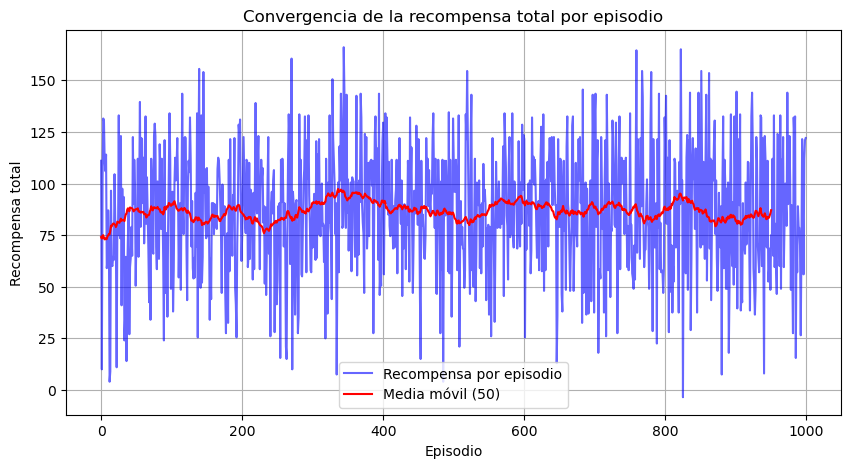

In [22]:
# Parámetros del entorno
tamaño_grilla = 5 #tamaño de la grilla de plantas
max_humedad = 10 #humedad maxima de la planta
min_humedad = 0 #humedad minima de la planta
acciones = ["arriba", "abajo", "izquierda", "derecha", "regar"] #acciones disponibles
prob_secado_plantas = 0.05 #porcentaje de las plantas que pierden humedad en cada paso
energia_robot=45 #energia del robot
Q = {}  # Tabla Q
aumento_por_regar=5 #aumento en la humedad de la planta por ser regada

# Parámetros de Q-learning
alpha = 0.01
gamma = 0.7
epsilon = 0.01
episodios = 1000

# Establecemos las recompensas
RECOMPENSA_POR_REGAR_A_TIEMPO = 10
CASTIGO_POR_REGAR_DE_MAS = -1
CASTIGO_POR_PLANTA_SECA = -10
CASTIGO_POR_MOVERSE = -0.5

# Función para secar plantas parcialmente
def secar_plantas(humedad_grid, probabilidad=0.10):
    for i in range(tamaño_grilla):
        for j in range(tamaño_grilla):
            if np.random.rand() < probabilidad:
                humedad_grid[i][j] = max(humedad_grid[i][j] - 1, min_humedad)
    return humedad_grid

def planta_seca_cercana(robot_pos, humedad_grid):
    # Funcion para encontrar la planta con humedad debajo de 4 más cercana.
    min_distancia = float('inf')
    planta_seca = None
    for i in range(tamaño_grilla):
        for j in range(tamaño_grilla):
            if humedad_grid[i][j] < 4:  # Si la planta está por debajo del umbral de humedad
                distancia = abs(robot_pos[0] - i) + abs(robot_pos[1] - j)
                if distancia < min_distancia:
                    min_distancia = distancia
                    planta_seca = (i, j)
    return planta_seca, min_distancia

def obtener_estado(robot_pos, humedad_grid):
    h = humedad_grid[robot_pos[0]][robot_pos[1]]
    if h >= 7:
        h_level = "alta"
    elif h >= 4:
        h_level = "media"
    else:
        h_level = "baja"

    planta_seca, distancia_seca = planta_seca_cercana(robot_pos, humedad_grid)

    return (robot_pos[0], robot_pos[1], h_level, distancia_seca)

def elegir_accion(estado, robot_pos, humedad_grid):
    if estado not in Q:
        Q[estado] = np.zeros(len(acciones))

    # Verifica si la planta en la posición actual está seca
    h_actual = humedad_grid[robot_pos[0]][robot_pos[1]]
    if h_actual < 5:  # Si la planta está seca
        return 4  # Forzamos la acción de regar (índice 4 para 'regar')

    # Si no está seca, seguimos con la lógica normal de exploración
    if random.random() < epsilon:
        return random.randint(0, len(acciones) - 1)

    direcciones = {
        "arriba": (-1, 0),
        "abajo": (1, 0),
        "izquierda": (0, -1),
        "derecha": (0, 1)
    }

    bonificacion = np.zeros(len(acciones))
    planta_seca, _ = planta_seca_cercana(robot_pos, humedad_grid)

    for i, accion in enumerate(acciones):
        if accion in direcciones:
            dx, dy = direcciones[accion]
            nx, ny = robot_pos[0] + dx, robot_pos[1] + dy
            if 0 <= nx < tamaño_grilla and 0 <= ny < tamaño_grilla:
                if humedad_grid[nx][ny] <= 3:  # Si la planta está seca
                    bonificacion[i] += 2  # Incremento por acercarse a una planta seca

    valores_q = Q[estado] + bonificacion
    return int(np.argmax(valores_q))


# Actualizar Q
def actualizar_q(estado, accion, recompensa, sig_estado):
    if estado not in Q:
        Q[estado] = np.zeros(len(acciones))
    if sig_estado not in Q:
        Q[sig_estado] = np.zeros(len(acciones))
    Q[estado][accion] += alpha * (recompensa + gamma * np.max(Q[sig_estado]) - Q[estado][accion])

# Paso del entorno
def step(robot_pos, humedad_grid, accion_idx):
    accion = acciones[accion_idx]
    nueva_pos = list(robot_pos)
    recompensa = 0

    h_actual = humedad_grid[robot_pos[0]][robot_pos[1]]  # Humedad de la planta actual


    if accion == "regar":
        if h_actual < 5:  # Si la planta está seca
            humedad_grid[robot_pos[0]][robot_pos[1]] += aumento_por_regar
            recompensa += RECOMPENSA_POR_REGAR_A_TIEMPO
        else:
            recompensa += CASTIGO_POR_REGAR_DE_MAS
            humedad_grid[robot_pos[0]][robot_pos[1]] = max_humedad

    elif accion == "arriba":
        if robot_pos[0] == 0:
            recompensa += -5
        else:
            recompensa += CASTIGO_POR_MOVERSE
            nueva_pos[0] = robot_pos[0] - 1

    elif accion == "abajo":
        if robot_pos[0] == tamaño_grilla - 1:
            recompensa += -5
        else:
            recompensa += CASTIGO_POR_MOVERSE
            nueva_pos[0] = robot_pos[0] + 1

    elif accion == "izquierda":
        if robot_pos[1] == 0:
            recompensa += -5
        else:
            recompensa += CASTIGO_POR_MOVERSE
            nueva_pos[1] = robot_pos[1] - 1

    elif accion == "derecha":
        if robot_pos[1] == tamaño_grilla - 1:
            recompensa += -5
        else:
            recompensa += CASTIGO_POR_MOVERSE
            nueva_pos[1] = robot_pos[1] + 1

    return tuple(nueva_pos), humedad_grid, recompensa



# Lista para almacenar recompensas de cada episodio
recompensas_por_episodio = []

# Entrenamiento
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla))
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1))
    recompensa_total = 0
    paso = 0
    energia = energia_robot

    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado, robot_pos, humedad_grid)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        if energia <= 0 or np.all(humedad_grid <= 1):
            break

    recompensas_por_episodio.append(recompensa_total)

# Gráfico de convergencia
plt.figure(figsize=(10, 5))
plt.plot(recompensas_por_episodio, color='blue', alpha=0.6, label='Recompensa por episodio')
plt.plot(np.convolve(recompensas_por_episodio, np.ones(50)/50, mode='valid'), color='red', label='Media móvil (50)')
plt.title('Convergencia de la recompensa total por episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)

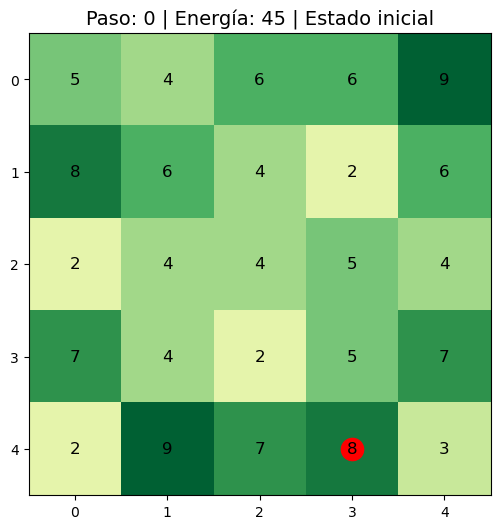


🌱 Comienza el episodio...

Paso 1 | Acción: derecha | Recompensa: -0.5 | Acumulado: -0.5


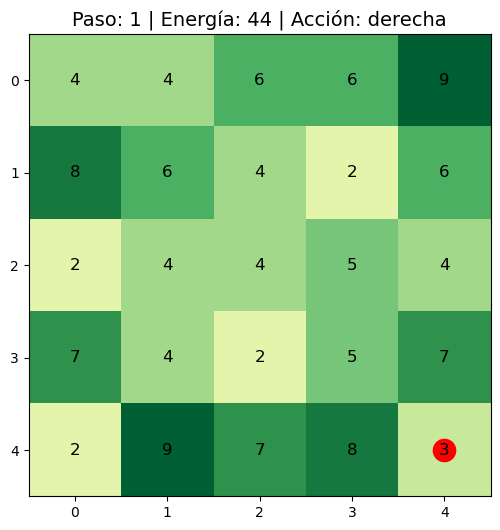

Paso 2 | Acción: regar | Recompensa: 10.0 | Acumulado: 9.5


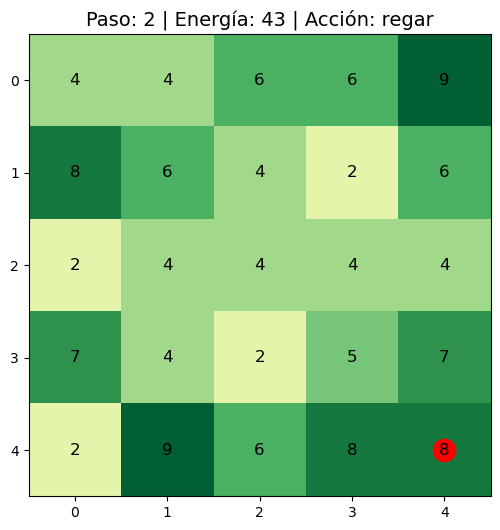

Paso 3 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 9.0


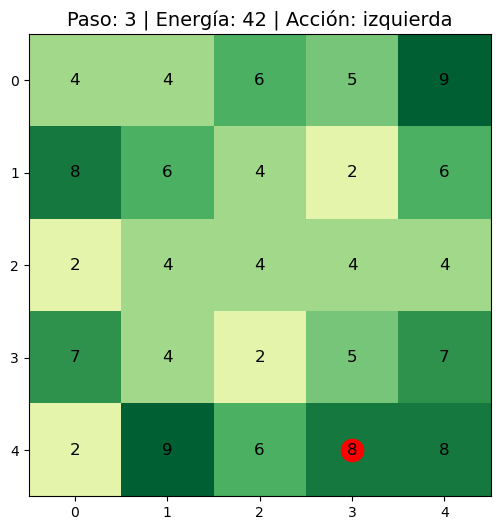

Paso 4 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 8.5


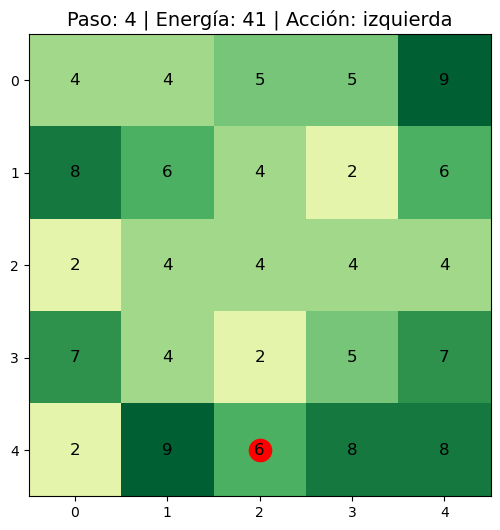

Paso 5 | Acción: regar | Recompensa: -1.0 | Acumulado: 7.5


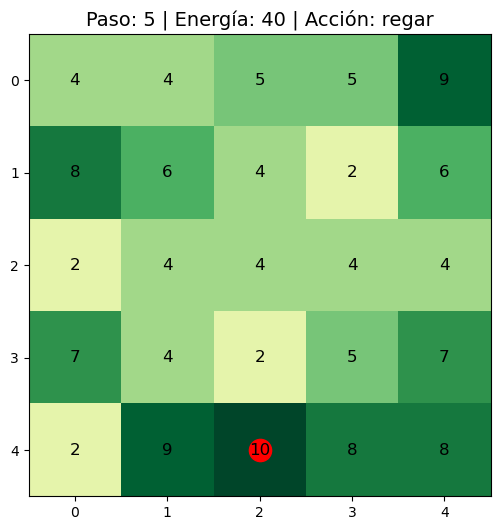

Paso 6 | Acción: arriba | Recompensa: -0.5 | Acumulado: 7.0


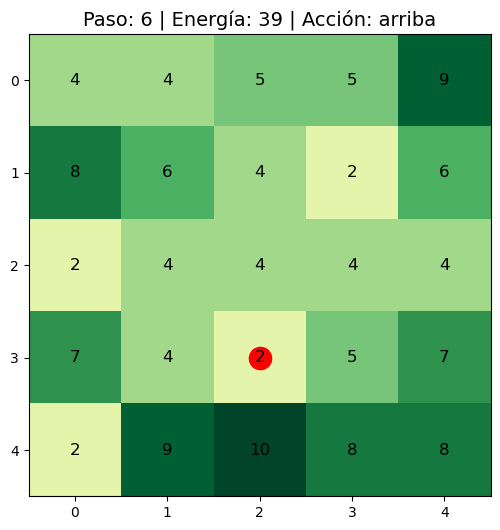

Paso 7 | Acción: regar | Recompensa: 10.0 | Acumulado: 17.0


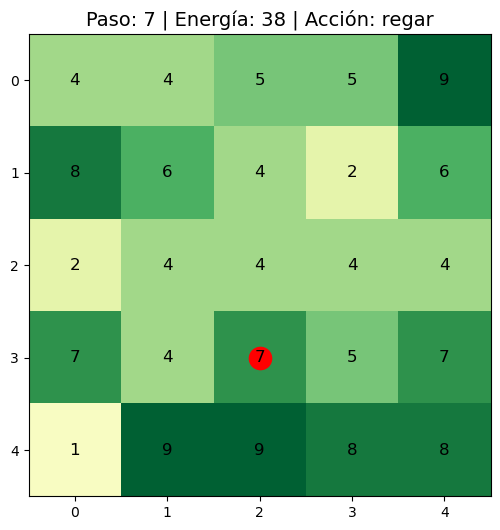

Paso 8 | Acción: arriba | Recompensa: -0.5 | Acumulado: 16.5


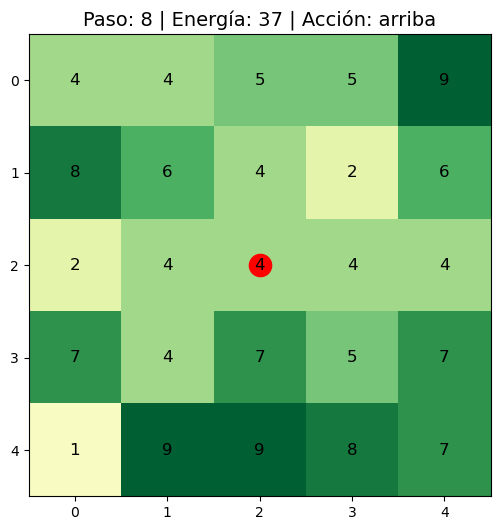

Paso 9 | Acción: regar | Recompensa: 10.0 | Acumulado: 26.5


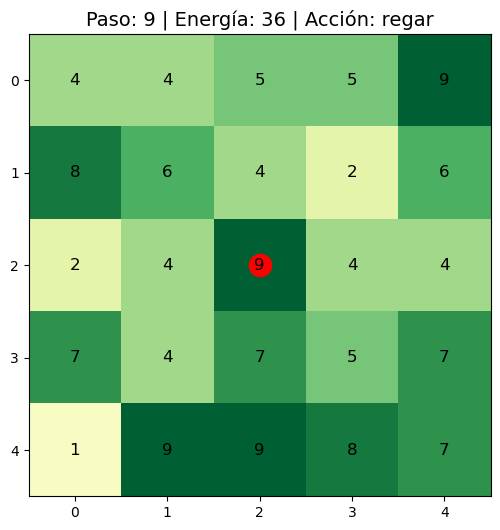

Paso 10 | Acción: derecha | Recompensa: -0.5 | Acumulado: 26.0


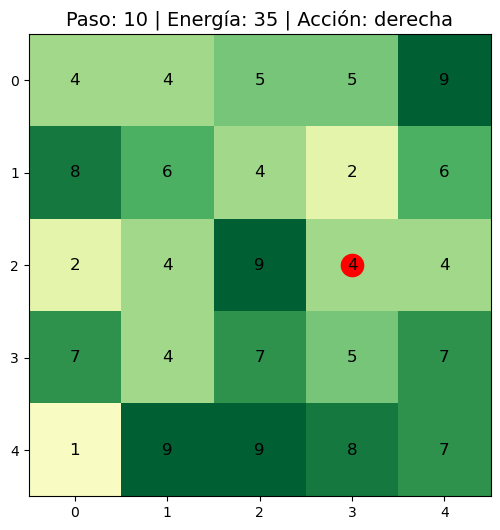

Paso 11 | Acción: regar | Recompensa: 10.0 | Acumulado: 36.0


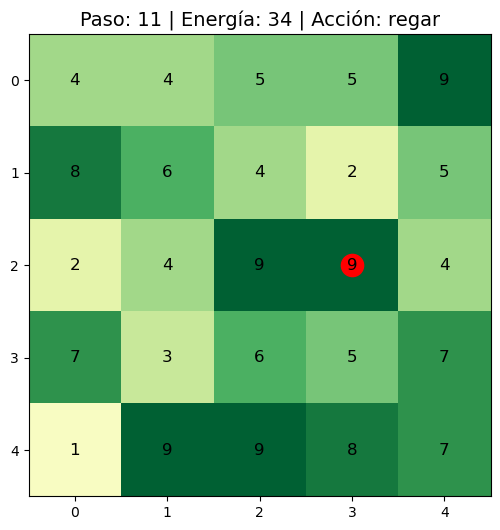

Paso 12 | Acción: arriba | Recompensa: -0.5 | Acumulado: 35.5


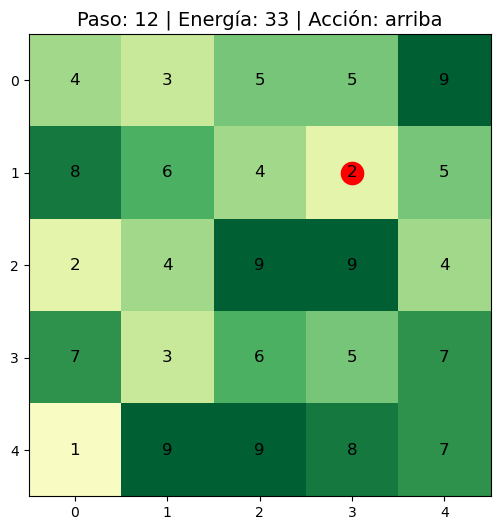

Paso 13 | Acción: regar | Recompensa: 10.0 | Acumulado: 45.5


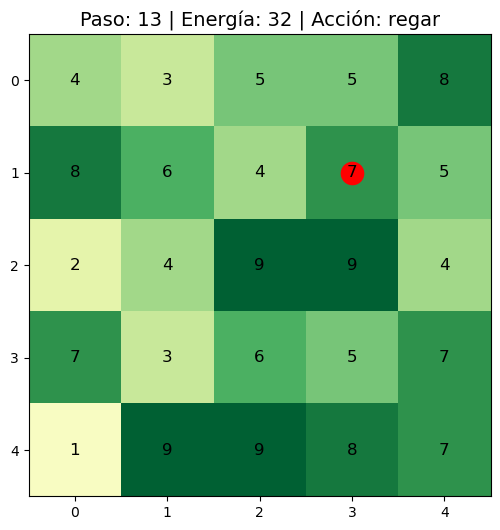

Paso 14 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 45.0


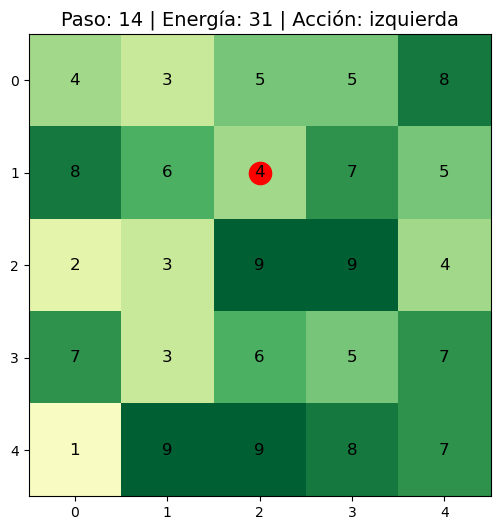

Paso 15 | Acción: regar | Recompensa: 10.0 | Acumulado: 55.0


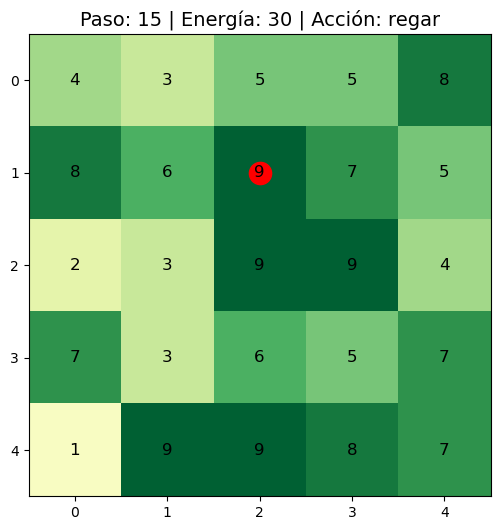

Paso 16 | Acción: derecha | Recompensa: -0.5 | Acumulado: 54.5


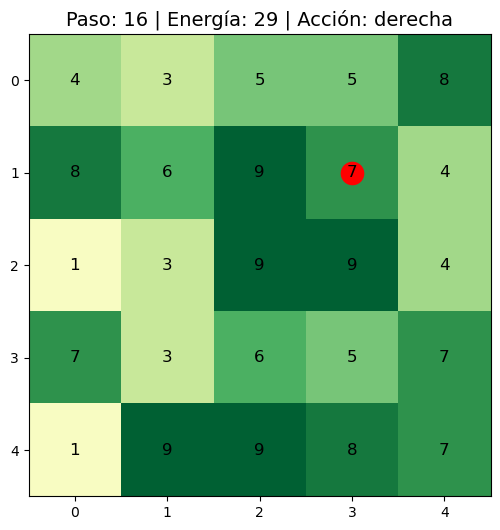

Paso 17 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 54.0


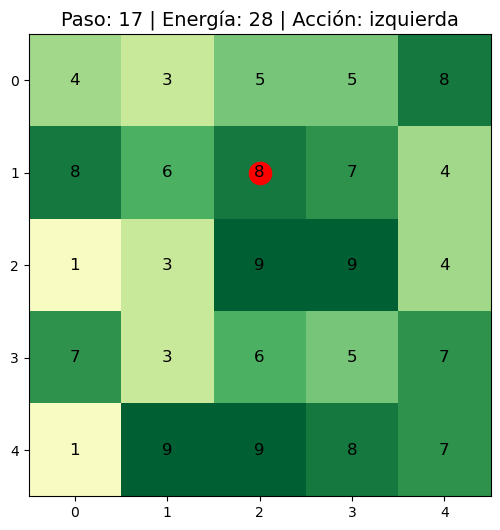

Paso 18 | Acción: derecha | Recompensa: -0.5 | Acumulado: 53.5


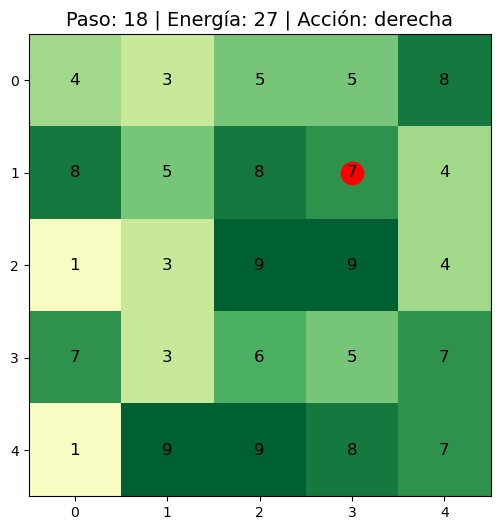

Paso 19 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 53.0


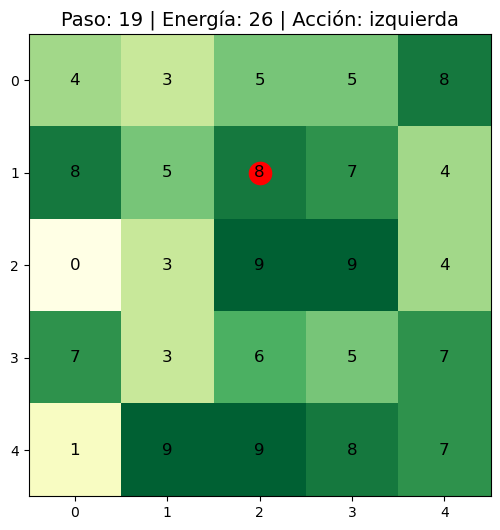

Paso 20 | Acción: derecha | Recompensa: -0.5 | Acumulado: 52.5


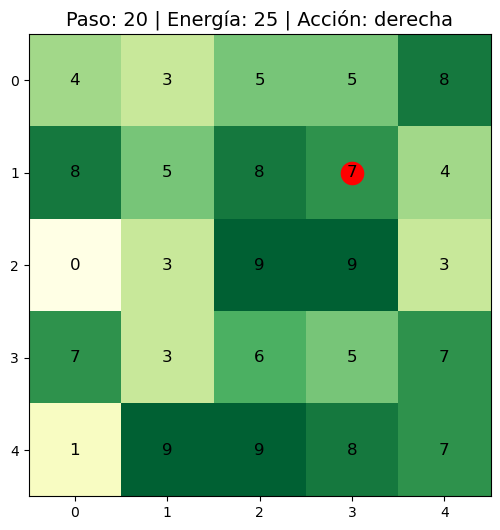

Paso 21 | Acción: abajo | Recompensa: -0.5 | Acumulado: 52.0


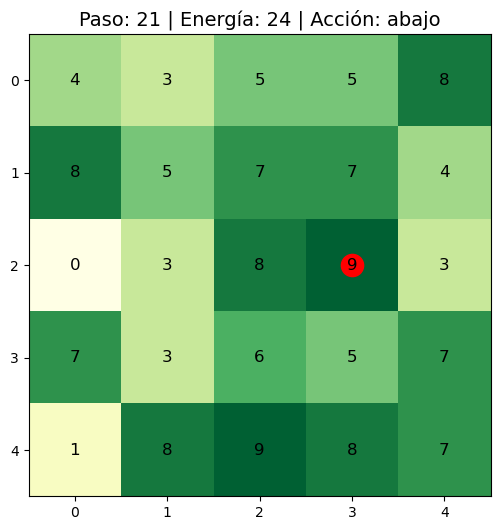

Paso 22 | Acción: derecha | Recompensa: -0.5 | Acumulado: 51.5


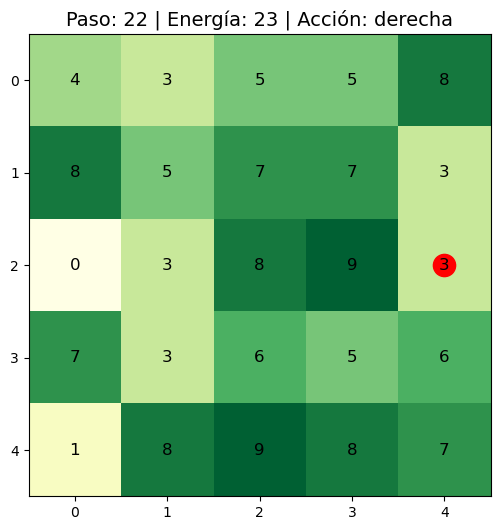

Paso 23 | Acción: regar | Recompensa: 10.0 | Acumulado: 61.5


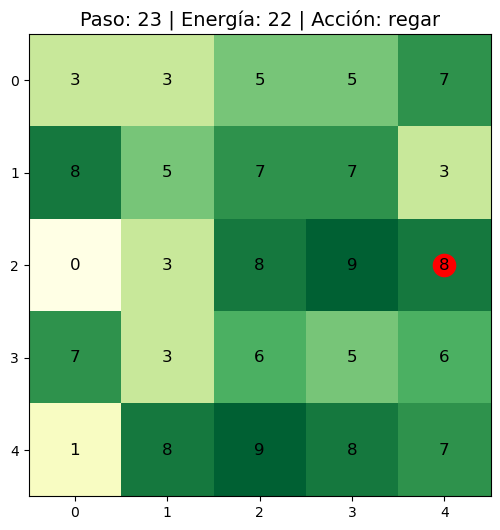

Paso 24 | Acción: abajo | Recompensa: -0.5 | Acumulado: 61.0


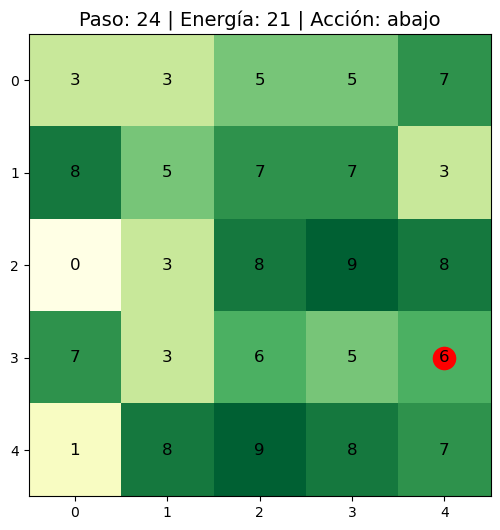

Paso 25 | Acción: regar | Recompensa: -1.0 | Acumulado: 60.0


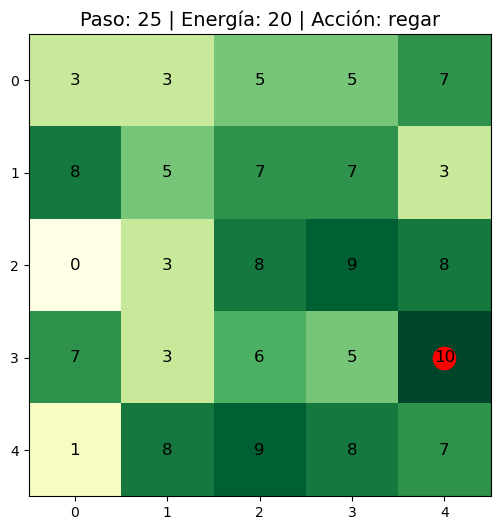

Paso 26 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 59.5


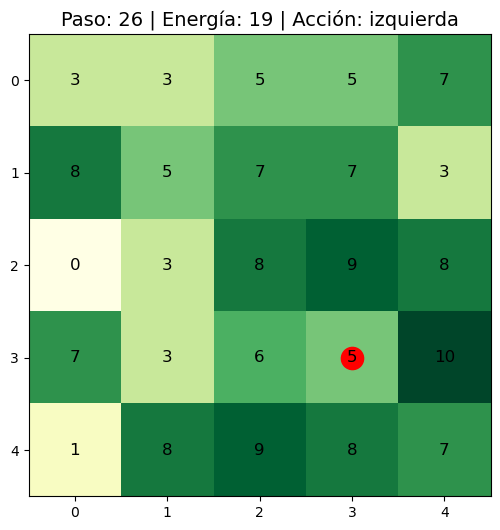

Paso 27 | Acción: regar | Recompensa: -1.0 | Acumulado: 58.5


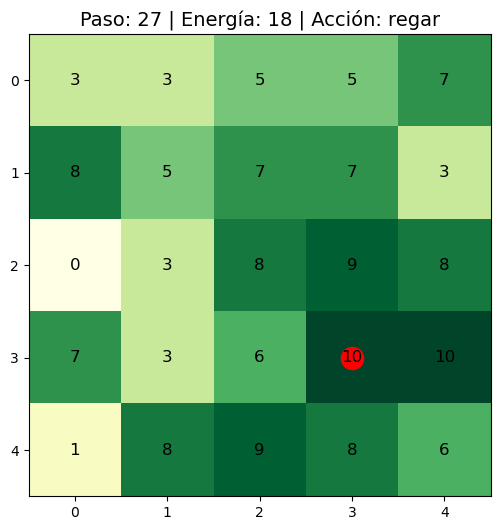

Paso 28 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 58.0


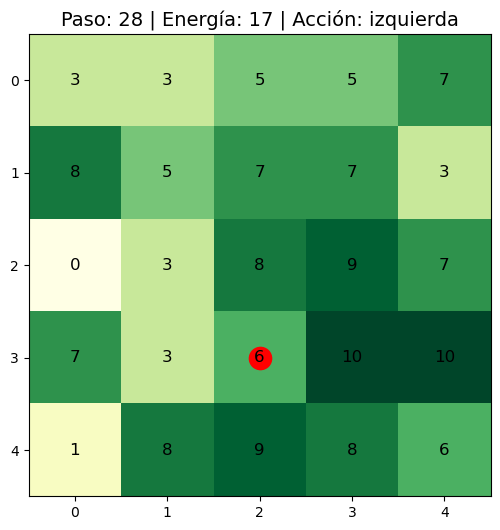

Paso 29 | Acción: regar | Recompensa: -1.0 | Acumulado: 57.0


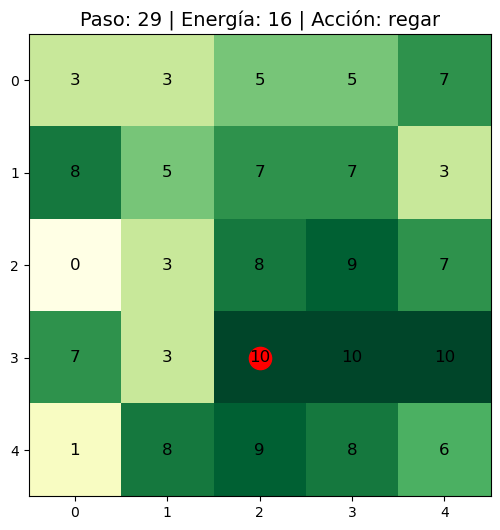

Paso 30 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 56.5


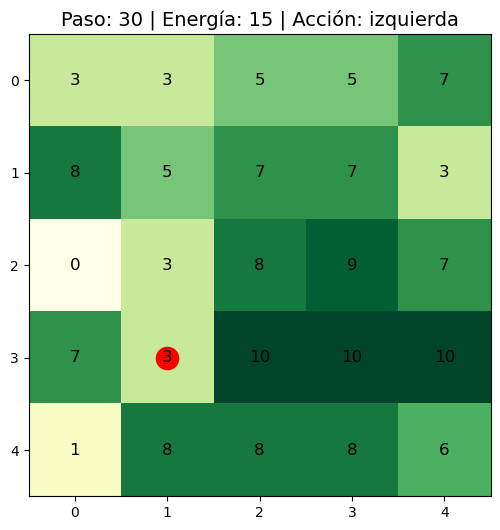

Paso 31 | Acción: regar | Recompensa: 10.0 | Acumulado: 66.5


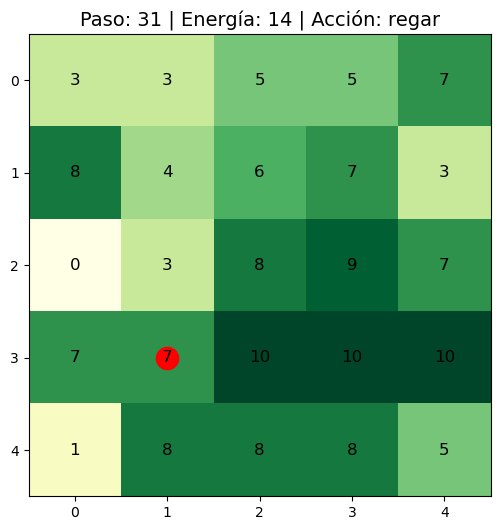

Paso 32 | Acción: arriba | Recompensa: -0.5 | Acumulado: 66.0


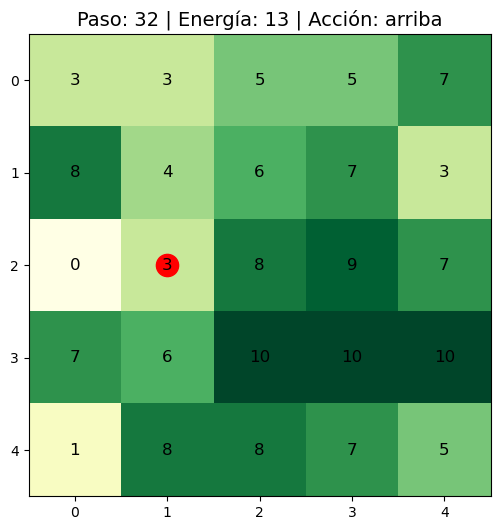

Paso 33 | Acción: regar | Recompensa: 10.0 | Acumulado: 76.0


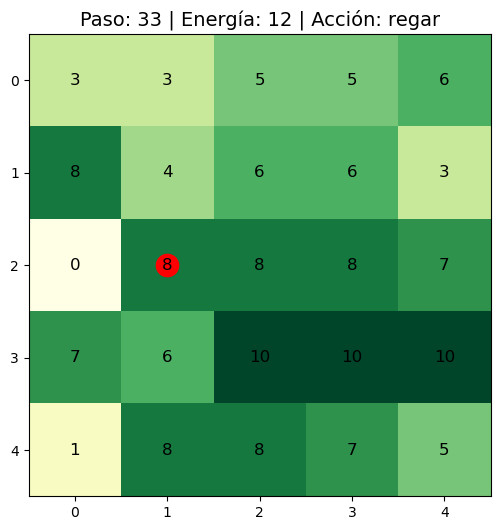

Paso 34 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 75.5


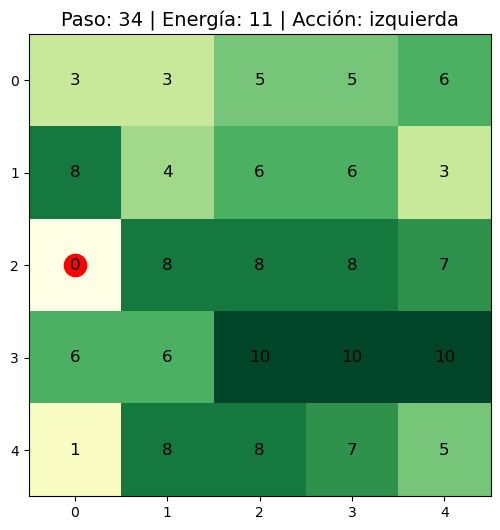

Paso 35 | Acción: regar | Recompensa: 10.0 | Acumulado: 85.5


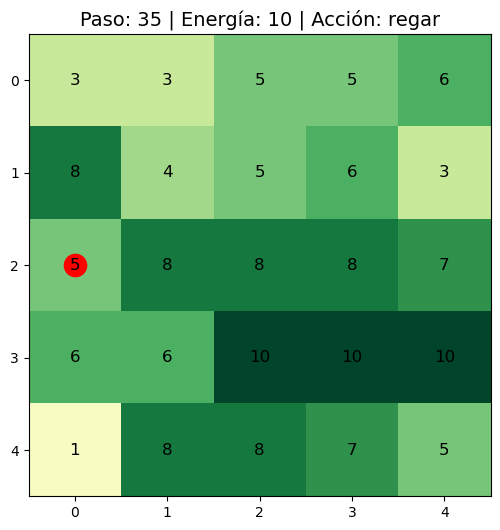

Paso 36 | Acción: regar | Recompensa: -1.0 | Acumulado: 84.5


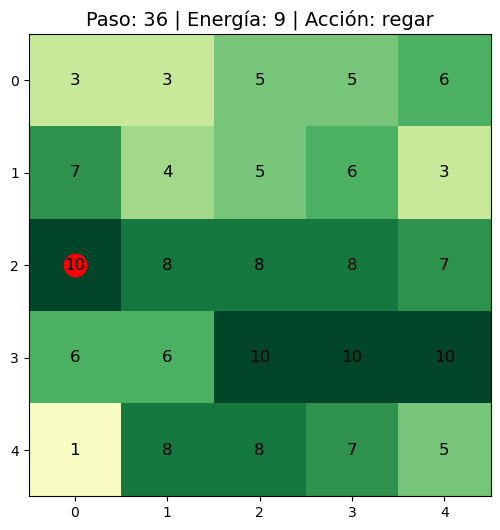

Paso 37 | Acción: derecha | Recompensa: -0.5 | Acumulado: 84.0


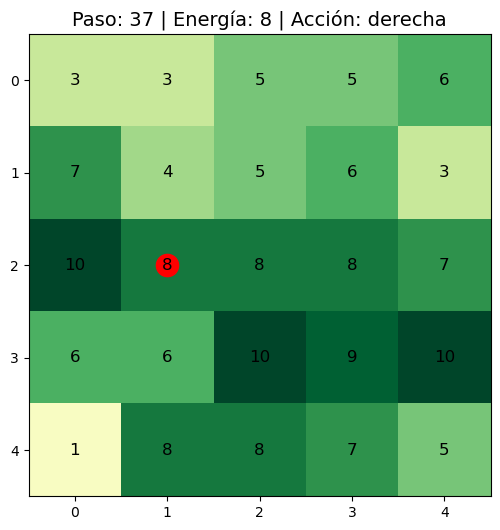

Paso 38 | Acción: arriba | Recompensa: -0.5 | Acumulado: 83.5


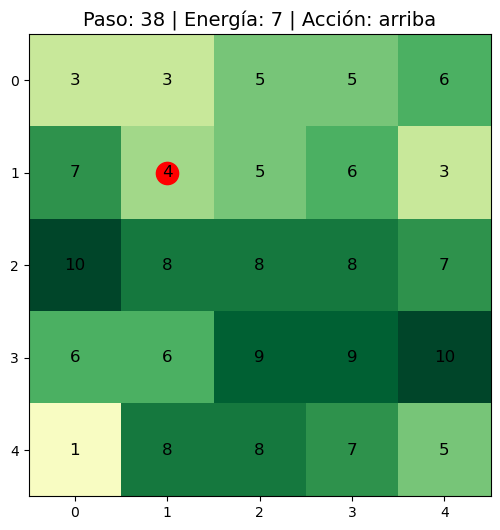

Paso 39 | Acción: regar | Recompensa: 10.0 | Acumulado: 93.5


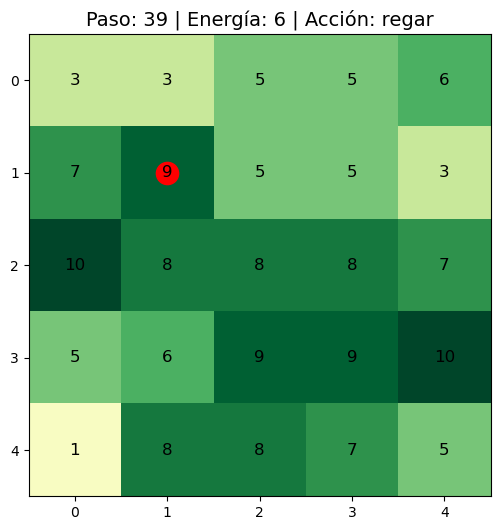

Paso 40 | Acción: arriba | Recompensa: -0.5 | Acumulado: 93.0


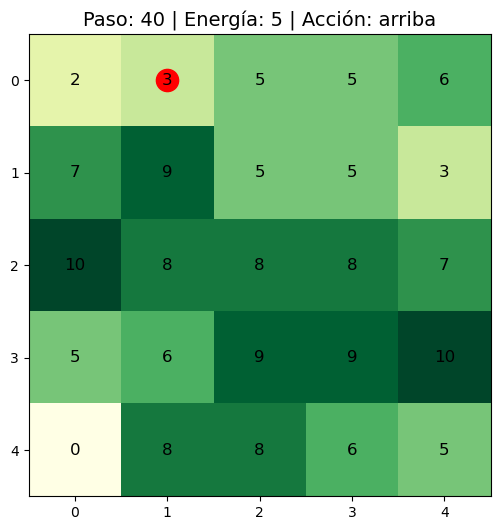

Paso 41 | Acción: regar | Recompensa: 10.0 | Acumulado: 103.0


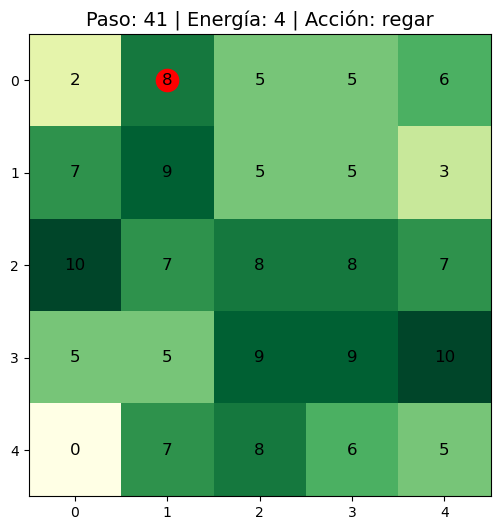

Paso 42 | Acción: izquierda | Recompensa: -0.5 | Acumulado: 102.5


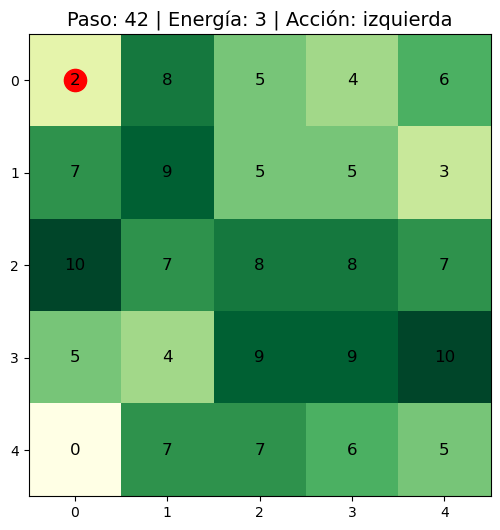

Paso 43 | Acción: regar | Recompensa: 10.0 | Acumulado: 112.5


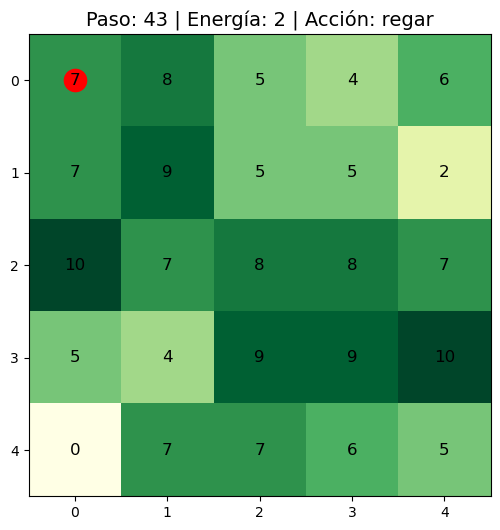

Paso 44 | Acción: derecha | Recompensa: -0.5 | Acumulado: 112.0


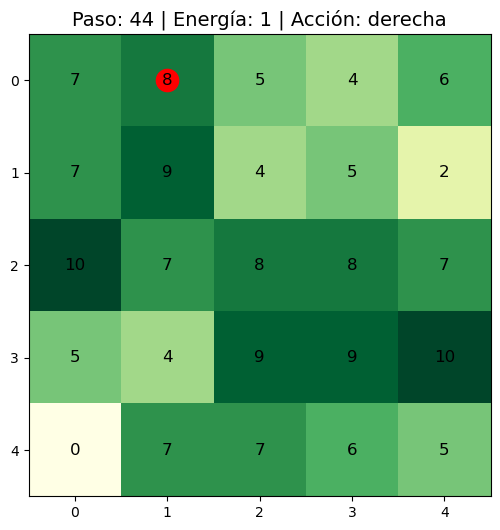

Paso 45 | Acción: abajo | Recompensa: -0.5 | Acumulado: 111.5


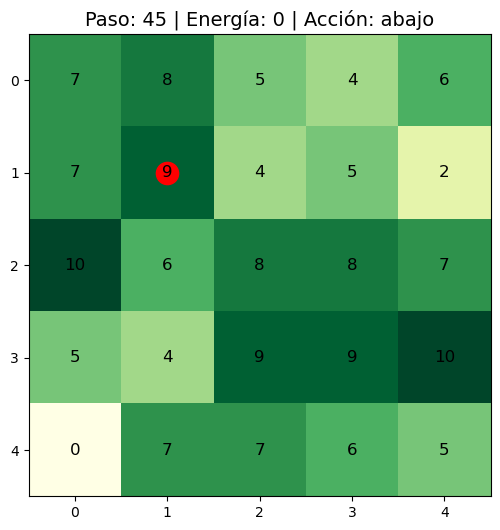


🏁 Fin del episodio 1 | Recompensa total: 111.5 | Energía: 0



In [23]:
# Función de visualización
def visualizar_grilla(humedad, robot_pos, energia, paso, ultima_accion=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    cmap = plt.cm.YlGn
    norm = mcolors.Normalize(vmin=0, vmax=10)
    ax.imshow(humedad, cmap=cmap, norm=norm)

    for i in range(tamaño_grilla):
        for j in range(tamaño_grilla):
            ax.text(j, i, f"{humedad[i, j]:.0f}", va='center', ha='center', color='black', fontsize=12)

    rx, ry = robot_pos
    ax.plot(ry, rx, 'ro', markersize=16)

    accion_str = f" | Acción: {acciones[ultima_accion]}" if ultima_accion is not None else " | Estado inicial"
    ax.set_title(f"Paso: {paso} | Energía: {energia}{accion_str}", fontsize=14)

    ax.set_xticks(np.arange(tamaño_grilla))
    ax.set_yticks(np.arange(tamaño_grilla))
    ax.grid(False)
    plt.show()
    time.sleep(0.5)

episodios=1
# Entrenamiento visual
for ep in range(episodios):
    humedad_grid = np.random.randint(2, 10, size=(tamaño_grilla, tamaño_grilla)) # Inicializamos de forma aleatoria la humedad de la grilla
    robot_pos = (random.randint(0, tamaño_grilla - 1), random.randint(0, tamaño_grilla - 1)) #Ubicamos al robot en una posicion inicial aleatoria para empezar
    recompensa_total = 0
    paso = 0
    energia = energia_robot #Energia con la que arranca el robot

    # Mostrar el estado inicial (sin recompensas, sin acción)
    visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=None)
    print("\n🌱 Comienza el episodio...\n")

# --- Acá empieza el bucle de aprendizaje
    while True:
        estado = obtener_estado(robot_pos, humedad_grid)
        accion_idx = elegir_accion(estado, robot_pos, humedad_grid)
        new_pos, humedad_grid, recompensa = step(robot_pos, humedad_grid, accion_idx)

        humedad_grid = secar_plantas(humedad_grid, probabilidad=prob_secado_plantas)
        energia -= 1

        next_state = obtener_estado(new_pos, humedad_grid)
        actualizar_q(estado, accion_idx, recompensa, next_state)

        robot_pos = new_pos
        recompensa_total += recompensa
        paso += 1

        print(f"Paso {paso} | Acción: {acciones[accion_idx]} | Recompensa: {recompensa:.1f} | Acumulado: {recompensa_total:.1f}")
        visualizar_grilla(humedad_grid, robot_pos, energia, paso, ultima_accion=accion_idx)

        if energia <= 0 or np.all(humedad_grid <= 1):
          print(f"\n🏁 Fin del episodio {ep+1} | Recompensa total: {recompensa_total:.1f} | Energía: {energia}\n")
          break

En este caso lo que observamos es que el gráfico de convergencia se ve practicamente como una linea recta.